Breast Cancer Wisconsin - Breast Cancer Wisconsin

### 0 - Setup

###### Import pckgs 

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from ml_utils import *
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [195]:

# Load dataset directly from the URL into a pandas DataFrame with column names
dtf = pd.read_csv("E:\Machine Learning\Module 16\Breast-Cancer-Wisconsine-Analysis/breast-cancer-wisconsine.csv")

# Display the dataset in tabular format with headings
print(dtf)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

###### Import data

Shape: (569, 32)
-----------------
id --> Type:num | Nas: 0(0%) | Min-Max: (8670)-(911320502) | Possible PK
diagnosis --> Type:cat | Nas: 0(0%) | Categories: 2
radius_mean --> Type:num | Nas: 0(0%) | Min-Max: (6)-(28)
texture_mean --> Type:num | Nas: 0(0%) | Min-Max: (9)-(39)
perimeter_mean --> Type:num | Nas: 0(0%) | Min-Max: (43)-(188)
area_mean --> Type:num | Nas: 0(0%) | Min-Max: (143)-(2501)
smoothness_mean --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
compactness_mean --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
concavity_mean --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
concave_points_mean --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
symmetry_mean --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
fractal_dimension_mean --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
radius_se --> Type:num | Nas: 0(0%) | Min-Max: (0)-(2)
texture_se --> Type:num | Nas: 0(0%) | Min-Max: (0)-(4)
perimeter_se --> Type:num | Nas: 0(0%) | Min-Max: (0)-(21)
area_se --> Type:num | Nas: 0(0%) | Min-Max: (6)-(542)


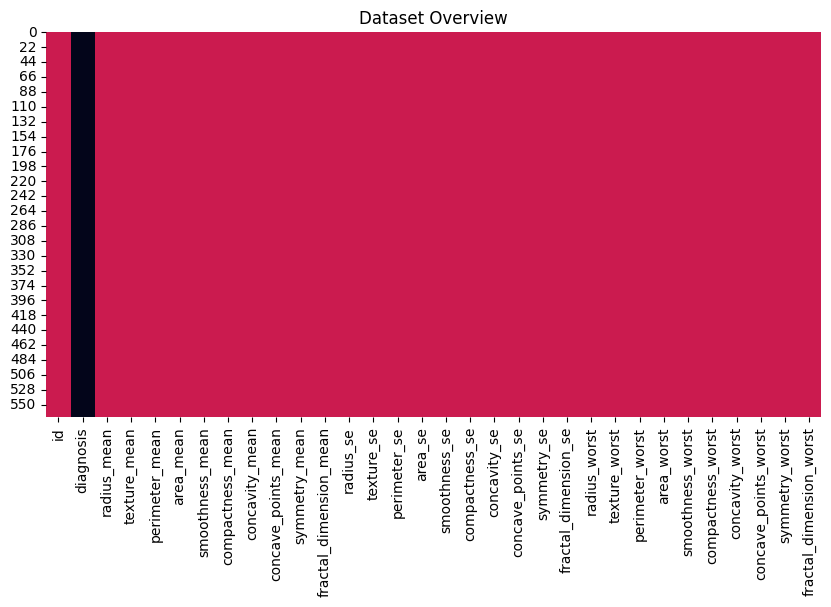

 Categerocial   Numerical/DateTime   NaN 


In [196]:
dtf_overview(dtf, max_cat=20, figsize=(10,5))

In [197]:
def encode_categories(category):
    if category == 'M':
        return 1
    elif category == 'B':
        return 0
    else:
        return None  # Handle other cases if needed

# Apply the function to the 'diagnosis' column
dtf['encoded_diagnosis'] = dtf['diagnosis'].apply(encode_categories)

print(dtf)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [198]:
dtf=dtf.drop(columns=['diagnosis','id'])

In [199]:

dtf = dtf.rename(columns={"encoded_diagnosis":"Y"})

Summarize Data

In [200]:
# summarize the data

# shape
print(dtf.shape)
# head
display(dtf.head(5))
# descriptions
display(dtf.describe())
# class distribution
display(dtf.groupby('Y').size())

(569, 31)


radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave_points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  Y  
0          0.4601                  0.11890  1  
1          0.2750                  0.08902  1  
2          0.3613                  0.08758  1  
3          0.6638                  0.17300  1  
4          0.2364                  0.07678  1  

[5 rows x 31 columns]

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  texture_worst  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       perimeter_worst   area_worst  smoothness_worst  compactness_worst  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       concavity_worst  concave_points_worst  symmetry_worst  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       fractal_dimension_worst           Y  
count               569.000000  569.000000  
mean                  0.083946    0.372583  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    0.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

Y
0    357
1    212
dtype: int64

1 - Data Analysis¶

Data Visulization

In [201]:
features = []

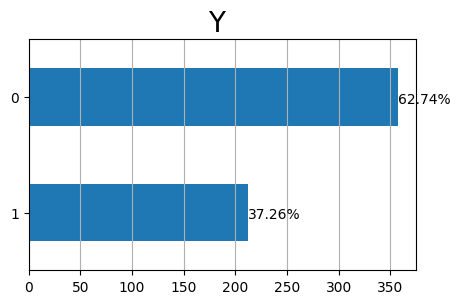

In [202]:
freqdist_plot(dtf, "Y", figsize=(5,3))

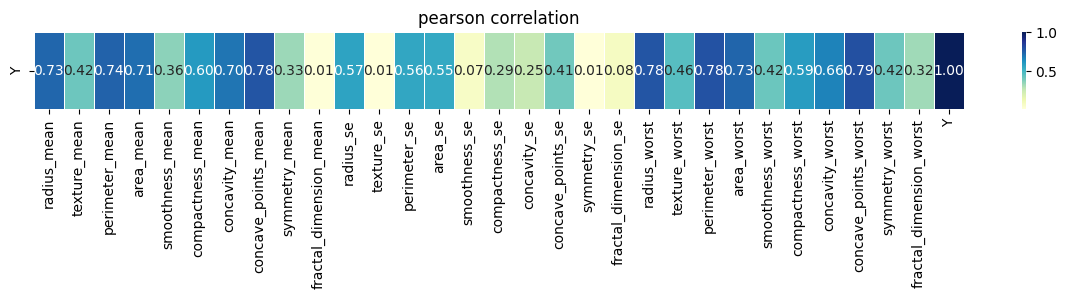

In [203]:
corr = corr_matrix(dtf, method="pearson", negative=False, lst_filters=["Y"], figsize=(15,1))

In [204]:
print(dtf.columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Y'],
      dtype='object')


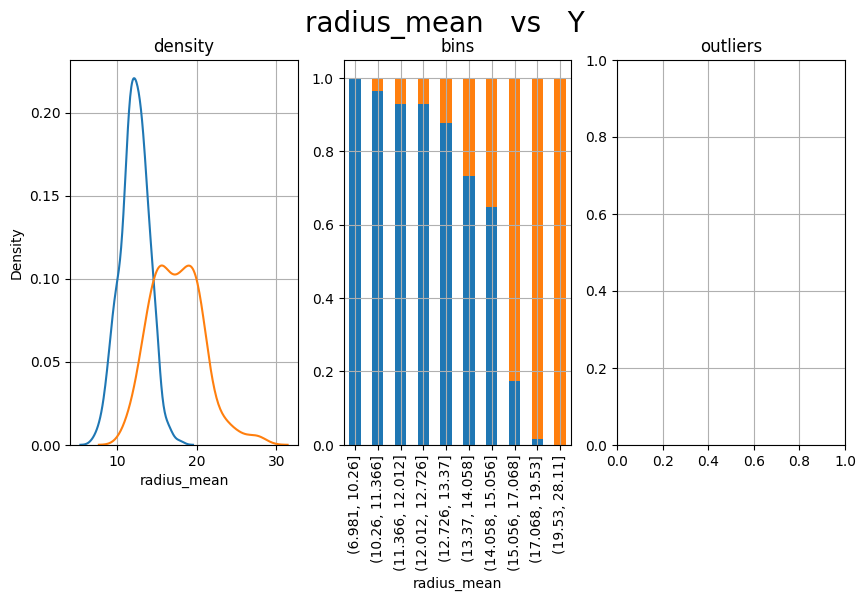

In [205]:
##radius_mean
bivariate_plot(dtf, x="radius_mean", y="Y", figsize=(10,5))

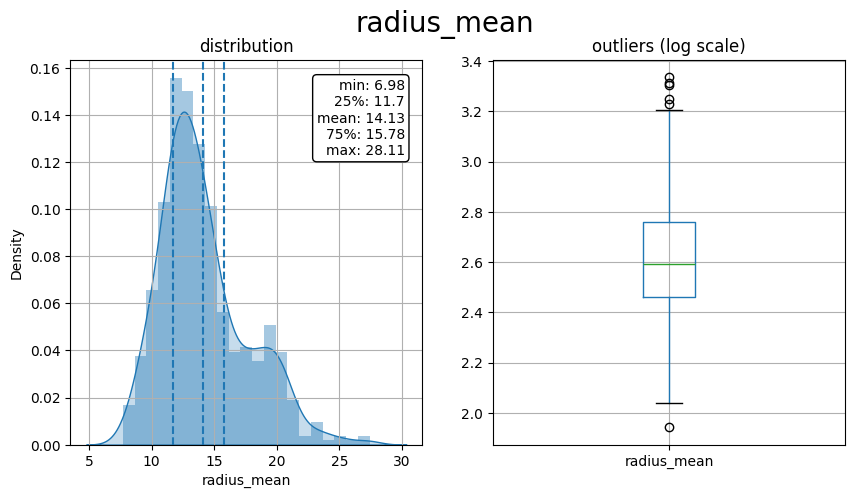

In [206]:
freqdist_plot(dtf, "radius_mean", box_logscale=True, figsize=(10,5))

In [207]:
coeff,p = test_corr(dtf, x="radius_mean", y="Y")

Anova F: the variables are Correlated (p-value: 0.0)


In [208]:
features.append("radius_mean")

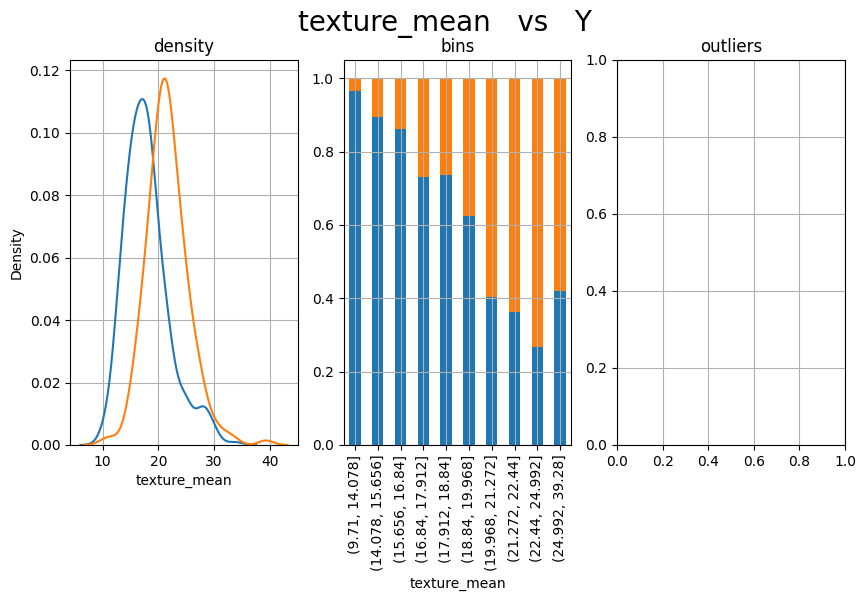

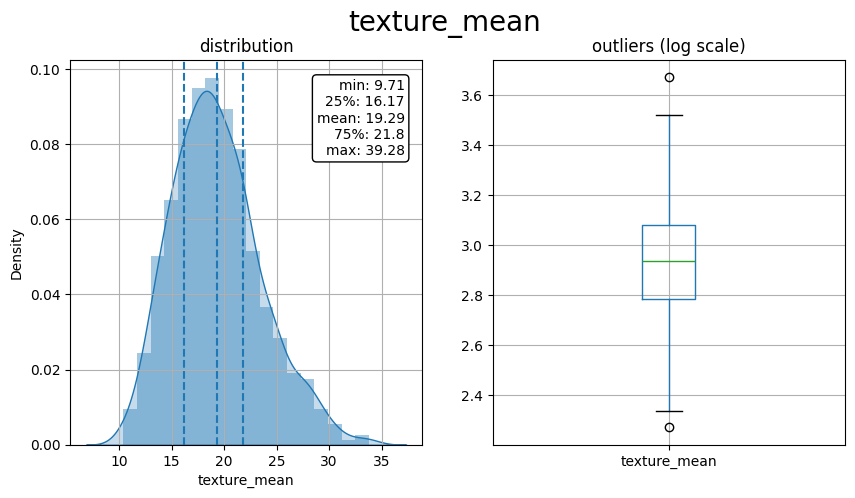

In [209]:
##texture_mean
bivariate_plot(dtf, x="texture_mean", y="Y", figsize=(10,5))
freqdist_plot(dtf, "texture_mean", box_logscale=True, figsize=(10,5))
features.append("texture_mean")


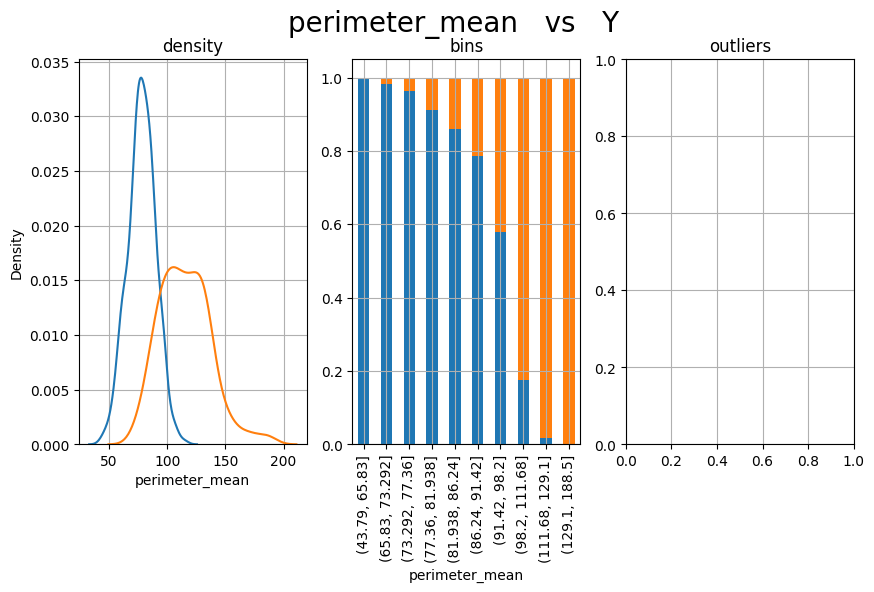

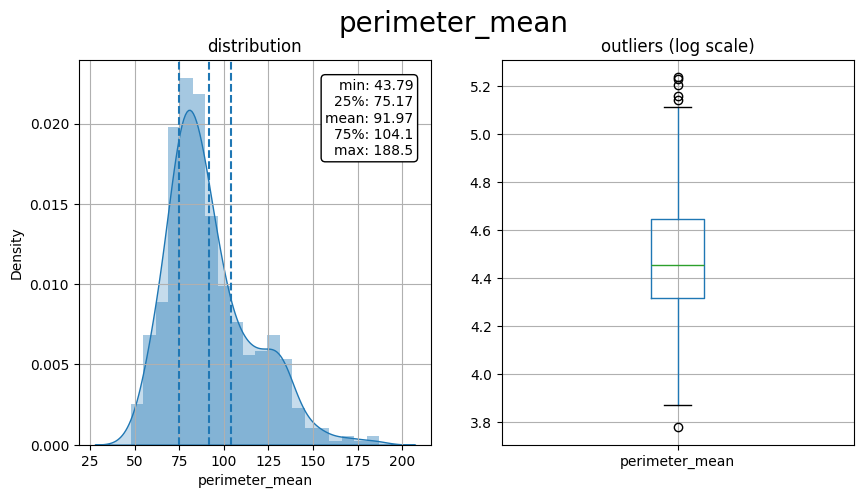

Anova F: the variables are Correlated (p-value: 0.0)


In [210]:
##perimeter_mean
bivariate_plot(dtf, x="perimeter_mean", y="Y", figsize=(10,5))
freqdist_plot(dtf, "perimeter_mean", box_logscale=True, figsize=(10,5))
coeff,p = test_corr(dtf, x="perimeter_mean", y="Y")
features.append("perimeter_mean")

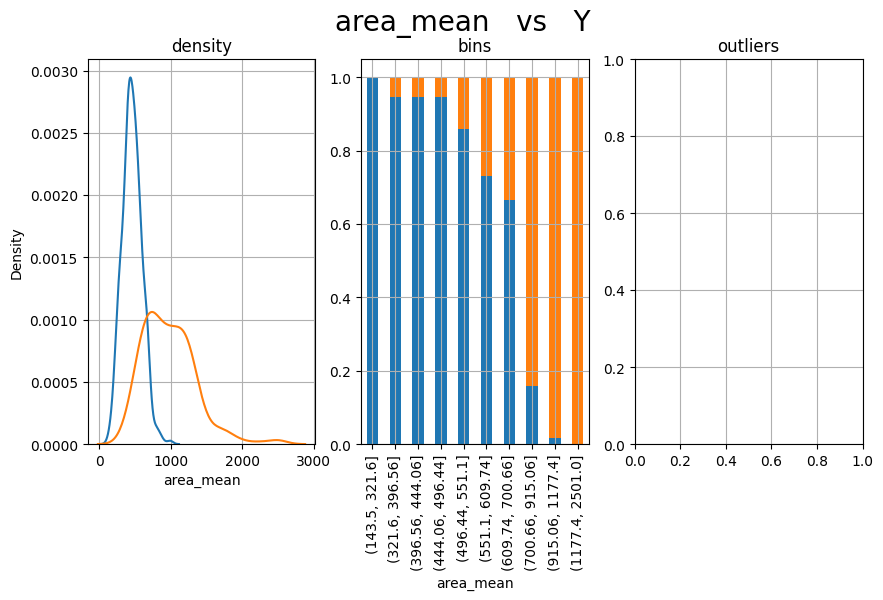

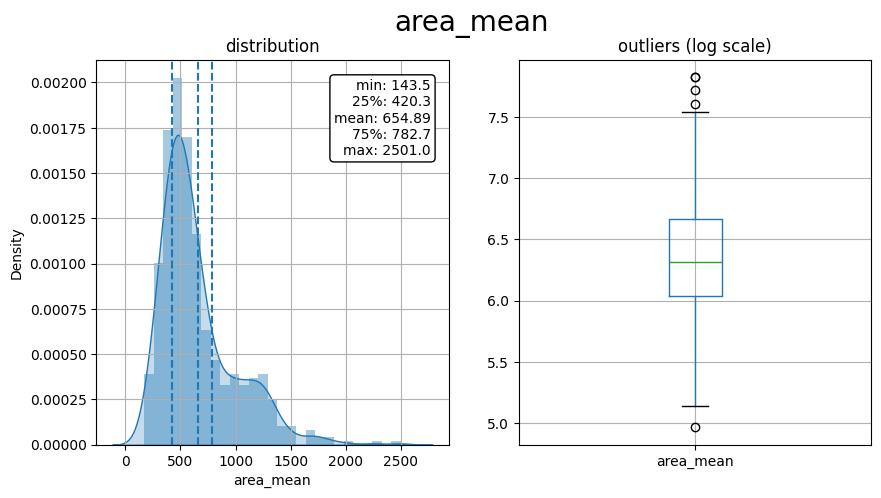

Anova F: the variables are Correlated (p-value: 0.0)


In [211]:
##Area_mean
bivariate_plot(dtf, x="area_mean", y="Y", figsize=(10,5))
freqdist_plot(dtf, "area_mean", box_logscale=True, figsize=(10,5))
coeff,p = test_corr(dtf, x="area_mean", y="Y")
features.append("area_mean")

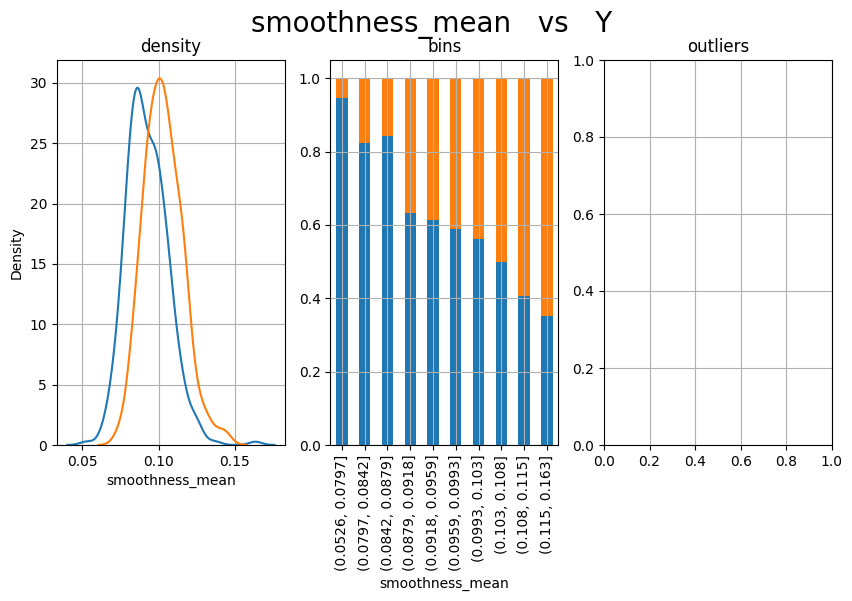

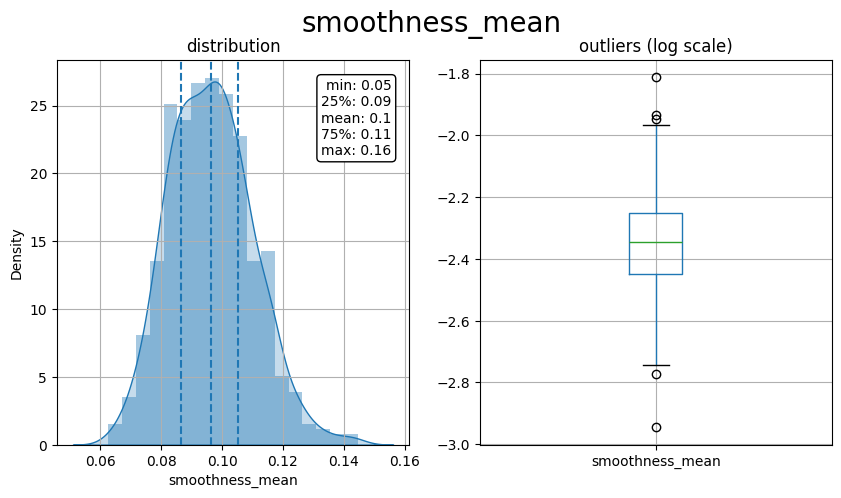

Anova F: the variables are Correlated (p-value: 0.0)


In [212]:
##smoothness_mean
bivariate_plot(dtf, x="smoothness_mean", y="Y", figsize=(10,5))
freqdist_plot(dtf, "smoothness_mean", box_logscale=True, figsize=(10,5))
coeff,p = test_corr(dtf, x="smoothness_mean", y="Y")
features.append("smoothness_mean")

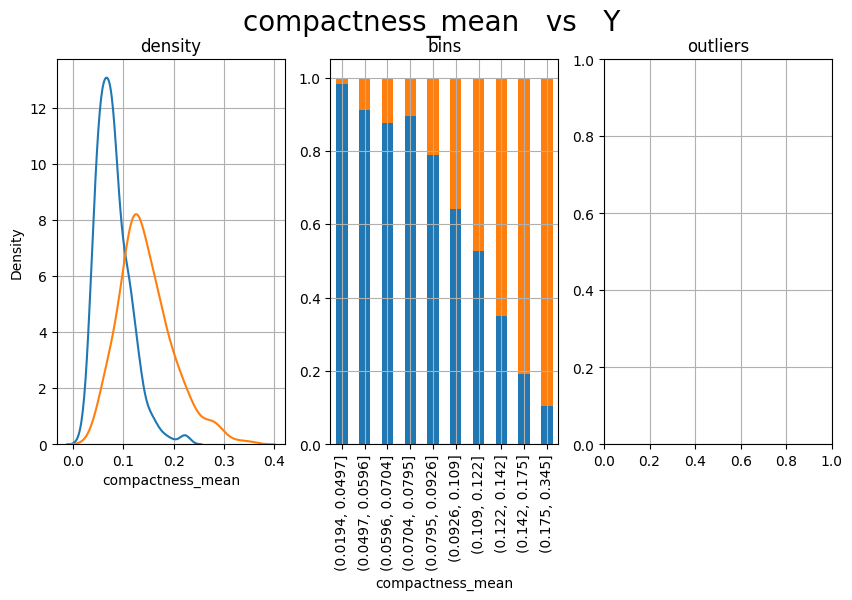

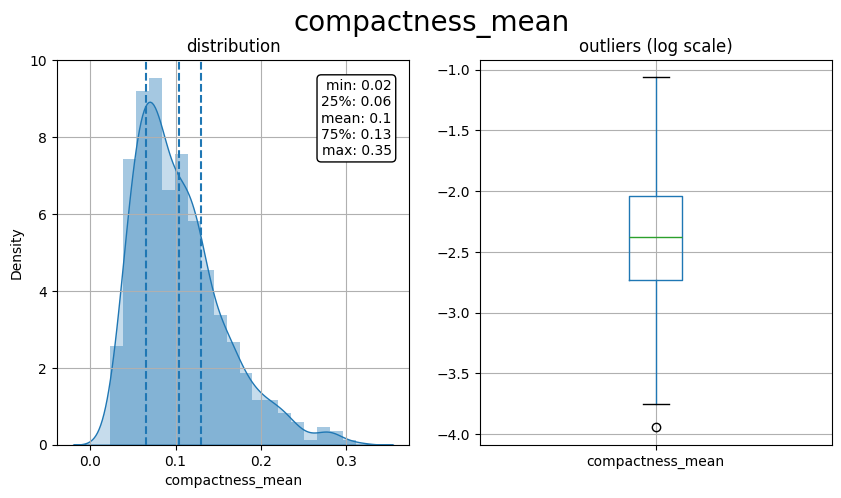

Anova F: the variables are Correlated (p-value: 0.0)


In [213]:
##compactness_mean
bivariate_plot(dtf, x="compactness_mean", y="Y", figsize=(10,5))
freqdist_plot(dtf, "compactness_mean", box_logscale=True, figsize=(10,5))
coeff,p = test_corr(dtf, x="compactness_mean", y="Y")
features.append("compactness_mean")

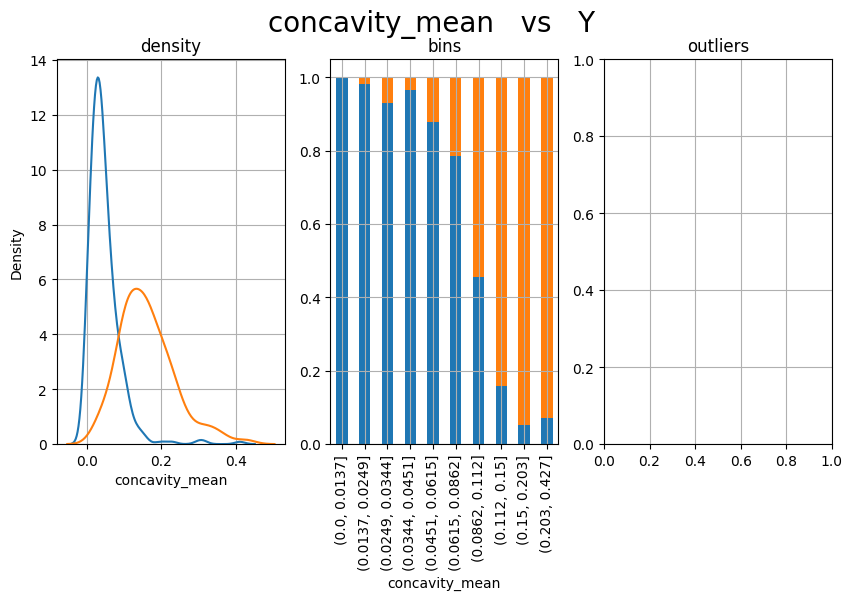

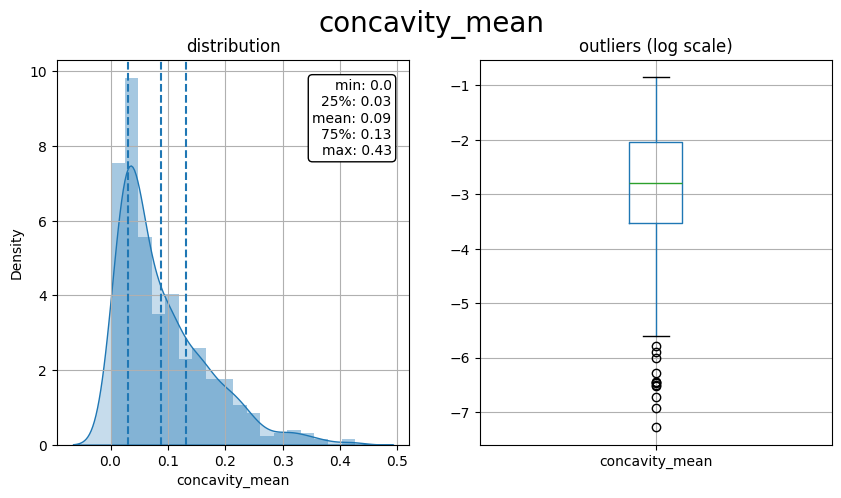

Anova F: the variables are Correlated (p-value: 0.0)


In [214]:
##concavity_mean
bivariate_plot(dtf, x="concavity_mean", y="Y", figsize=(10,5))
freqdist_plot(dtf, "concavity_mean", box_logscale=True, figsize=(10,5))
coeff,p = test_corr(dtf, x="concavity_mean", y="Y")
features.append("concavity_mean")

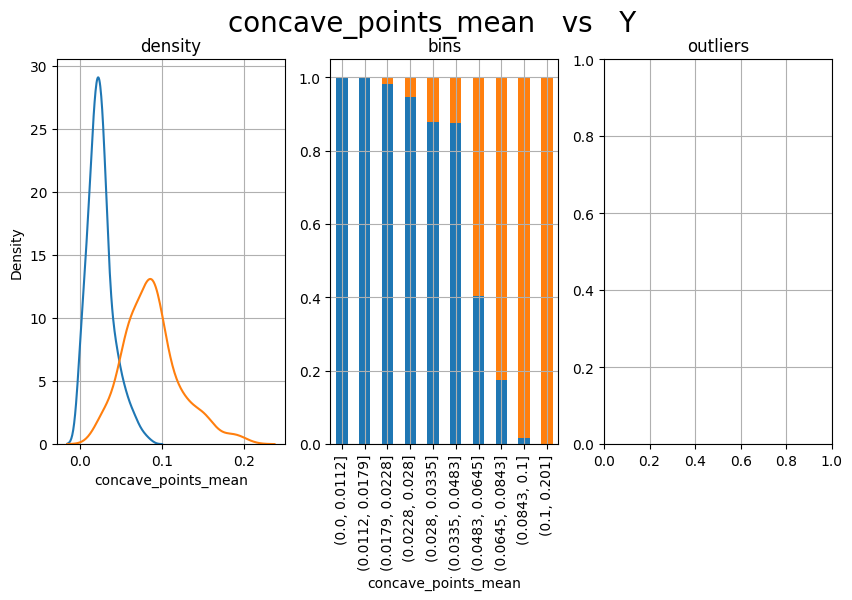

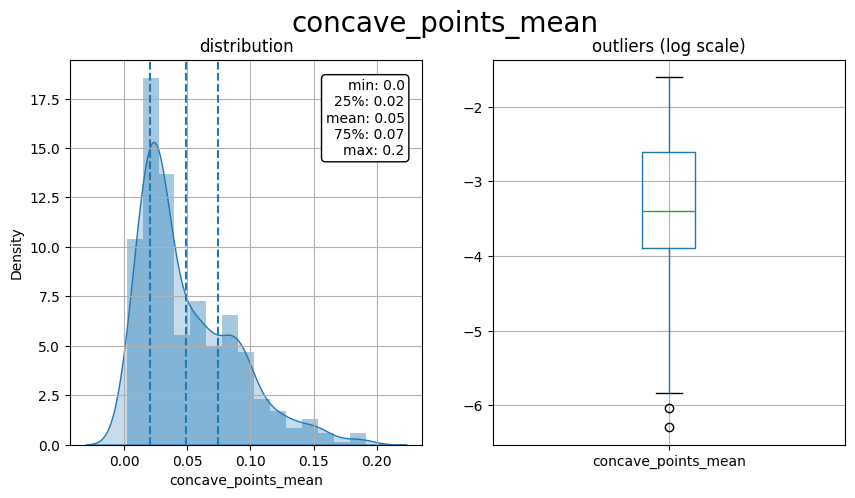

Anova F: the variables are Correlated (p-value: 0.0)


In [215]:
#concave_points_mean
bivariate_plot(dtf, x="concave_points_mean", y="Y", figsize=(10,5))
freqdist_plot(dtf, "concave_points_mean", box_logscale=True, figsize=(10,5))
coeff,p = test_corr(dtf, x="concave_points_mean", y="Y")
features.append("concave_points_mean")

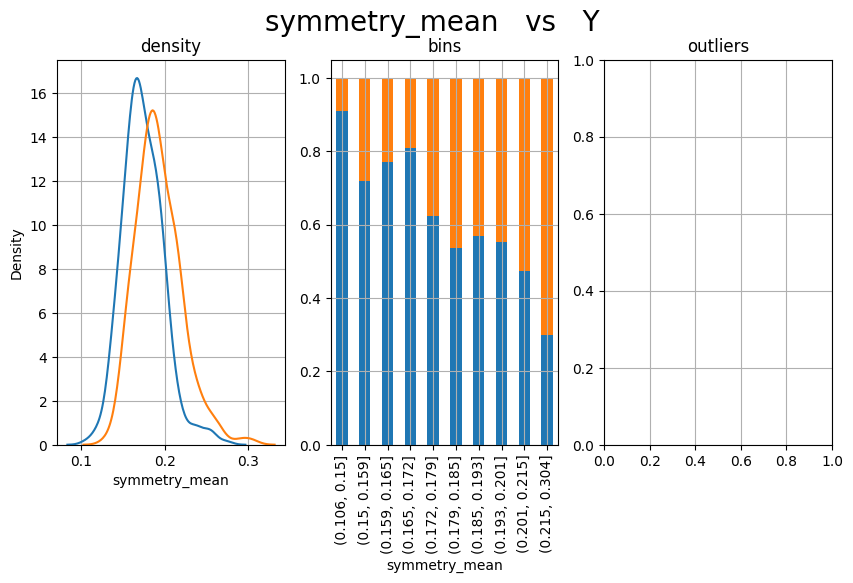

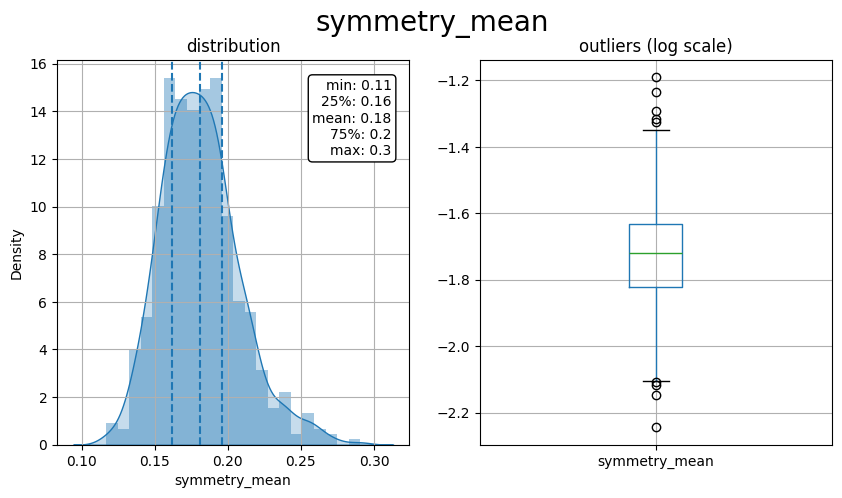

Anova F: the variables are Correlated (p-value: 0.0)


In [216]:
#symmetry_mean
bivariate_plot(dtf, x="symmetry_mean", y="Y", figsize=(10,5))
freqdist_plot(dtf, "symmetry_mean", box_logscale=True, figsize=(10,5))
coeff,p = test_corr(dtf, x="symmetry_mean", y="Y")
features.append("symmetry_mean")

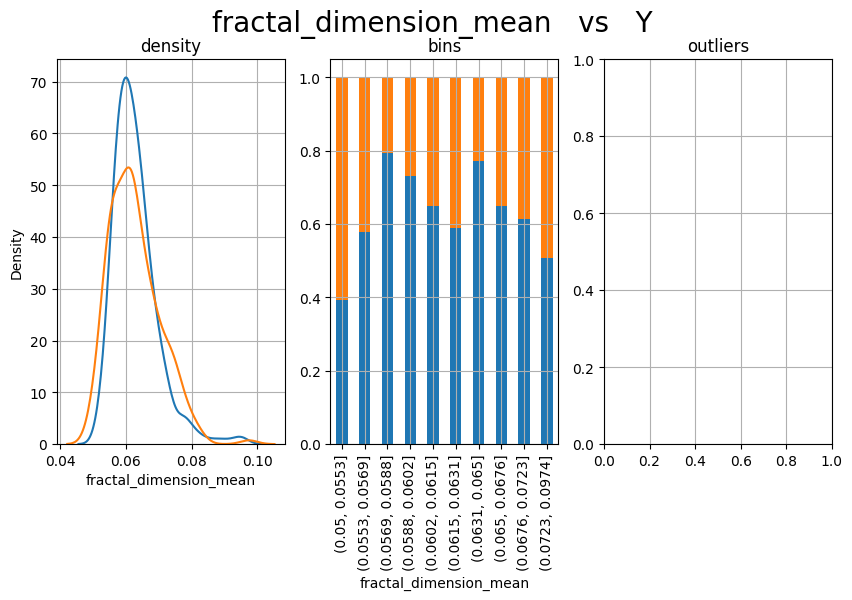

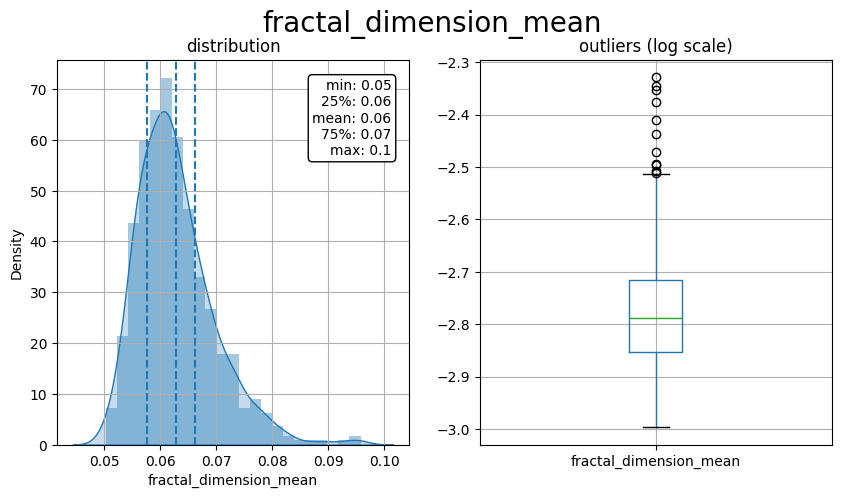

Anova F: the variables are Non-Correlated (p-value: 0.76)


In [217]:
#fractal_dimension_mean
bivariate_plot(dtf, x="fractal_dimension_mean", y="Y", figsize=(10,5))
freqdist_plot(dtf, "fractal_dimension_mean", box_logscale=True, figsize=(10,5))
coeff,p = test_corr(dtf, x="fractal_dimension_mean", y="Y")
features.append("fractal_dimension_mean")

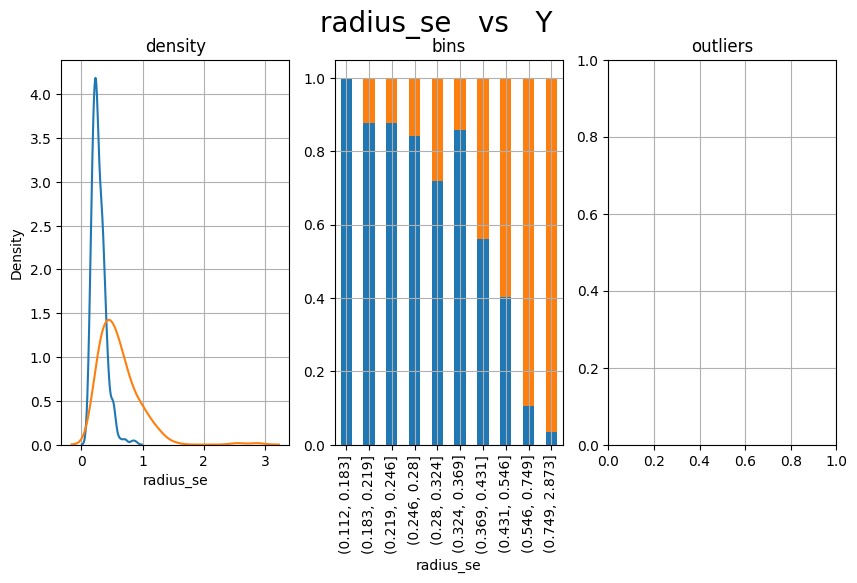

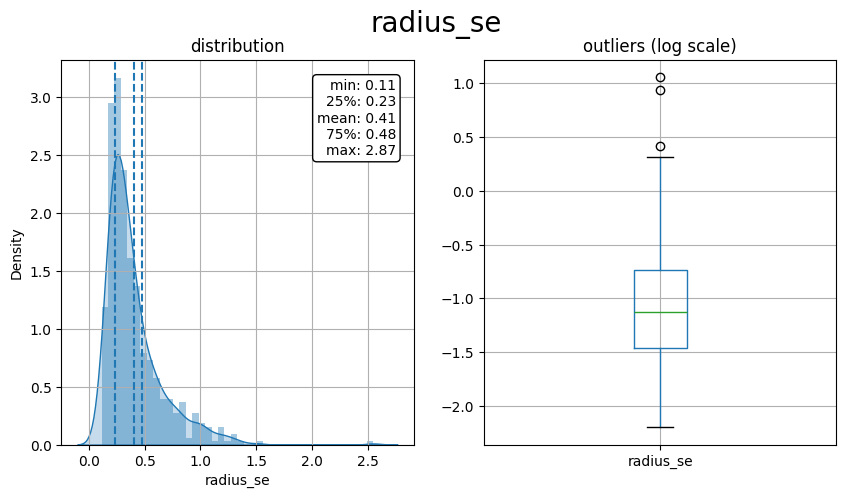

Anova F: the variables are Correlated (p-value: 0.0)


In [218]:
#radius_se
bivariate_plot(dtf, x="radius_se", y="Y", figsize=(10,5))
freqdist_plot(dtf, "radius_se", box_logscale=True, figsize=(10,5))
coeff,p = test_corr(dtf, x="radius_se", y="Y")
features.append("radius_se")

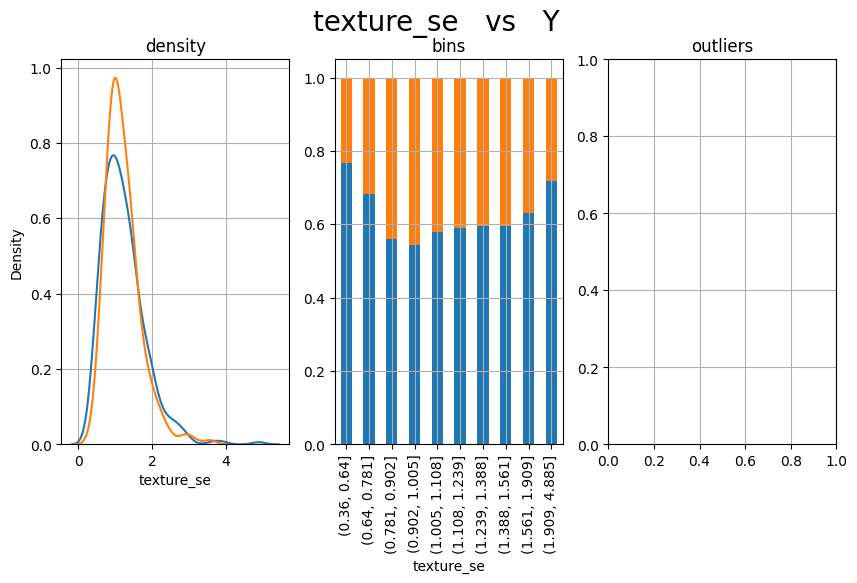

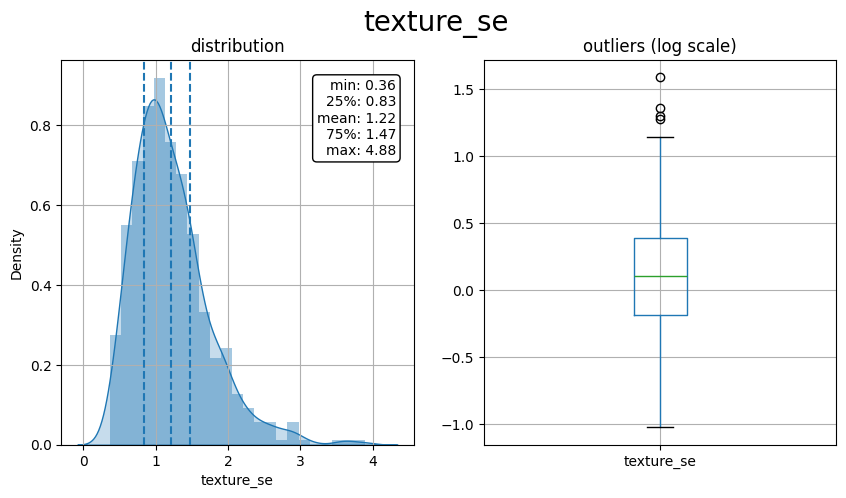

Anova F: the variables are Non-Correlated (p-value: 0.843)


In [219]:
#texture_se
bivariate_plot(dtf, x="texture_se", y="Y", figsize=(10,5))
freqdist_plot(dtf, "texture_se", box_logscale=True, figsize=(10,5))
coeff,p = test_corr(dtf, x="texture_se", y="Y")


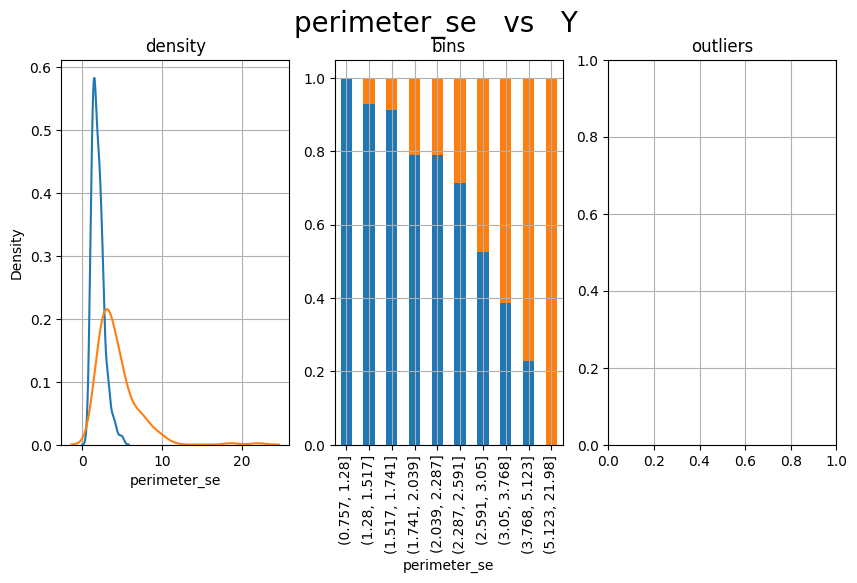

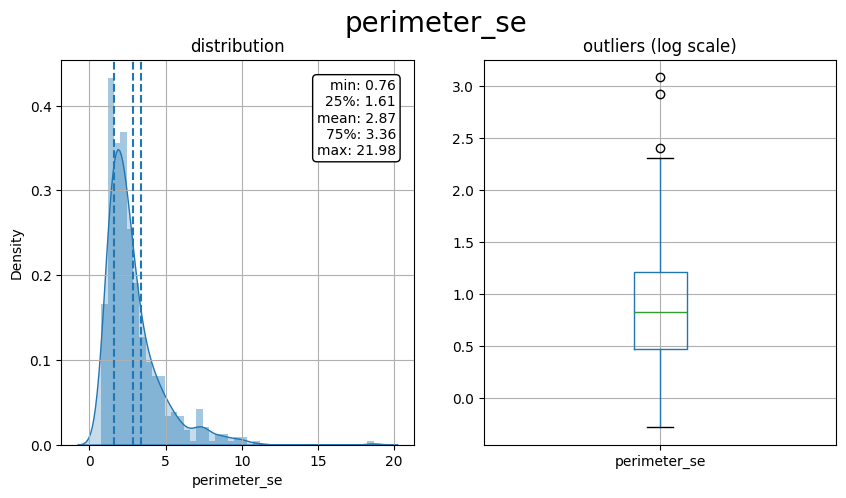

Anova F: the variables are Correlated (p-value: 0.0)


In [220]:
#perimeter_se
bivariate_plot(dtf, x="perimeter_se", y="Y", figsize=(10,5))
freqdist_plot(dtf, "perimeter_se", box_logscale=True, figsize=(10,5))
coeff,p = test_corr(dtf, x="perimeter_se", y="Y")
features.append("perimeter_se")

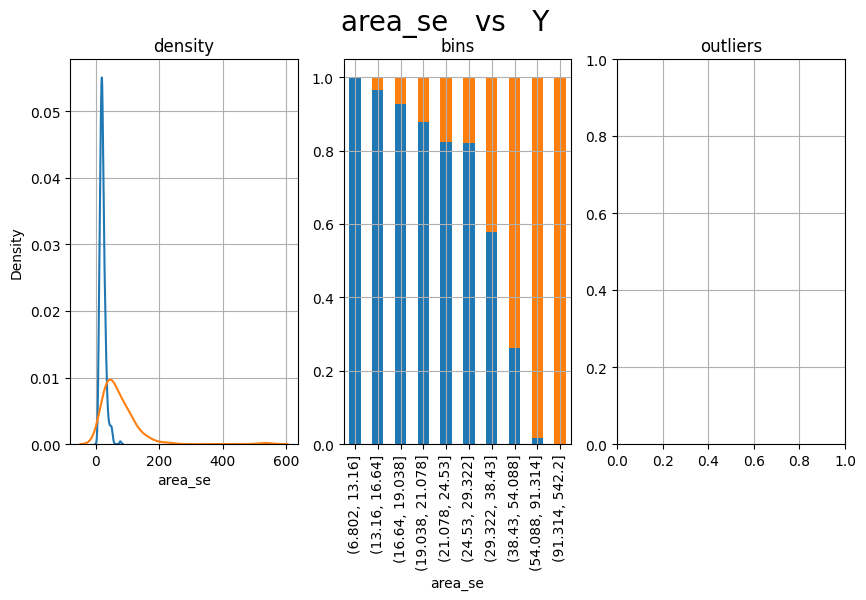

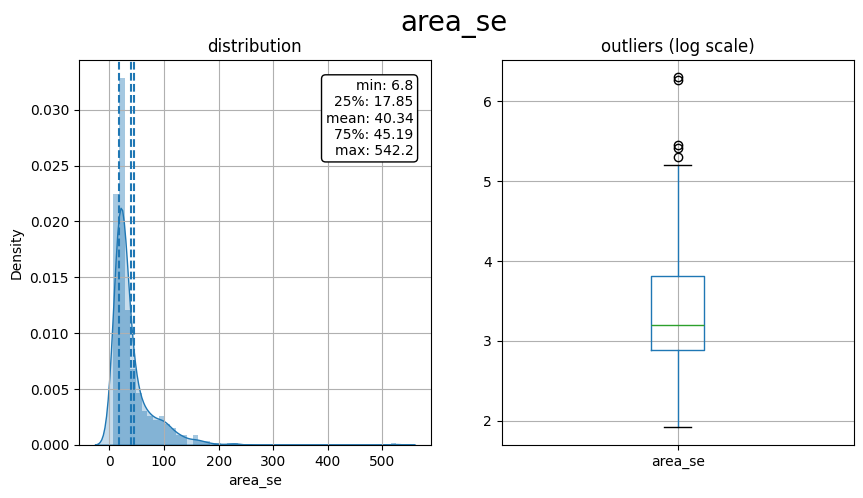

Anova F: the variables are Correlated (p-value: 0.0)


In [221]:
#area_se
bivariate_plot(dtf, x="area_se", y="Y", figsize=(10,5))
freqdist_plot(dtf, "area_se", box_logscale=True, figsize=(10,5))
coeff,p = test_corr(dtf, x="area_se", y="Y")
features.append("area_se")

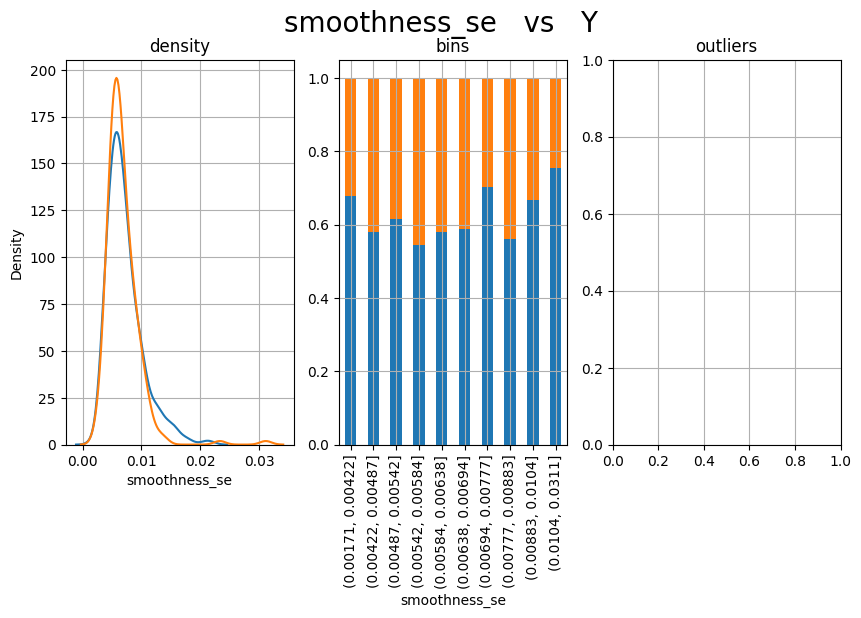

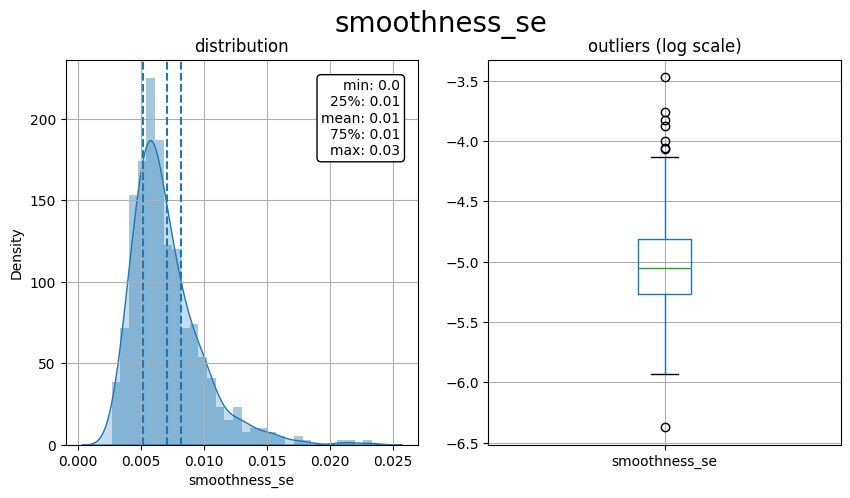

Anova F: the variables are Non-Correlated (p-value: 0.11)


In [222]:
#smoothness_se
bivariate_plot(dtf, x="smoothness_se", y="Y", figsize=(10,5))
freqdist_plot(dtf, "smoothness_se", box_logscale=True, figsize=(10,5))
coeff,p = test_corr(dtf, x="smoothness_se", y="Y")


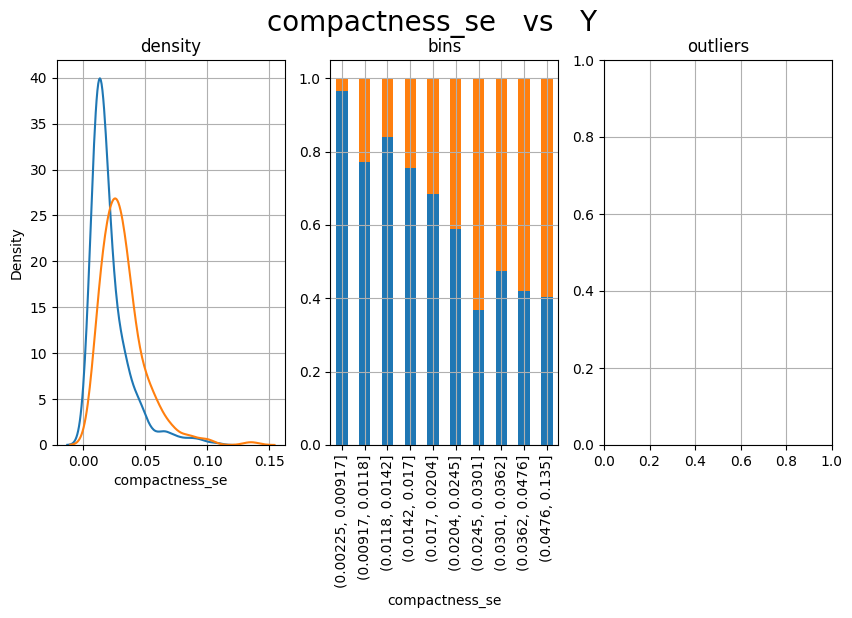

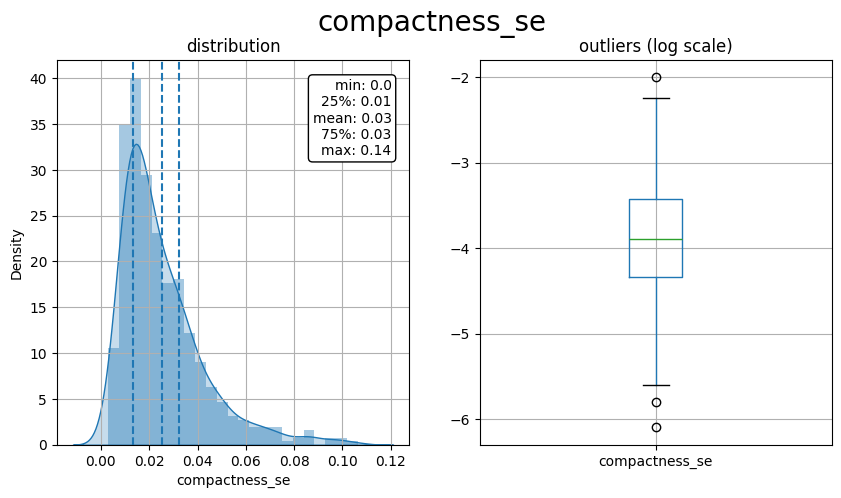

Anova F: the variables are Correlated (p-value: 0.0)


In [223]:
#compactness_se
bivariate_plot(dtf, x="compactness_se", y="Y", figsize=(10,5))
freqdist_plot(dtf, "compactness_se", box_logscale=True, figsize=(10,5))
coeff,p = test_corr(dtf, x="compactness_se", y="Y")
features.append("compactness_se")

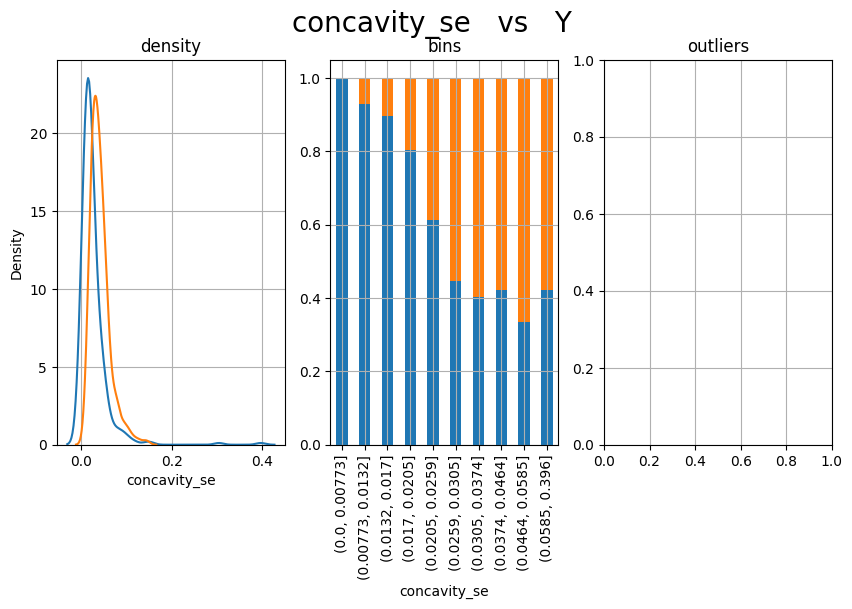

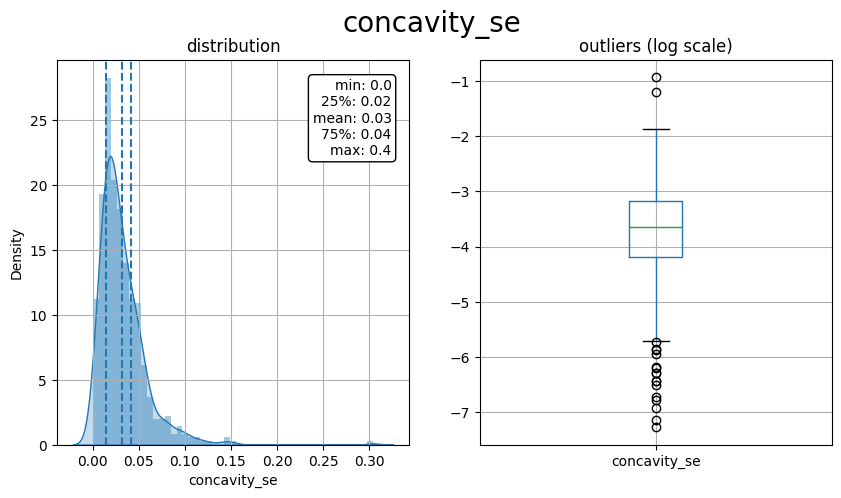

Anova F: the variables are Correlated (p-value: 0.0)


In [224]:
#concavity_se
bivariate_plot(dtf, x="concavity_se", y="Y", figsize=(10,5))
freqdist_plot(dtf, "concavity_se", box_logscale=True, figsize=(10,5))
coeff,p = test_corr(dtf, x="concavity_se", y="Y")
features.append("concavity_se")

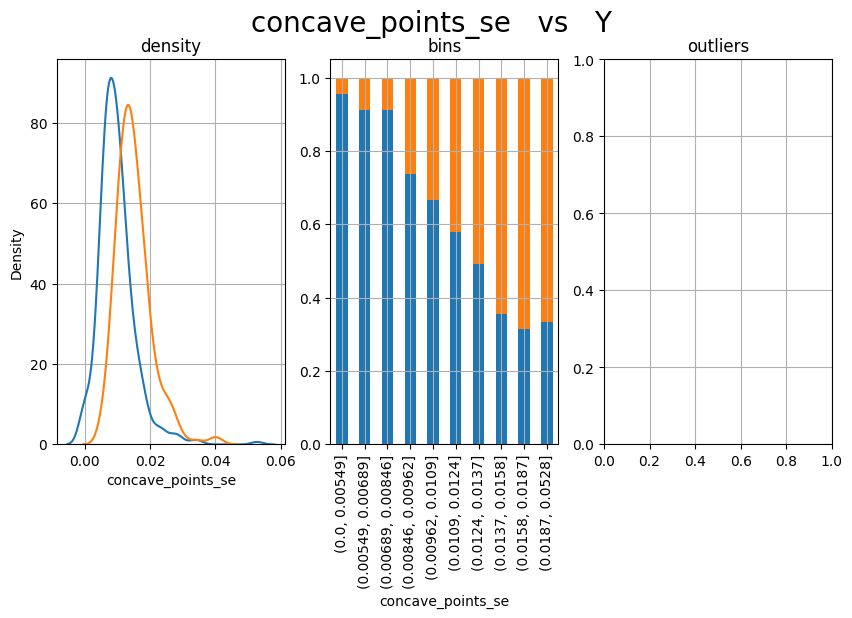

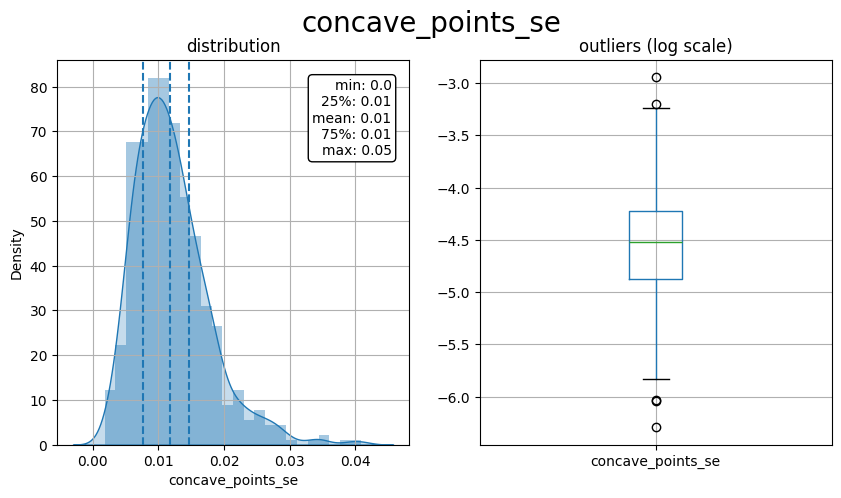

Anova F: the variables are Correlated (p-value: 0.0)


In [225]:
#concave points_se
bivariate_plot(dtf, x="concave_points_se", y="Y", figsize=(10,5))
freqdist_plot(dtf, "concave_points_se", box_logscale=True, figsize=(10,5))
coeff,p = test_corr(dtf, x="concave_points_se", y="Y")

features.append("concave_points_se")

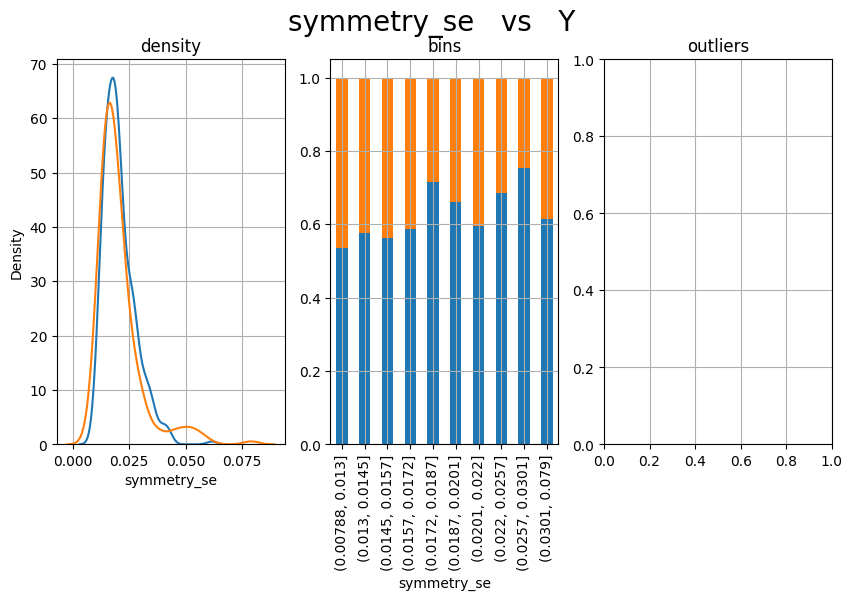

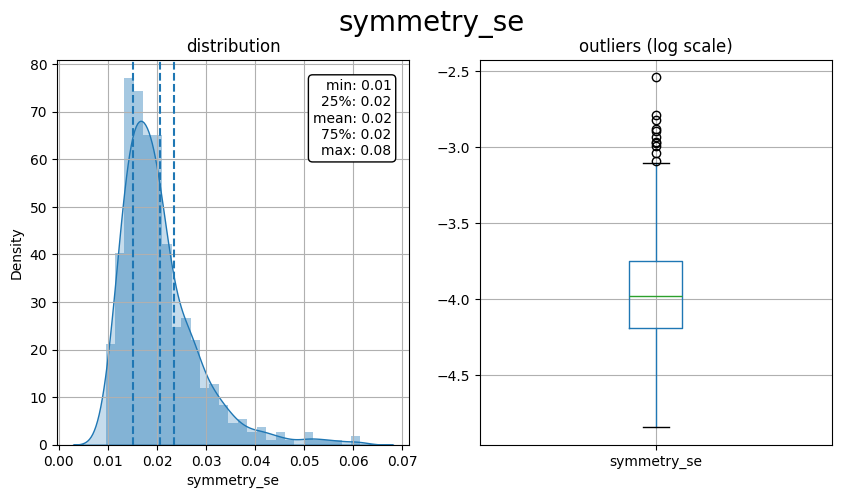

Anova F: the variables are Non-Correlated (p-value: 0.877)


In [226]:
#symmetry_se
bivariate_plot(dtf, x="symmetry_se", y="Y", figsize=(10,5))
freqdist_plot(dtf, "symmetry_se", box_logscale=True, figsize=(10,5))
coeff,p = test_corr(dtf, x="symmetry_se", y="Y")


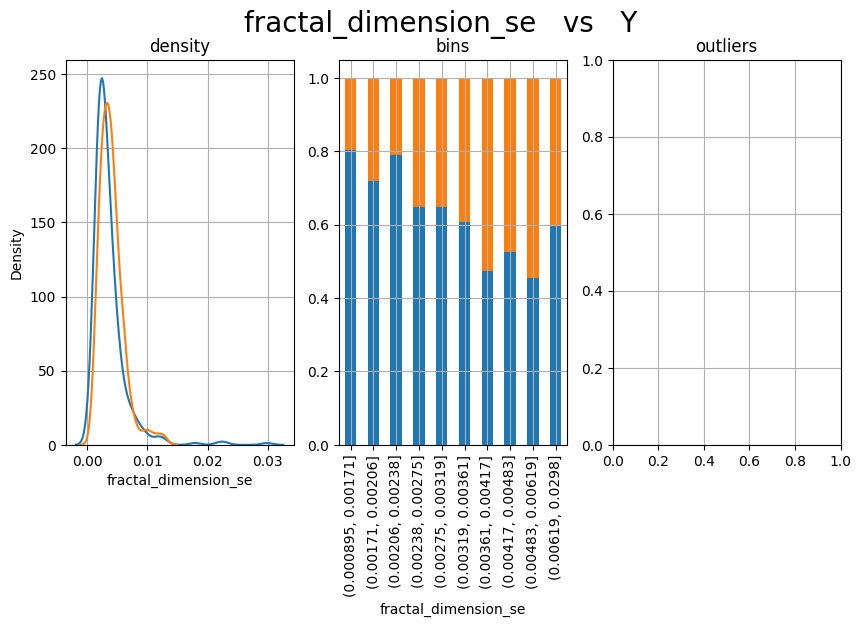

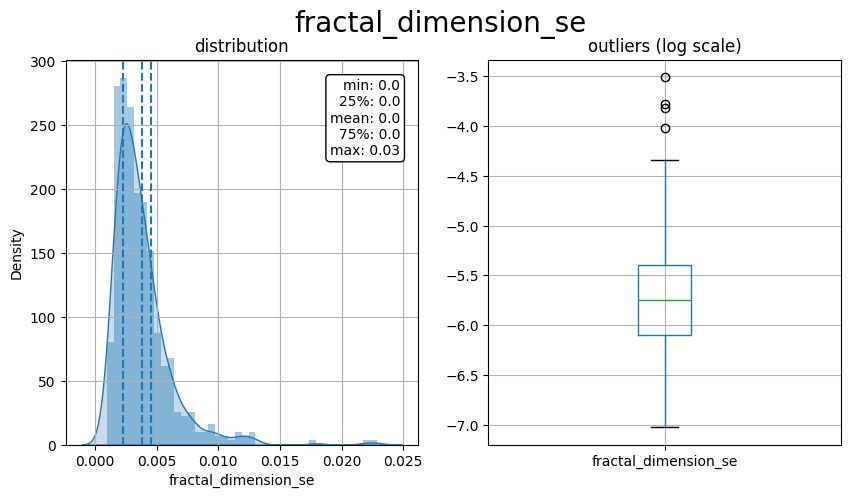

Anova F: the variables are Non-Correlated (p-value: 0.063)


In [227]:
#fractal_dimension_se
bivariate_plot(dtf, x="fractal_dimension_se", y="Y", figsize=(10,5))
freqdist_plot(dtf, "fractal_dimension_se", box_logscale=True, figsize=(10,5))
coeff,p = test_corr(dtf, x="fractal_dimension_se", y="Y")

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(data, export_path=None):
    num_columns = len(data.columns)
    
    for column in data.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(x=column, data=data, bins=20, kde=True)
        plt.title(f"{column} Histogram")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        if export_path:
            plt.savefig(os.path.join(export_path, f"{column}_histogram.png"), dpi=300)
        plt.show()

def plot_histograms_with_hue(data, hue_column, export_path=None):
    num_columns = len(data.columns)
    
    for column in data.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(x=column, data=data, bins=20, kde=True, hue=hue_column, stat="probability")
        plt.title(f"{column} Histogram with {hue_column}")
        plt.xlabel(column)
        plt.ylabel("Probability")
        if export_path:
            plt.savefig(os.path.join(export_path, f"{column}_histogram_with_{hue_column}.png"), dpi=300)
        plt.show()

# Example usage:
plot_histograms(data=dtf, export_path="E:\\ML ")
plot_histograms_with_hue(data=dtf, hue_column="Y", export_path="E:\\ML ")

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(data, export_path=None):
    num_columns = len(data.columns)
    
    for column in data.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(x=column, data=data, bins=20, kde=True)
        plt.title(f"{column} Histogram")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        if export_path:
            plt.savefig(os.path.join(export_path, f"{column}_histogram.png"), dpi=300)
        plt.show()

def plot_histograms_with_hue(data, hue_column, export_path=None):
    num_columns = len(data.columns)
    
    for column in data.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(x=column, data=data, bins=20, kde=True, hue=hue_column, stat="probability")
        plt.title(f"{column} Histogram with {hue_column}")
        plt.xlabel(column)
        plt.ylabel("Probability")
        if export_path:
            plt.savefig(os.path.join(export_path, f"{column}_histogram_with_{hue_column}.png"), dpi=300)
        plt.show()

def plot_boxplots(data, export_path=None, vertical=True, combined=False):
    num_columns = len(data.columns)
    
    if combined:
        plt.figure(figsize=(12, 8))
        if vertical:
            sns.boxplot(data=data)
        else:
            sns.boxplot(data=data, orient="h")
        plt.title("Box Plot for All Columns")
        plt.xlabel("Columns")
        plt.ylabel("Values")
        if export_path:
            plt.savefig(os.path.join(export_path, "all_columns_boxplot.png"), dpi=300)
        plt.show()
    else:
        for column in data.columns:
            plt.figure(figsize=(10, 6))
            if vertical:
                sns.boxplot(x=data[column])
            else:
                sns.boxplot(y=data[column])
            plt.title(f"{column} Box Plot")
            plt.xlabel(column)
            if export_path:
                plt.savefig(os.path.join(export_path, f"{column}_boxplot.png"), dpi=300)
            plt.show()

# Example usage:
plot_histograms(data=dtf, export_path="E:\\ML Assignment")
plot_histograms_with_hue(data=dtf, hue_column="Y", export_path="E:\\ML Assignment")
plot_boxplots(data=dtf, export_path="E:\\ML Assignment")
plot_boxplots(data=dtf, export_path="E:\\ML Assignment", vertical=False)
plot_boxplots(data=dtf, export_path="E:\\ML Assignment", combined=True)
plot_boxplots(data=dtf, export_path="E:\\ML Assignment", vertical=False, combined=True)

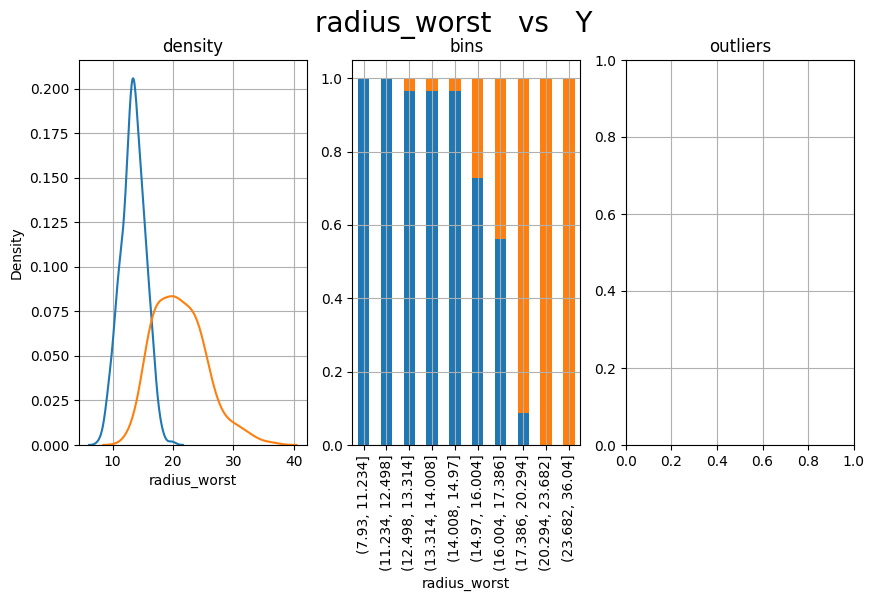

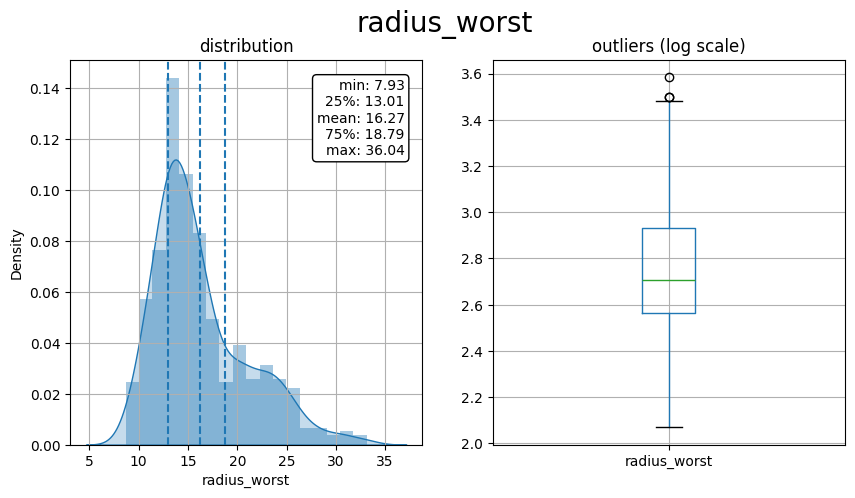

Anova F: the variables are Correlated (p-value: 0.0)


In [231]:
#radius_worst
bivariate_plot(dtf, x="radius_worst", y="Y",figsize=(10,5))
freqdist_plot(dtf, "radius_worst", box_logscale=True, figsize=(10,5))
coeff,p = test_corr(dtf, x="radius_worst", y="Y")
features.append("radius_worst")

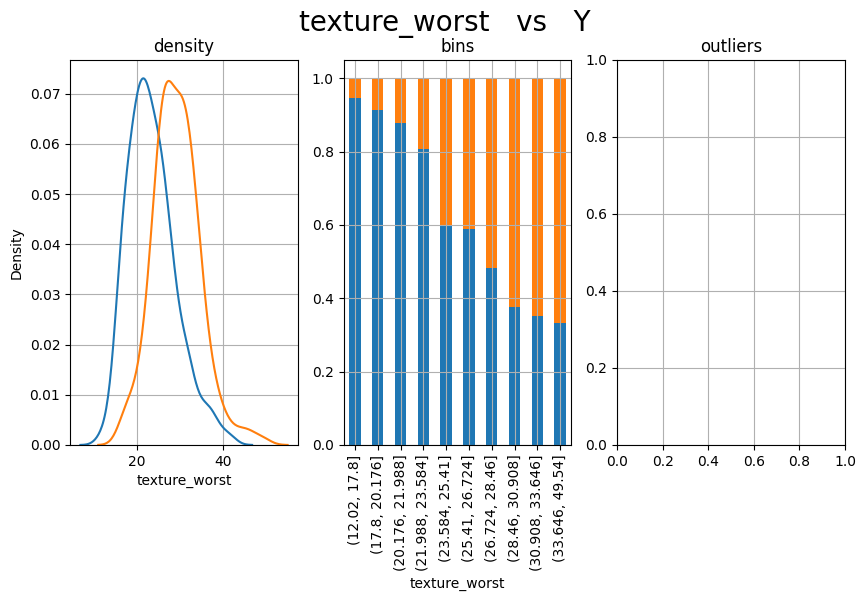

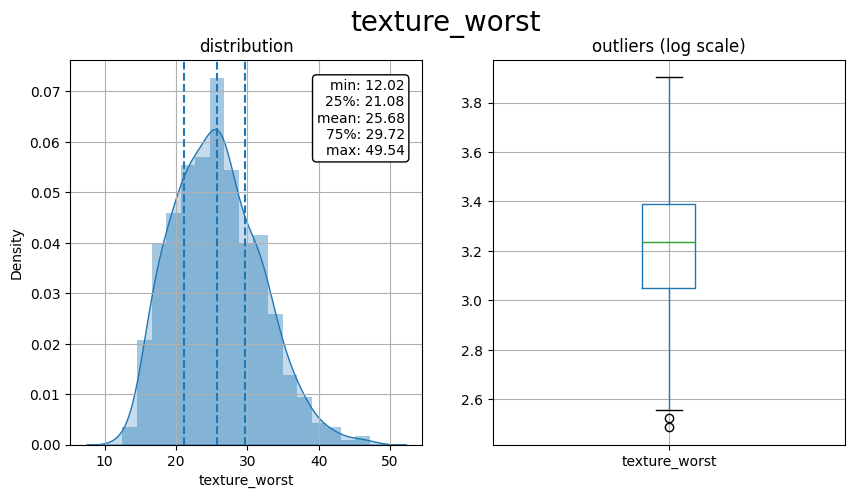

Anova F: the variables are Correlated (p-value: 0.0)


In [232]:
#texture_worst
bivariate_plot(dtf, x="texture_worst", y="Y", figsize=(10,5))
freqdist_plot(dtf, "texture_worst", box_logscale=True, figsize=(10,5))
coeff,p = test_corr(dtf, x="texture_worst", y="Y")
features.append("texture_worst")

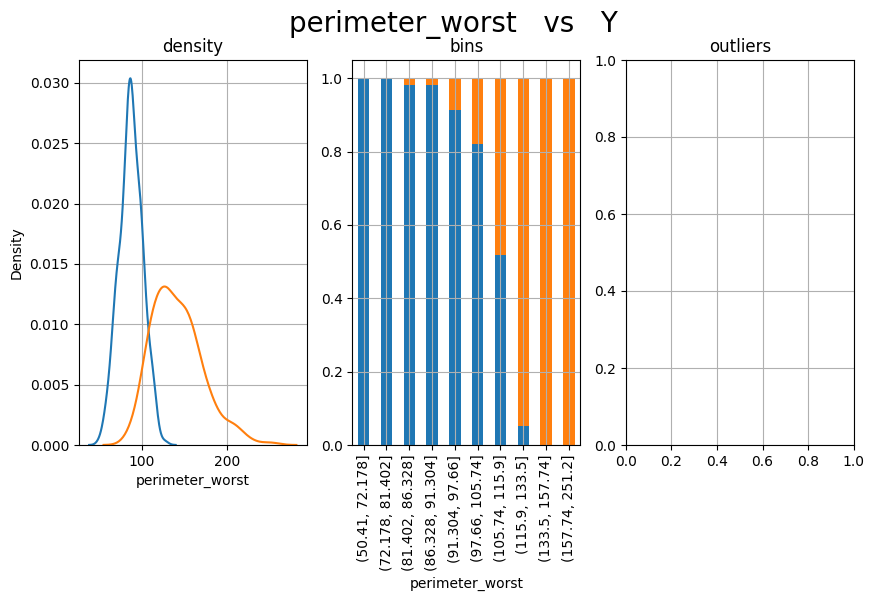

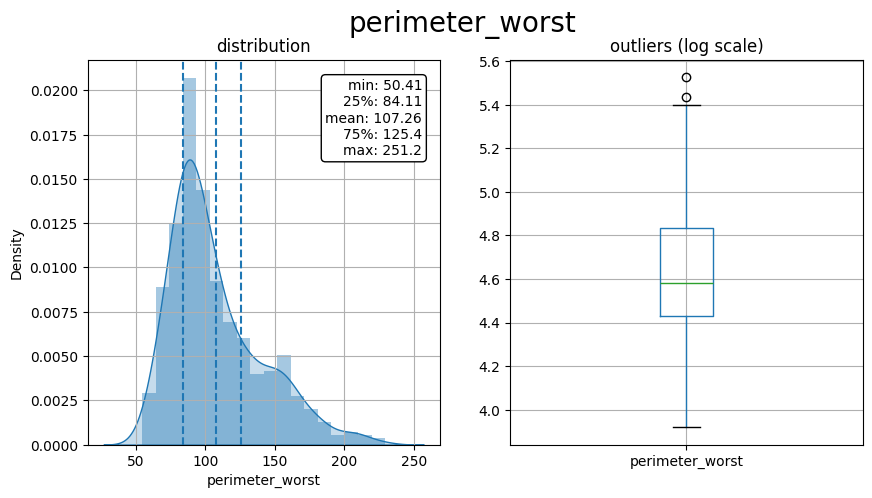

Anova F: the variables are Correlated (p-value: 0.0)


In [233]:
#perimeter_worst
bivariate_plot(dtf, x="perimeter_worst", y="Y", figsize=(10,5))
freqdist_plot(dtf, "perimeter_worst", box_logscale=True, figsize=(10,5))
coeff,p = test_corr(dtf, x="perimeter_worst", y="Y")
features.append("perimeter_worst")

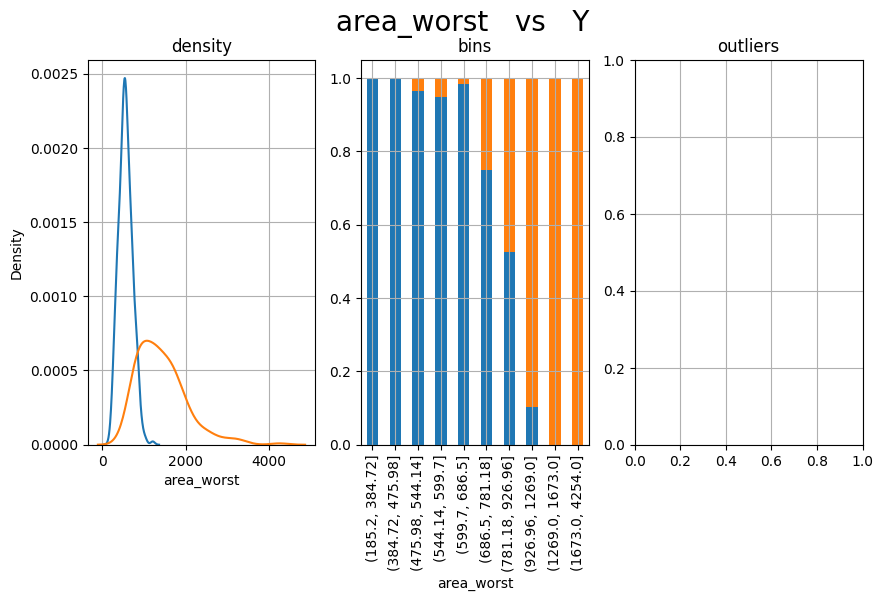

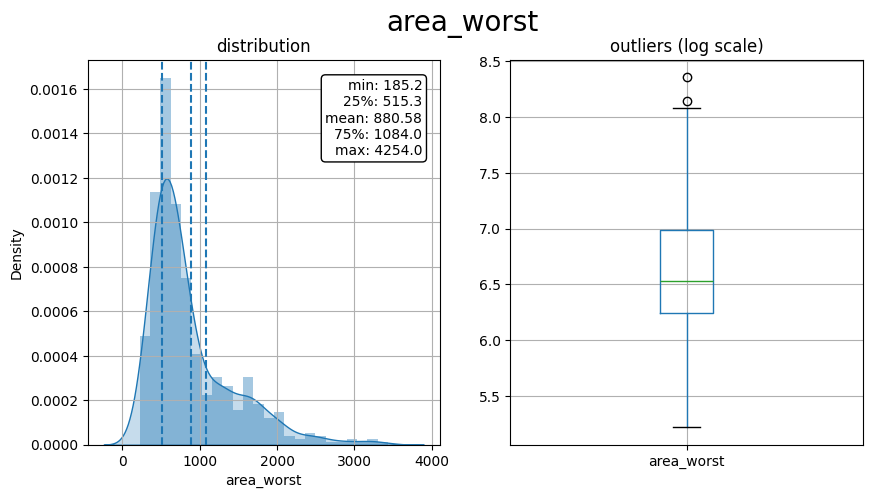

Anova F: the variables are Correlated (p-value: 0.0)


In [234]:
#area_worst
bivariate_plot(dtf, x="area_worst", y="Y", figsize=(10,5))
freqdist_plot(dtf, "area_worst", box_logscale=True, figsize=(10,5))
coeff,p = test_corr(dtf, x="area_worst", y="Y")
features.append("area_worst")

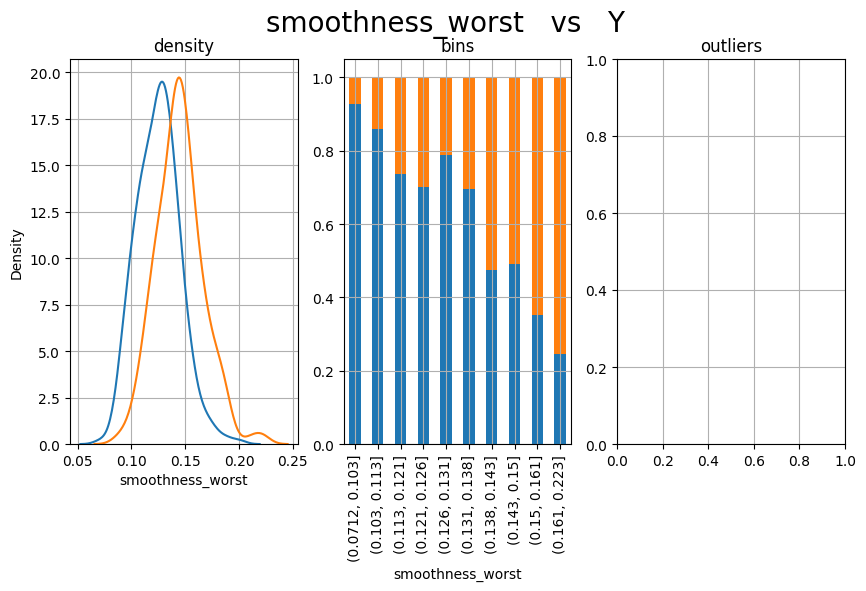

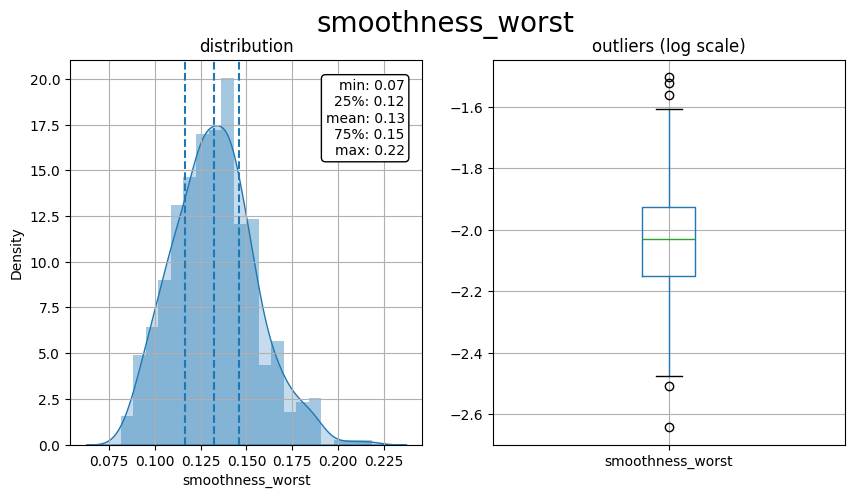

Anova F: the variables are Correlated (p-value: 0.0)


In [235]:
#smoothness_worst
bivariate_plot(dtf, x="smoothness_worst", y="Y", figsize=(10,5))
freqdist_plot(dtf, "smoothness_worst", box_logscale=True, figsize=(10,5))
coeff,p = test_corr(dtf, x="smoothness_worst", y="Y")
features.append("smoothness_worst")

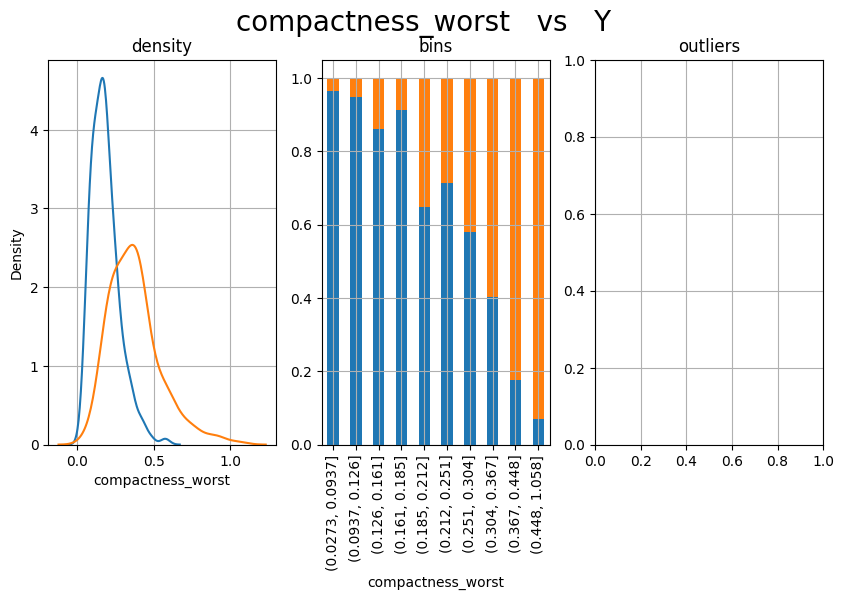

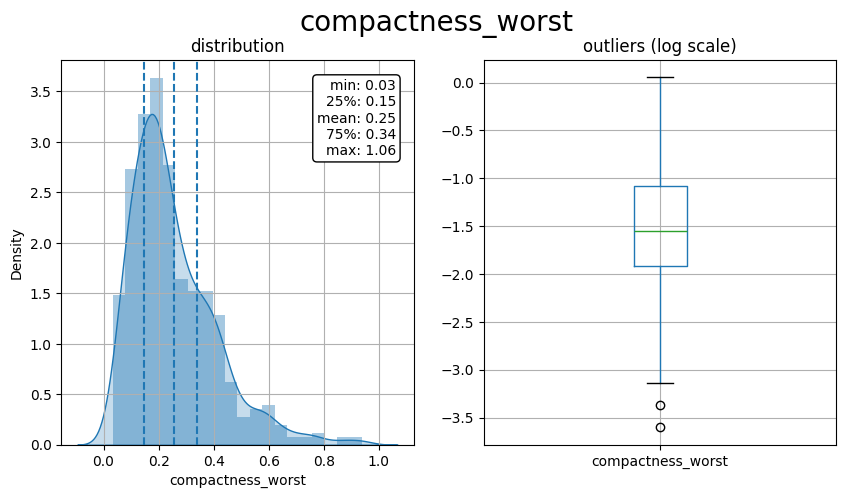

Anova F: the variables are Correlated (p-value: 0.0)


In [236]:
#compactness_worst
bivariate_plot(dtf, x="compactness_worst", y="Y", figsize=(10,5))
freqdist_plot(dtf, "compactness_worst", box_logscale=True, figsize=(10,5))
coeff,p = test_corr(dtf, x="compactness_worst", y="Y")
features.append("compactness_worst")

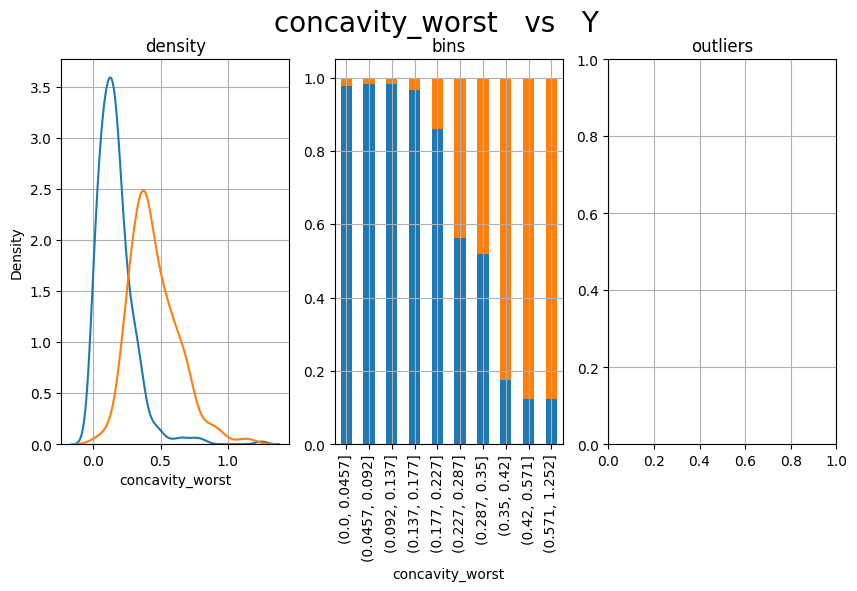

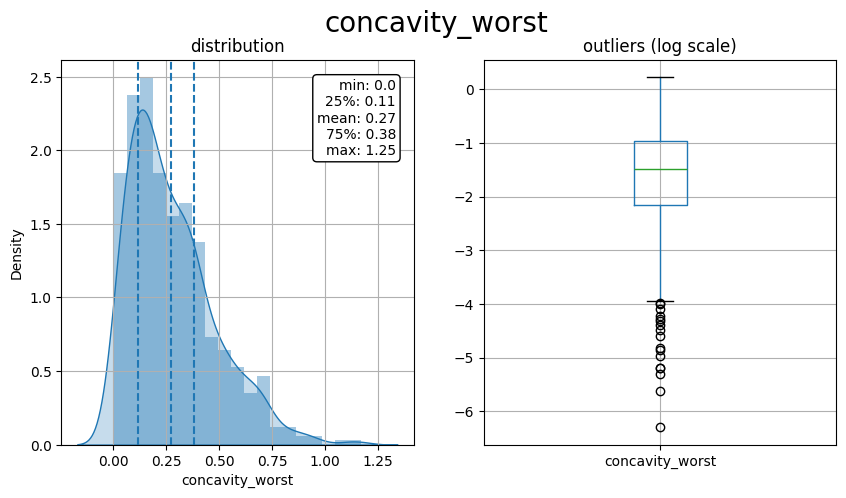

Anova F: the variables are Correlated (p-value: 0.0)


In [237]:
#concavity_worst
bivariate_plot(dtf, x="concavity_worst", y="Y", figsize=(10,5))
freqdist_plot(dtf, "concavity_worst", box_logscale=True, figsize=(10,5))
coeff,p = test_corr(dtf, x="concavity_worst", y="Y")
features.append("concavity_worst")

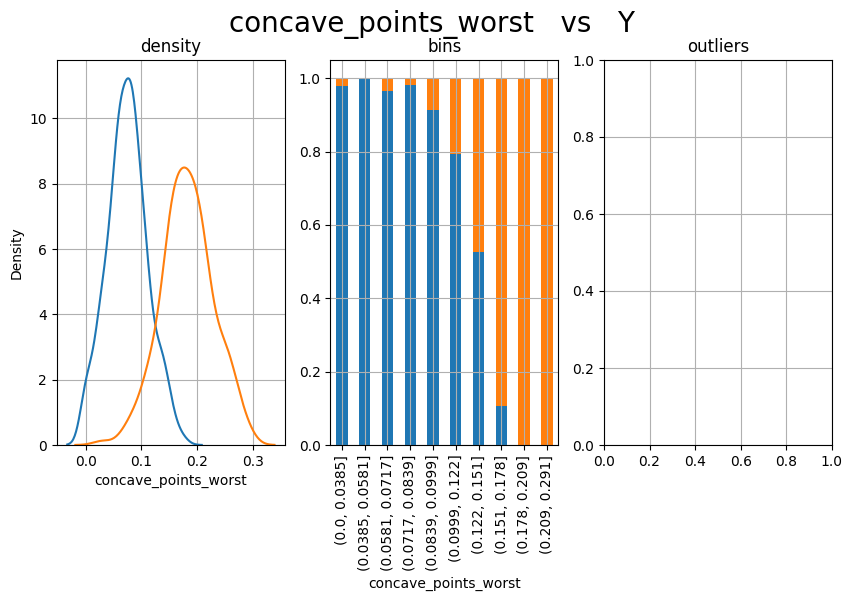

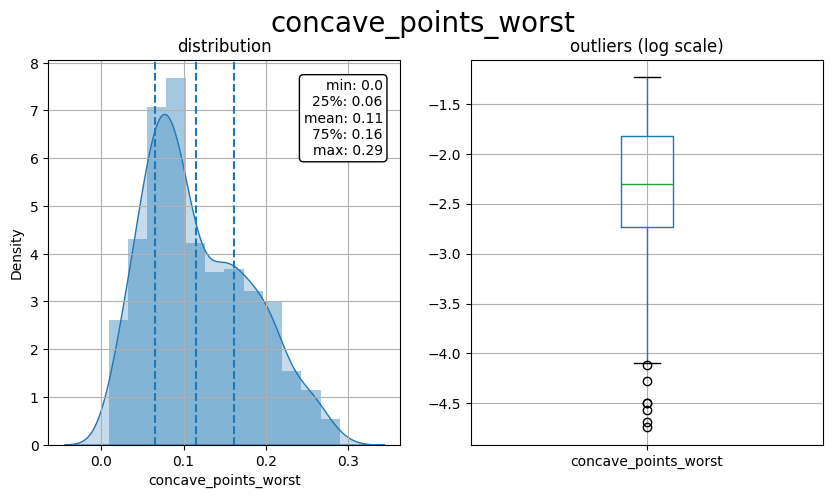

Anova F: the variables are Correlated (p-value: 0.0)


In [238]:
#concave points_worst
bivariate_plot(dtf, x="concave_points_worst", y="Y", figsize=(10,5))
freqdist_plot(dtf, "concave_points_worst", box_logscale=True, figsize=(10,5))
coeff,p = test_corr(dtf, x="concave_points_worst", y="Y")
features.append("concave_points_worst")

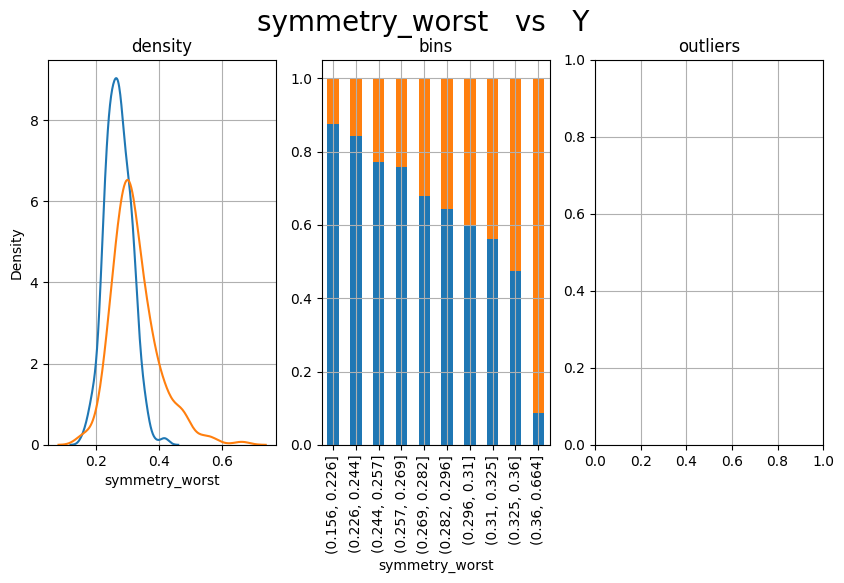

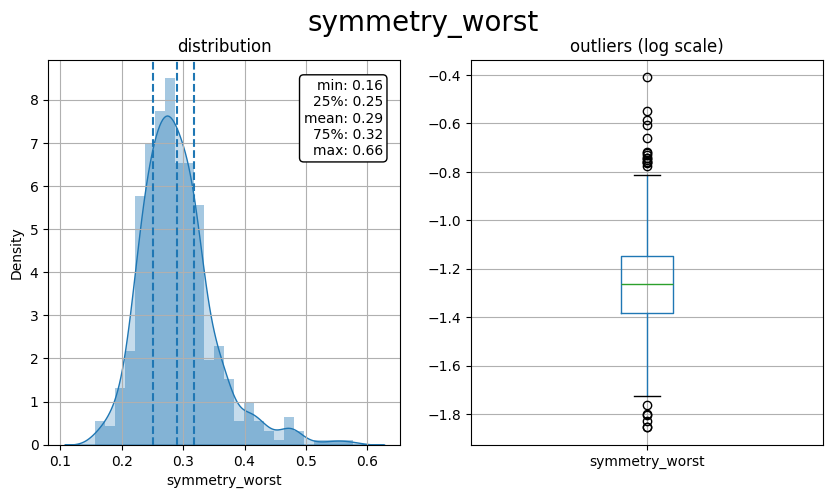

Anova F: the variables are Correlated (p-value: 0.0)


In [239]:
#symmetry_worst
bivariate_plot(dtf, x="symmetry_worst", y="Y", figsize=(10,5))
freqdist_plot(dtf, "symmetry_worst", box_logscale=True, figsize=(10,5))
coeff,p = test_corr(dtf, x="symmetry_worst", y="Y")
features.append("symmetry_worst")

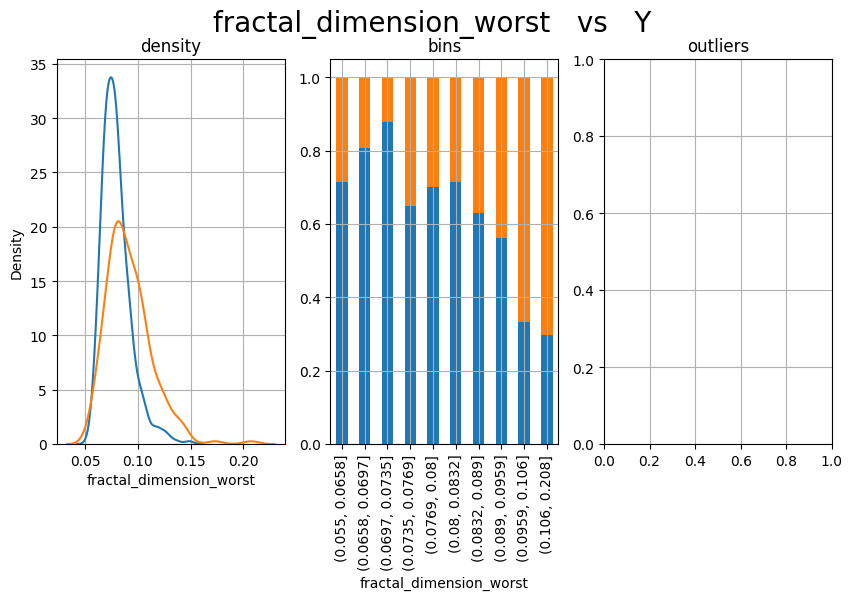

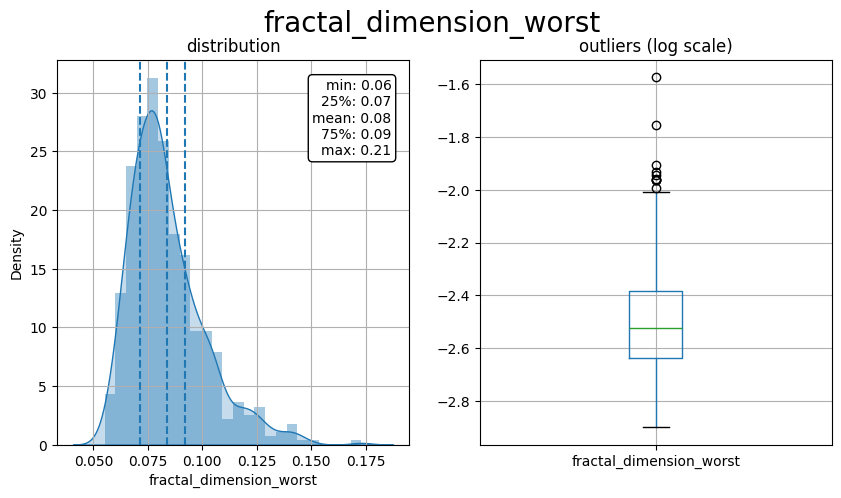

Anova F: the variables are Correlated (p-value: 0.0)


In [240]:
#fractal_dimension_worst
bivariate_plot(dtf, x="fractal_dimension_worst", y="Y", figsize=(10,5))
freqdist_plot(dtf, "fractal_dimension_worst", box_logscale=True, figsize=(10,5))
coeff,p = test_corr(dtf, x="fractal_dimension_worst", y="Y")
features.append("fractal_dimension_worst")

In [242]:
dtf = dtf[features+["Y"]]
dtf.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave_points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  Y  
0          0.4601                  0.11890  1  
1          0.2750                  0.08902  1  
2          0.3613                  0.08758  1  
3          0.6638                  0.17300  1  
4          0.2364                  0.07678  1  

[5 rows x 27 columns]

2 - Preprocessing

To do:
Dataset partitioning
Resample
Treat missings
Encode categorical data
Scaling
Preprocess Test data

In [243]:
check = data_preprocessing(dtf, y="Y")

--- check missing ---
   OK: No missing
--- check categorical data ---
   OK: No categorical
--- split train/test ---
   OK: step skipped
--- scaling ---
   OK: step skipped


Partitioning

In [244]:
dtf_train, dtf_test = dtf_partitioning(dtf, y="Y", test_size=0.3, shuffle=False)

X_train shape: (398, 26) | X_test shape: (171, 26)
y_train mean: 0.43 | y_test mean: 0.23
27 features: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [245]:
dtf_train.head(3)

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                 0.07871  ...          17.33            184.6      2019.0   
1                 0.05667  ...          23.41            158.8      1956.0   
2                 0.05999  ...          25.53            152.5      1709.0   

   smoothness_worst  compactness_worst  concavity_worst  concave_points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   

   symmetry_worst  fractal_dimension_worst  Y  
0          0.4601                  0.11890  1  
1          0.2750                  0.08902  1  
2          0.3613                  0.08758  1  

[3 rows x 27 columns]

In [246]:
dtf_test.head(3)

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
398        11.06         14.83           70.31      378.2          0.07741   
399        11.80         17.26           75.26      431.9          0.09087   
400        17.91         21.02          124.40      994.0          0.12300   

     compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
398           0.04768         0.02712             0.007246         0.1535   
399           0.06232         0.02853             0.016380         0.1847   
400           0.25760         0.31890             0.119800         0.2113   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
398                 0.06214  ...          20.35            80.79       496.7   
399                 0.06019  ...          24.49            86.00       562.0   
400                 0.07115  ...          27.78           149.60      1304.0   

     smoothness_worst  compactness_worst  concavity_worst  \
398            0.1120             0.1879           0.2079   
399            0.1244             0.1726           0.1449   
400            0.1873             0.5917           0.9034   

     concave_points_worst  symmetry_worst  fractal_dimension_worst  Y  
398               0.05556          0.2590                  0.09158  0  
399               0.05356          0.2779                  0.08121  0  
400               0.19640          0.3245                  0.11980  1  

[3 rows x 27 columns]

In [247]:
check = rebalance(dtf_train, y="Y", balance=None)

--- situation ---
     Y      %
0  225  56.5%
1  173  43.5%
tot: 398


Scaling

In [248]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

In [249]:
dtf_train, scaler = scaling(dtf_train, y="Y", scalerX=scaler, task="classification")

In [250]:
dtf_train.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.521037      0.022658        0.545989   0.364042         0.680010   
1     0.643144      0.272574        0.615783   0.502017         0.270471   
2     0.601496      0.390260        0.595743   0.449798         0.572941   
3     0.210090      0.360839        0.233501   0.102993         0.973233   
4     0.629893      0.156578        0.630986   0.489705         0.459788   

   compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0          0.792037        0.703140             0.731113       0.668446   
1          0.181768        0.203608             0.348757       0.344367   
2          0.431017        0.462512             0.635686       0.481580   
3          0.811361        0.565604             0.522863       0.763481   
4          0.347893        0.463918             0.518390       0.342766   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                0.605518  ...       0.141525         0.750126    0.564802   
1                0.141323  ...       0.303571         0.605903    0.545399   
2                0.211247  ...       0.360075         0.570686    0.469324   
3                1.000000  ...       0.385928         0.270893    0.117808   
4                0.186816  ...       0.123934         0.569009    0.428052   

   smoothness_worst  compactness_worst  concavity_worst  concave_points_worst  \
0          0.601136           0.619292         0.568610              0.912027   
1          0.347553           0.154563         0.192971              0.639175   
2          0.483590           0.385375         0.359744              0.835052   
3          0.915472           0.814012         0.548642              0.884880   
4          0.437364           0.172415         0.319489              0.558419   

   symmetry_worst  fractal_dimension_worst  Y  
0        0.598462                 0.418864  1  
1        0.233590                 0.222878  1  
2        0.403706                 0.213433  1  
3        1.000000                 0.773711  1  
4        0.157500                 0.142595  1  

[5 rows x 27 columns]

Shape: (398, 27)
-----------------
radius_mean --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
texture_mean --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
perimeter_mean --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
area_mean --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
smoothness_mean --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
compactness_mean --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
concavity_mean --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
concave_points_mean --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
symmetry_mean --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
fractal_dimension_mean --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
radius_se --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
perimeter_se --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
area_se --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
compactness_se --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
concavity_se --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
concave_points_se --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
radius_worst 

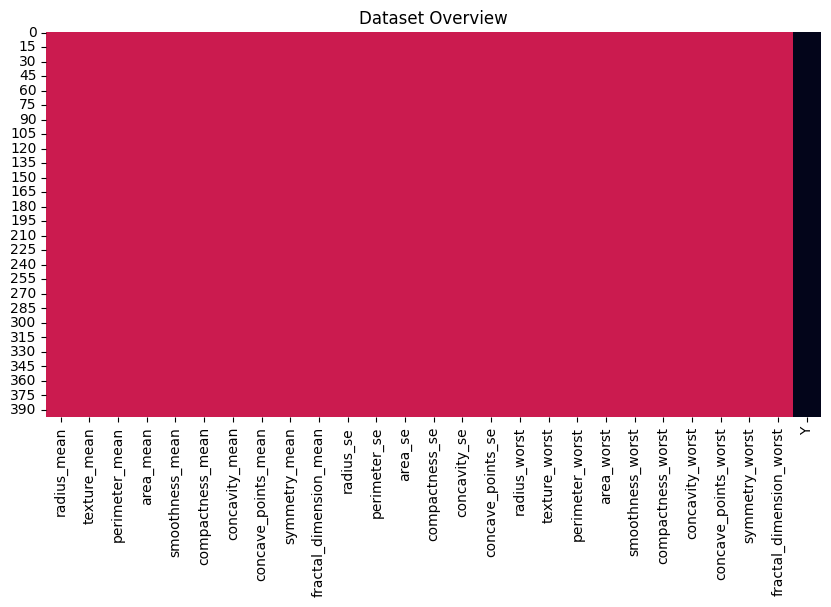

 Categerocial   Numerical/DateTime   NaN 


In [251]:
dtf_overview(dtf_train)

In [252]:
dtf_test = dtf_test[dtf_train.columns]
dtf_test.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
398        11.06         14.83           70.31      378.2          0.07741   
399        11.80         17.26           75.26      431.9          0.09087   
400        17.91         21.02          124.40      994.0          0.12300   
401        11.93         10.91           76.14      442.7          0.08872   
402        12.96         18.29           84.18      525.2          0.07351   

     compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
398           0.04768         0.02712             0.007246         0.1535   
399           0.06232         0.02853             0.016380         0.1847   
400           0.25760         0.31890             0.119800         0.2113   
401           0.05242         0.02606             0.017960         0.1601   
402           0.07899         0.04057             0.018830         0.1874   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
398                 0.06214  ...          20.35            80.79       496.7   
399                 0.06019  ...          24.49            86.00       562.0   
400                 0.07115  ...          27.78           149.60      1304.0   
401                 0.05541  ...          20.14            87.64       589.5   
402                 0.05899  ...          24.61            96.31       621.9   

     smoothness_worst  compactness_worst  concavity_worst  \
398           0.11200             0.1879           0.2079   
399           0.12440             0.1726           0.1449   
400           0.18730             0.5917           0.9034   
401           0.13740             0.1575           0.1514   
402           0.09329             0.2318           0.1604   

     concave_points_worst  symmetry_worst  fractal_dimension_worst  Y  
398               0.05556          0.2590                  0.09158  0  
399               0.05356          0.2779                  0.08121  0  
400               0.19640          0.3245                  0.11980  1  
401               0.06876          0.2460                  0.07262  0  
402               0.06608          0.3207                  0.07247  0  

[5 rows x 27 columns]

In [253]:
## Scale
dtf_test, _ = scaling(dtf_test, y="Y", scalerX=scaler, fitted=True)

Shape: (171, 27)
-----------------
radius_mean --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
texture_mean --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
perimeter_mean --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
area_mean --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1) | Possible PK
smoothness_mean --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
compactness_mean --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0) | Possible PK
concavity_mean --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
concave_points_mean --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
symmetry_mean --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
fractal_dimension_mean --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
radius_se --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
perimeter_se --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
area_se --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
compactness_se --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
concavity_se --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
concave_points_se --> Type:num | Nas: 0(0%) | Mi

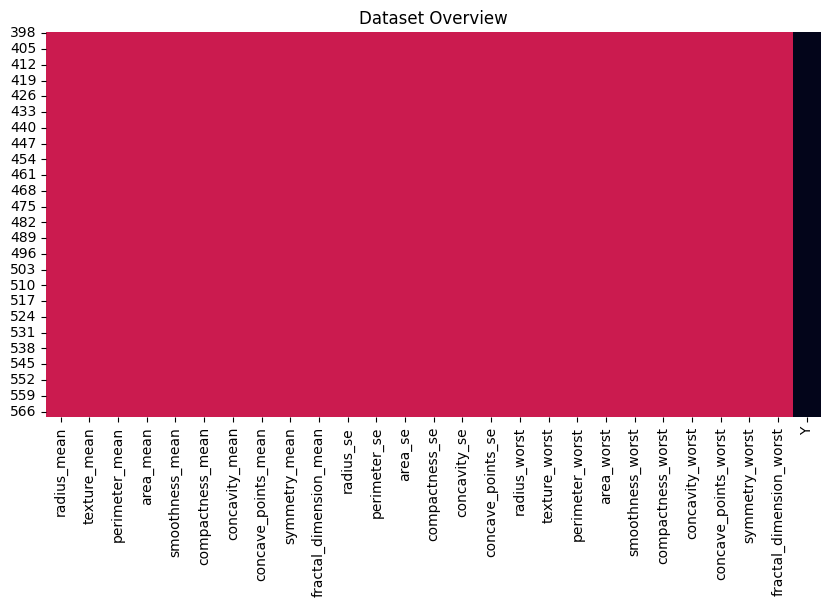

 Categerocial   Numerical/DateTime   NaN 


In [254]:
dtf_overview(dtf_test)

3 - Classification model

Plan:
Feature Selection: by correlation, by p-value, by importance
Model Design
Train / Test
Evaluate
Explainability
Visualize model

Features Selection

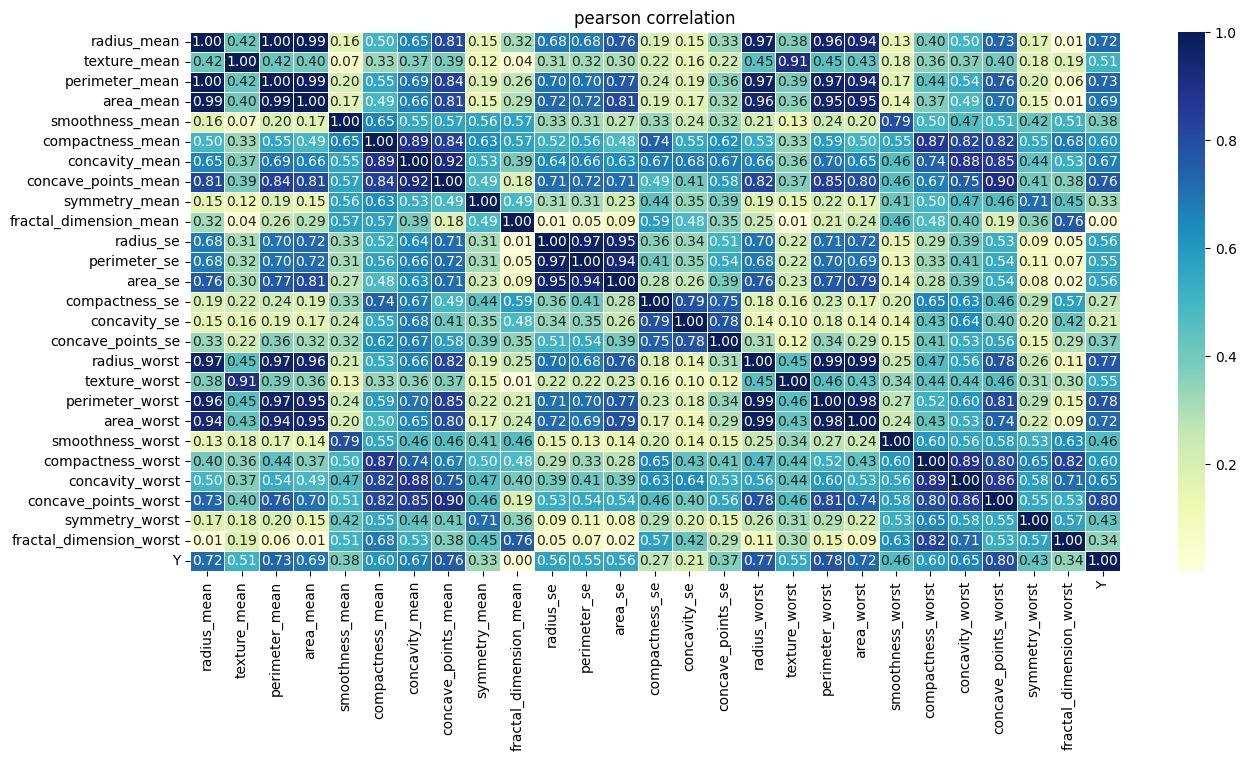

In [255]:
#--- correlation ---#
corr = corr_matrix(dtf_train, method="pearson", negative=False, annotation=True, figsize=(15,7))

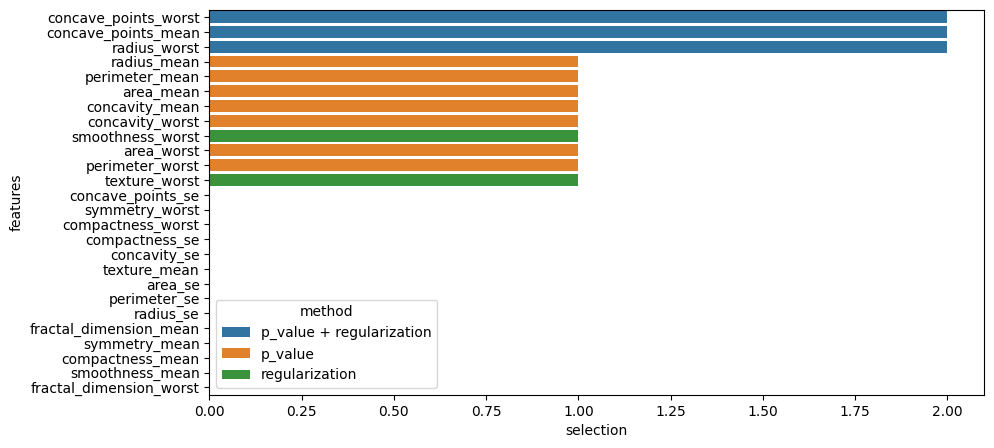

In [256]:
#--- p values ---#
dic_feat_sel = features_selection(dtf_train, y="Y", task="classification", top=10, figsize=(10,5))

--- model used ---
RandomForestClassifier(criterion='entropy', random_state=0)


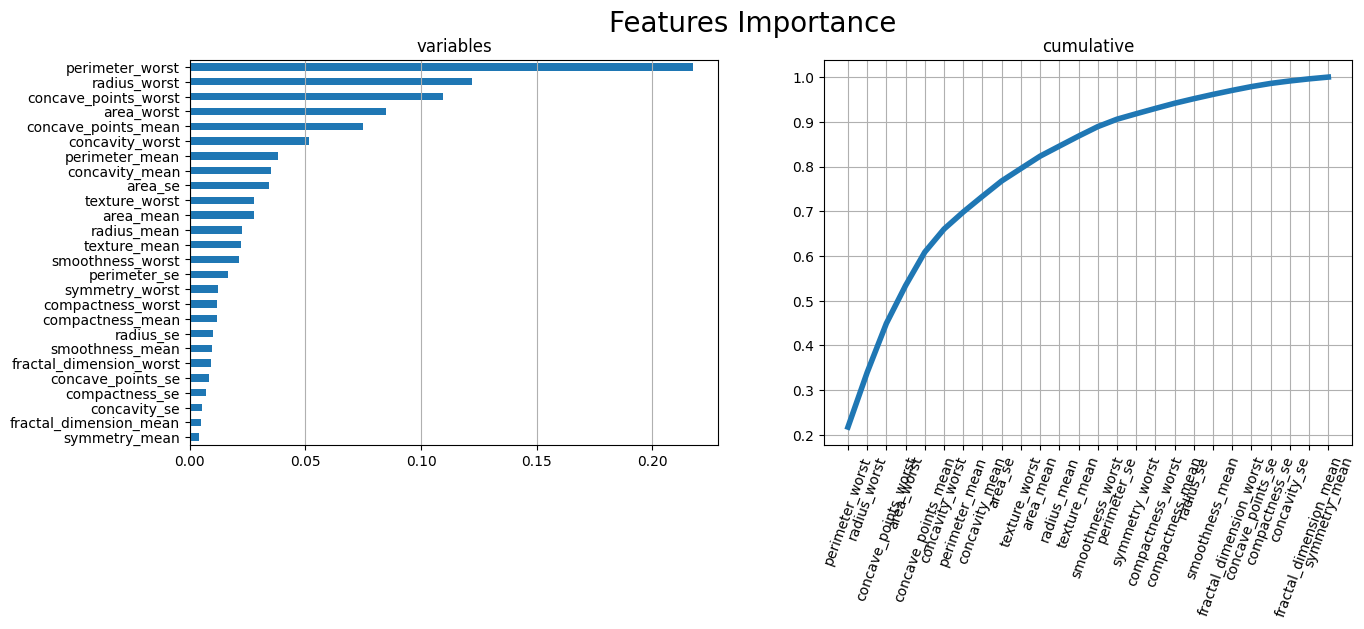

In [257]:
#--- importance ---#
model = ensemble.RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)

feat_imp = features_importance(X=dtf_train.drop("Y",axis=1).values, y=dtf_train["Y"].values, 
                               X_names=dtf_train.drop("Y",axis=1).columns.tolist(), 
                               model=model, task="classification", figsize=(15,5))

Top 85% important features:
perimeter_worst
concave_points_worst
area_worst
radius_worst
perimeter_mean
concave_points_mean
radius_mean
concavity_mean
area_mean
area_se
concavity_worst
texture_worst
perimeter_se


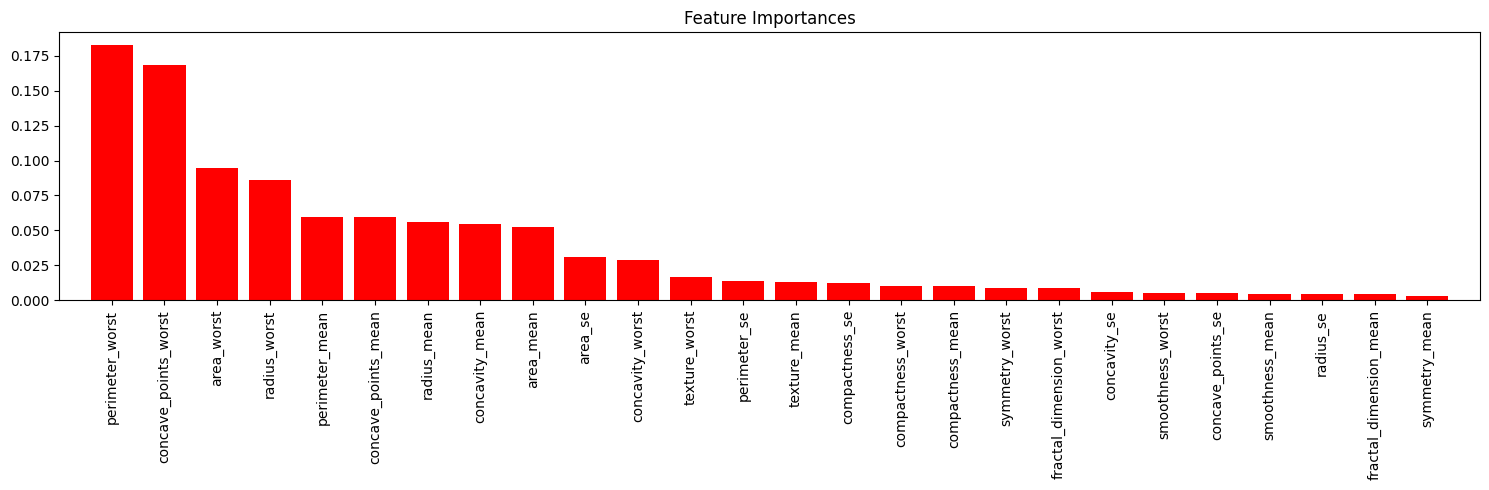

In [258]:
from sklearn import ensemble
import numpy as np

def features_importance(X, y, X_names, model, task, figsize):
    model.fit(X, y)
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    cumulative_importance = np.cumsum(importances[indices])

    # Calculate the threshold for selecting top 85% features
    threshold_idx = np.argmax(cumulative_importance > 0.9)
    selected_indices = indices[:threshold_idx+1]
    
    # Print the names of the selected features
    selected_features = [X_names[i] for i in selected_indices]
    print("Top 85% important features:")
    for feature in selected_features:
        print(feature)
    
    # Plotting feature importance
    if task == "classification":
        import matplotlib.pyplot as plt
        plt.figure(figsize=figsize)
        plt.title("Feature Importances")
        plt.bar(range(X.shape[1]), importances[indices],
                color="r", align="center")
        plt.xticks(range(X.shape[1]), [X_names[i] for i in indices], rotation=90)
        plt.xlim([-1, X.shape[1]])
        plt.tight_layout()
        plt.show()

# Usage
model = ensemble.RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)
features_importance(X=dtf_test.drop("Y",axis=1).values, y=dtf_test["Y"].values, 
                    X_names=dtf_test.drop("Y",axis=1).columns.tolist(), 
                    model=model, task="classification", figsize=(15,5))


In [259]:
# -> selection
X_names = ['area_worst', 'radius_worst', 'perimeter_worst','concavity_mean', 'area_mean', 'radius_mean', 'concavity_worst', 'perimeter_mean', 'area_se',
'texture_mean' ,'texture_worst','area_mean','radius_mean','texture_mean','smoothness_worst','perimeter_se']

Model Design

In [260]:
X_train = dtf_train[X_names].values
y_train = dtf_train["Y"].values

In [261]:
model = ensemble.GradientBoostingClassifier()

In [262]:
param_dic = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],      #weighting factor for the corrections by new trees when added to the model
             'n_estimators':[100,250,500,750,1000,1250,1500,1750],  #number of trees added to the model
             'max_depth':[2,3,4,5,6,7],                             #maximum depth of the tree
             'min_samples_split':[2,4,6,8,10,20,40,60,100],         #sets the minimum number of samples to split
             'min_samples_leaf':[1,3,5,7,9],                        #the minimum number of samples to form a leaf
             'max_features':[2,3,4,5,6,7],                          #square root of features is usually a good starting point
             'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}            #the fraction of samples to be used for fitting the individual base learners. Values lower than 1 generally lead to a reduction of variance and an increase in bias.

--- RandomSearch ---
Best Model parameters: {'subsample': 0.9, 'n_estimators': 1750, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 6, 'max_depth': 6, 'learning_rate': 0.1}
Best Model accuracy: 0.97

--- Kfold Validation ---
accuracy mean - base model: 0.96  --> best model: 1
precision mean - base model: 0.95  --> best model: 1
recall mean - base model: 0.95  --> best model: 1
f1 mean - base model: 0.95  --> best model: 1


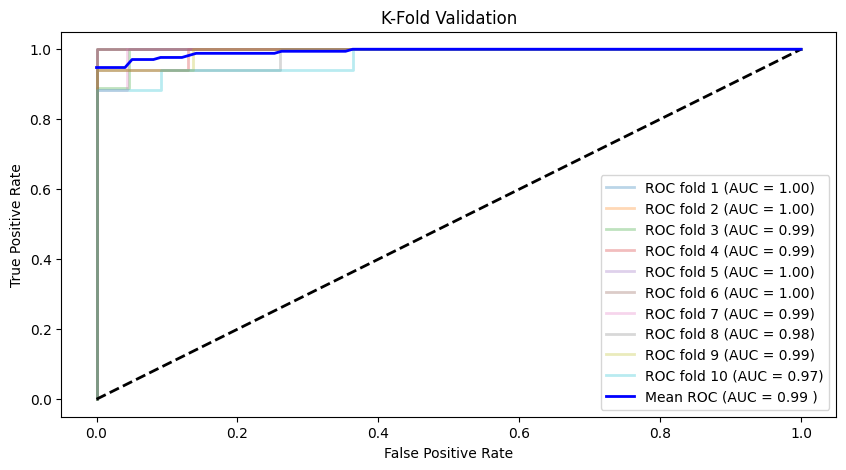


--- Threshold Selection ---
accuracy --> best threshold: 0.2
precision --> best threshold: 0.2
recall --> best threshold: 0.1
f1 --> best threshold: 0.2


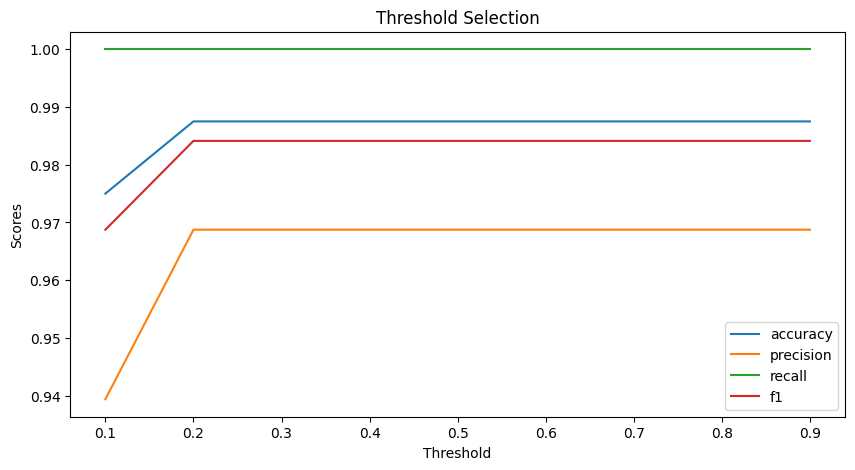

In [263]:
# this takes a while
model = tune_classif_model(X_train, y_train, model, param_dic, scoring="accuracy", 
                           searchtype="RandomSearch", n_iter=500, cv=10, figsize=(10,5))

In [264]:
X_test = dtf_test[X_names].values
y_test = dtf_test["Y"].values

In [265]:
model, predicted_prob, predicted = fit_ml_classif(model, X_train, y_train, X_test, threshold=0.2)

Accuracy (overall correct predictions): 0.96
Auc: 1.0
Recall (all 1s predicted right): 1.0
Precision (confidence when predicting a 1): 0.87
F1 score: 0.93
Detail:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       132
           1       0.87      1.00      0.93        39

    accuracy                           0.96       171
   macro avg       0.93      0.98      0.95       171
weighted avg       0.97      0.96      0.97       171



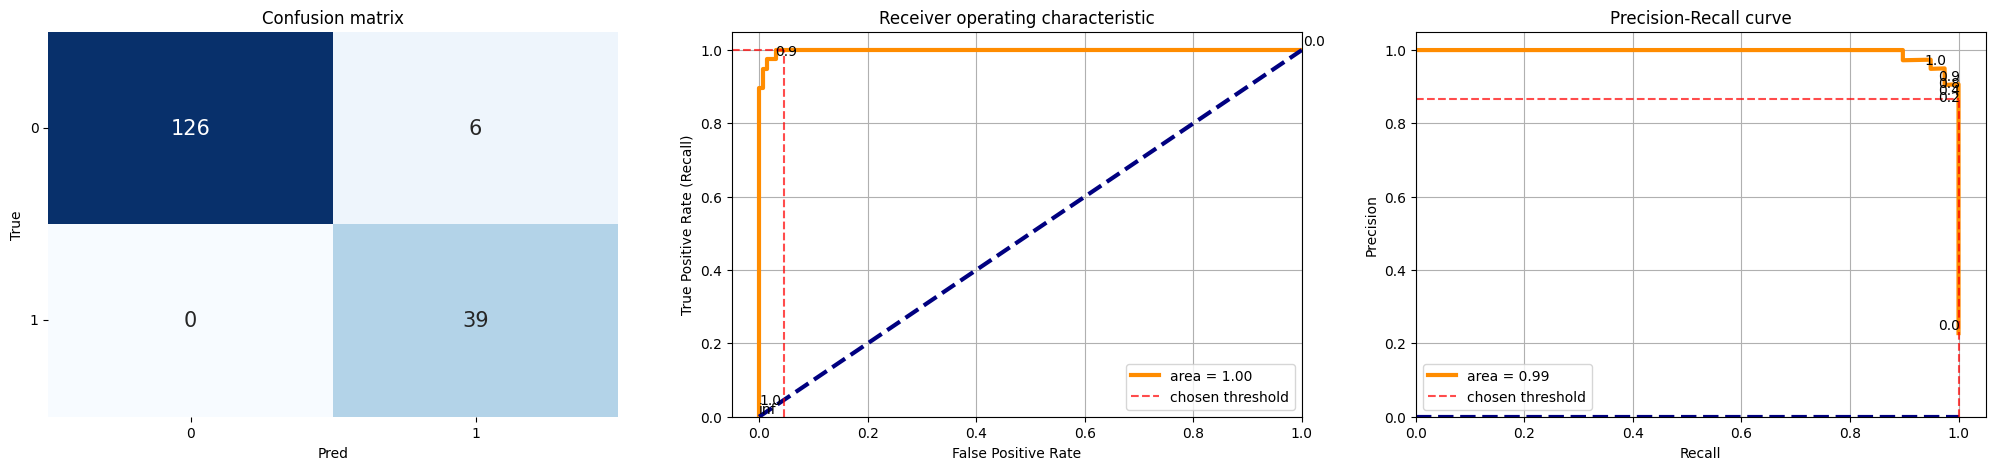

In [266]:
m1=evaluate_classif_model(y_test, predicted, predicted_prob, figsize=(25,5))

In [267]:
model2d = ensemble.GradientBoostingClassifier()
model2d.set_params(**{'subsample': 0.9, 'n_estimators': 1000, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 4, 'max_depth': 7, 'learning_rate': 0.1})

GradientBoostingClassifier(max_depth=7, max_features=4, min_samples_split=4,
                           n_estimators=1000, subsample=0.9)

--- reducing dimensions to 2 ---
--- fitting 2d model ---
--- plotting test set ---


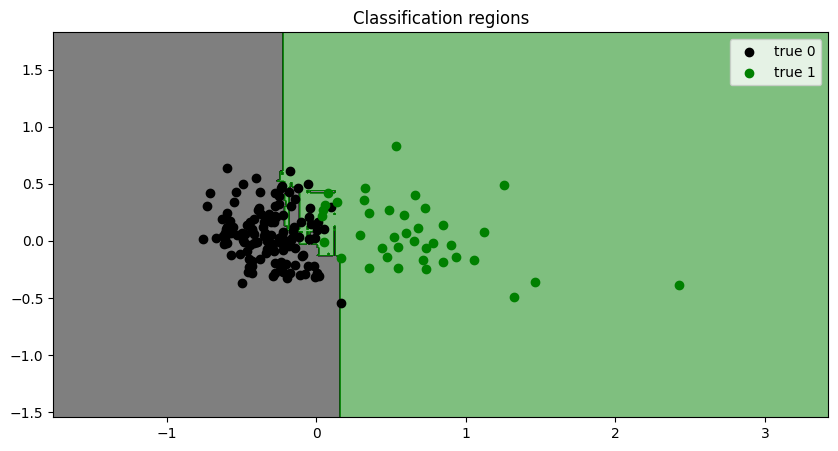

In [268]:
m1=plot2d_classif_model(X_train, y_train, X_test, y_test, model2d, annotate=False, figsize=(10,5))

Model Design

In [269]:
X_train = dtf_train[X_names].values
y_train = dtf_train["Y"].values

In [270]:
 model = LogisticRegression()

In [271]:
param_dic = {
    'penalty': ['l1', 'l2'],                    # Regularization penalty ('l1' for Lasso, 'l2' for Ridge)
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],         # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],            # Algorithm to use in the optimization problem
    'max_iter': [100, 200, 300, 400, 500,1000]       # Maximum number of iterations for the solvers to converge
}

In [272]:
def tune_classifL_model(X_train, y_train, model_base=None, param_dic=None, scoring="f1", searchtype="RandomSearch", n_iter=1000, cv=10, figsize=(10,5)):
    ## params
    model_base = LogisticRegression() if model_base is None else model_base
    param_dic = {
    'penalty': ['l1', 'l2'],                    # Regularization penalty ('l1' for Lasso, 'l2' for Ridge)
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],         # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],            # Algorithm to use in the optimization problem
    'max_iter': [100, 200, 300, 400, 500]       # Maximum number of iterations for the solvers to converge
}if param_dic is None else param_dic

    dic_scores = {'accuracy': metrics.make_scorer(metrics.accuracy_score),
                  'precision': metrics.make_scorer(metrics.precision_score),
                  'recall': metrics.make_scorer(metrics.recall_score),
                  'f1': metrics.make_scorer(metrics.f1_score)}

    ## Search
    print("---", searchtype, "---")
    if searchtype == "RandomSearch":
        random_search = model_selection.RandomizedSearchCV(model_base, param_distributions=param_dic, n_iter=n_iter, scoring=dic_scores, refit=scoring).fit(X_train, y_train)
        print("Best Model parameters:", random_search.best_params_)
        print("Best Model "+scoring+":", round(random_search.best_score_, 2))
        model = random_search.best_estimator_

    elif searchtype == "GridSearch":
        grid_search = model_selection.GridSearchCV(model_base, param_dic, scoring=dic_scores, refit=scoring).fit(X_train, y_train)
        print("Best Model parameters:", grid_search.best_params_)
        print("Best Model mean "+scoring+":", round(grid_search.best_score_, 2))
        model = grid_search.best_estimator_

    ## K fold validation
    print("")
    print("--- Kfold Validation ---")
    Kfold_base = model_selection.cross_validate(estimator=model_base, X=X_train, y=y_train, cv=cv, scoring=dic_scores)
    Kfold_model = model_selection.cross_validate(estimator=model, X=X_train, y=y_train, cv=cv, scoring=dic_scores)
    for score in dic_scores.keys():
        print(score, "mean - base model:", round(Kfold_base["test_"+score].mean(), 2), " --> best model:", round(Kfold_model["test_"+score].mean()))
    utils_kfold_roc(model, X_train, y_train, cv=cv, figsize=figsize)  # Not implemented in the provided code

    ## Threshold analysis
    print("")
    print("--- Threshold Selection ---")
    utils_threshold_selection(model, X_train, y_train, figsize=figsize)  # Not implemented in the provided code

    return model


--- RandomSearch ---
Best Model parameters: {'solver': 'saga', 'penalty': 'l1', 'max_iter': 200, 'C': 1.0}
Best Model accuracy: 0.97

--- Kfold Validation ---
accuracy mean - base model: 0.96  --> best model: 1
precision mean - base model: 0.98  --> best model: 1
recall mean - base model: 0.94  --> best model: 1
f1 mean - base model: 0.95  --> best model: 1


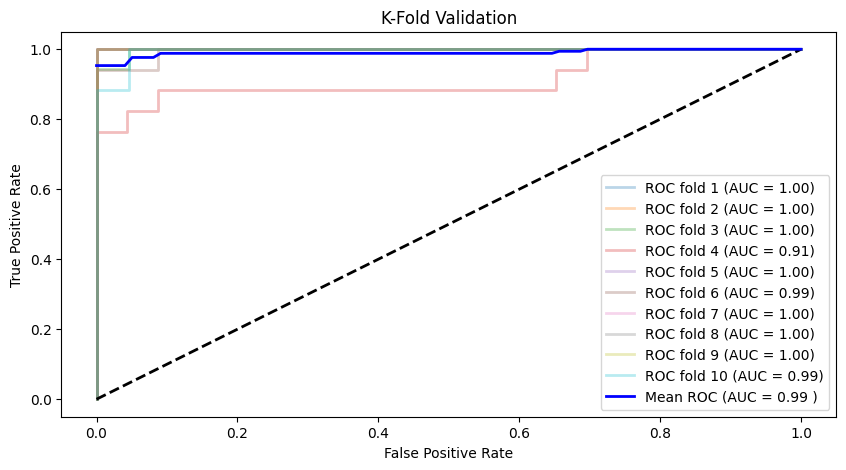


--- Threshold Selection ---
accuracy --> best threshold: 0.4
precision --> best threshold: 0.7
recall --> best threshold: 0.1
f1 --> best threshold: 0.4


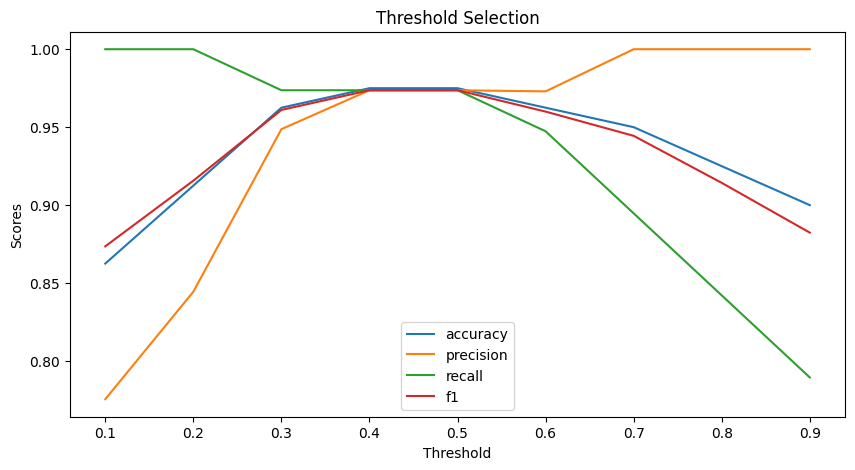

In [273]:
# this takes a while
model = tune_classifL_model(X_train, y_train, model, param_dic, scoring="accuracy", 
                           searchtype="RandomSearch", n_iter=1000, cv=10, figsize=(10,5))

--- GridSearch ---
Best Model parameters: {'C': 1.0, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
Best Model mean accuracy: 0.97

--- Kfold Validation ---
accuracy mean - base model: 0.97  --> best model: 1
precision mean - base model: 0.98  --> best model: 1
recall mean - base model: 0.96  --> best model: 1
f1 mean - base model: 0.97  --> best model: 1


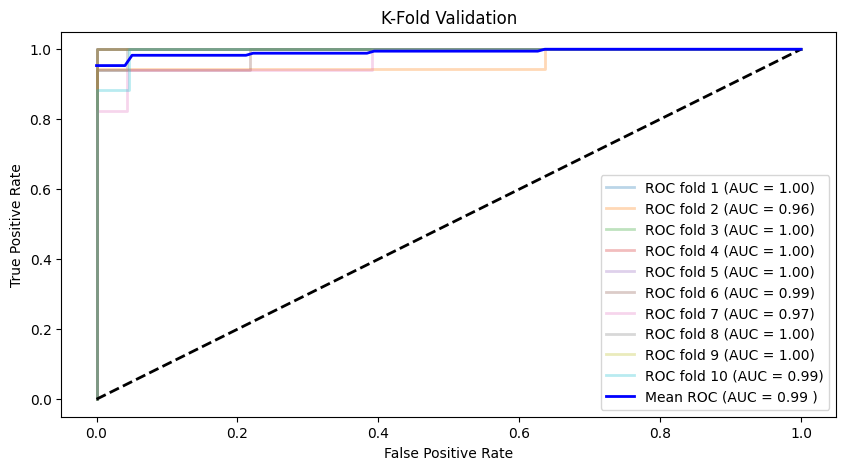


--- Threshold Selection ---
accuracy --> best threshold: 0.4
precision --> best threshold: 0.4
recall --> best threshold: 0.1
f1 --> best threshold: 0.4


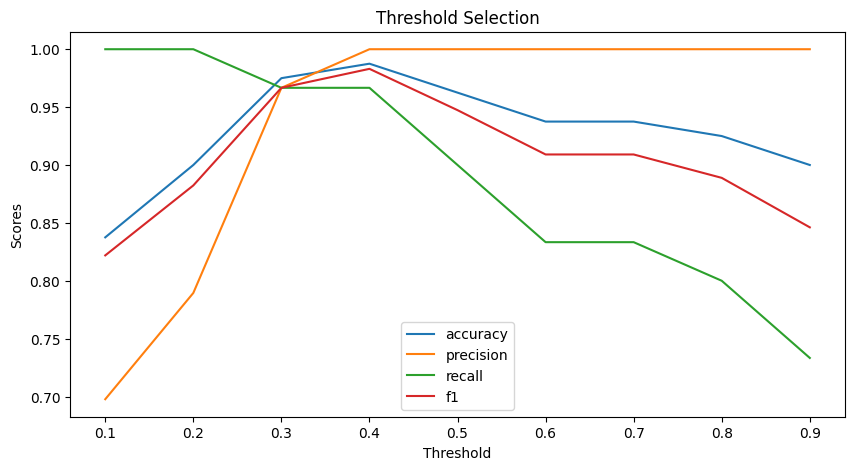

In [97]:
# this takes a while
model = tune_classifL_model(X_train, y_train, model, param_dic, scoring="accuracy", 
                           searchtype="GridSearch", n_iter=1000, cv=10, figsize=(10,5))

In [274]:
X_test = dtf_test[X_names].values
y_test = dtf_test["Y"].values

In [275]:

from sklearn.linear_model import LogisticRegression
def fit_ml1_classif(model, X_train, y_train, X_test, threshold=0.5):
    ## model
    model = LogisticRegression() if model is None else model
    
    ## train/test
    model.fit(X_train, y_train)
    predicted_prob = model.predict_proba(X_test)[:,1]
    predicted = (predicted_prob > threshold)
    return model, predicted_prob, predicted 

In [276]:
model, predicted_prob, predicted = fit_ml1_classif(model, X_train, y_train, X_test, threshold=0.4)

Accuracy (overall correct predictions): 0.95
Auc: 1.0
Recall (all 1s predicted right): 1.0
Precision (confidence when predicting a 1): 0.83
F1 score: 0.91
Detail:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       132
           1       0.83      1.00      0.91        39

    accuracy                           0.95       171
   macro avg       0.91      0.97      0.94       171
weighted avg       0.96      0.95      0.95       171



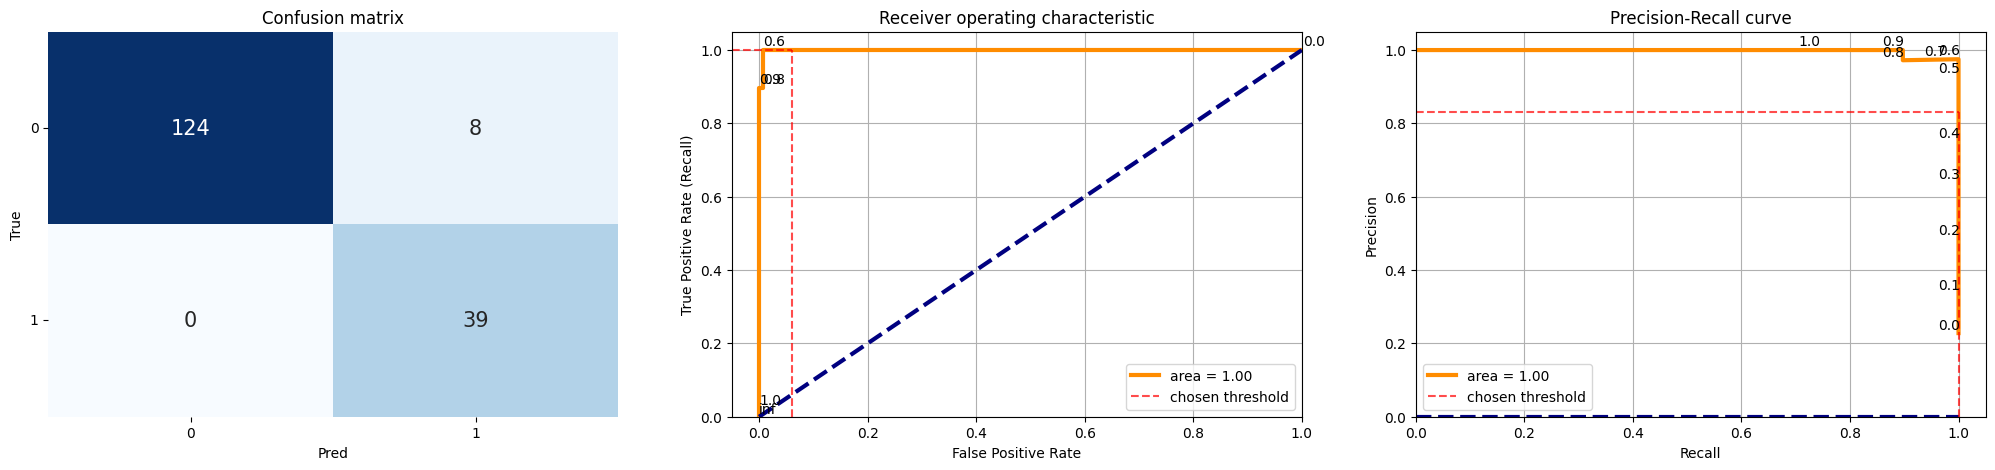

In [277]:
m2=evaluate_classif_model(y_test, predicted, predicted_prob, figsize=(25,5))

In [278]:
model2d = LogisticRegression()
model2d.set_params(**{'solver': 'saga', 'penalty': 'l1', 'max_iter': 200, 'C': 1.0})


LogisticRegression(max_iter=200, penalty='l1', solver='saga')

--- reducing dimensions to 2 ---
--- fitting 2d model ---
--- plotting test set ---


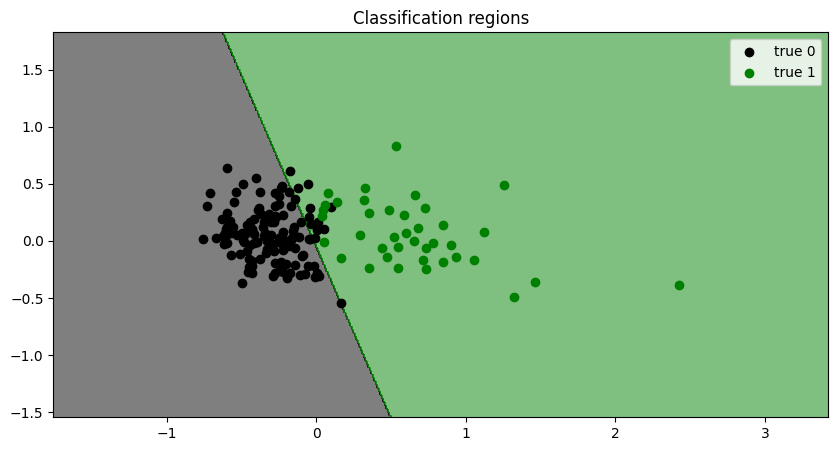

In [279]:
m2=plot2d_classif_model(X_train, y_train, X_test, y_test, model2d, annotate=False, figsize=(10,5))

Model Design¶Decision Trees

Model build up

In [280]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()


In [281]:
param_dic = {
    'max_depth': [None, 10, 20, 30, 40, 50],              # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                        # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None],       # Number of features to consider when looking for the best split
    'criterion': ['gini', 'entropy'],                     # Function to measure the quality of a split
    'splitter': ['best', 'random'],                       # Strategy used to choose the split at each node
    'max_leaf_nodes': [None, 10, 20, 30],                 # Grow a tree with max_leaf_nodes in best-first fashion
    'min_impurity_decrease': [0.0, 0.1, 0.2],             # A node will be split if this split induces a decrease of the impurity greater than or equal to this value
}


In [282]:
from sklearn.tree import DecisionTreeClassifier

def tune_decision_tree_model(X_train, y_train, model_base=None, param_dic=None, scoring="f1", searchtype="RandomSearch", n_iter=1000, cv=10, figsize=(10,5)):
    ## params
    model_base = DecisionTreeClassifier() if model_base is None else model_base
    param_dic = {
        'max_depth': [None, 10, 20, 30, 40, 50],              # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],                      # Minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 4],                        # Minimum number of samples required to be at a leaf node
        'max_features': ['auto', 'sqrt', 'log2', None],       # Number of features to consider when looking for the best split
        'criterion': ['gini', 'entropy'],                     # Function to measure the quality of a split
    } if param_dic is None else param_dic

    dic_scores = {
        'accuracy': metrics.make_scorer(metrics.accuracy_score),
        'precision': metrics.make_scorer(metrics.precision_score),
        'recall': metrics.make_scorer(metrics.recall_score),
        'f1': metrics.make_scorer(metrics.f1_score)
    }

    ## Search
    print("---", searchtype, "---")
    if searchtype == "RandomSearch":
        random_search = model_selection.RandomizedSearchCV(model_base, param_distributions=param_dic, n_iter=n_iter, scoring=dic_scores, refit=scoring).fit(X_train, y_train)
        print("Best Model parameters:", random_search.best_params_)
        print("Best Model "+scoring+":", round(random_search.best_score_, 2))
        model = random_search.best_estimator_

    elif searchtype == "GridSearch":
        grid_search = model_selection.GridSearchCV(model_base, param_dic, scoring=dic_scores, refit=scoring).fit(X_train, y_train)
        print("Best Model parameters:", grid_search.best_params_)
        print("Best Model mean "+scoring+":", round(grid_search.best_score_, 2))
        model = grid_search.best_estimator_

    ## K fold validation
    print("")
    print("--- Kfold Validation ---")
    Kfold_base = model_selection.cross_validate(estimator=model_base, X=X_train, y=y_train, cv=cv, scoring=dic_scores)
    Kfold_model = model_selection.cross_validate(estimator=model, X=X_train, y=y_train, cv=cv, scoring=dic_scores)
    for score in dic_scores.keys():
        print(score, "mean - base model:", round(Kfold_base["test_"+score].mean(), 2), " --> best model:", round(Kfold_model["test_"+score].mean()))
    utils_kfold_roc(model, X_train, y_train, cv=cv, figsize=figsize)  # Not implemented in the provided code

    ## Threshold analysis
    print("")
    print("--- Threshold Selection ---")
    utils_threshold_selection(model, X_train, y_train, figsize=figsize)  # Not implemented in the provided code

    return model



--- RandomSearch ---
Best Model parameters: {'splitter': 'random', 'min_samples_split': 5, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 30, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}
Best Model accuracy: 0.95

--- Kfold Validation ---
accuracy mean - base model: 0.92  --> best model: 1
precision mean - base model: 0.9  --> best model: 1
recall mean - base model: 0.94  --> best model: 1
f1 mean - base model: 0.91  --> best model: 1


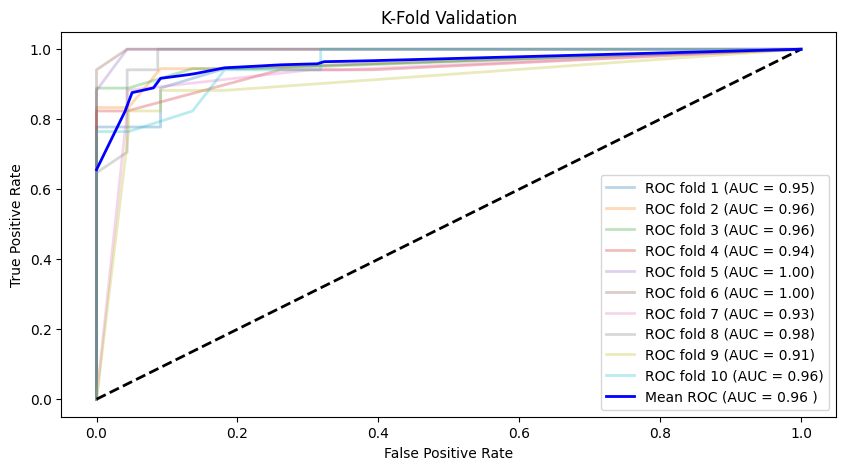


--- Threshold Selection ---
accuracy --> best threshold: 0.5
precision --> best threshold: 0.8
recall --> best threshold: 0.1
f1 --> best threshold: 0.5


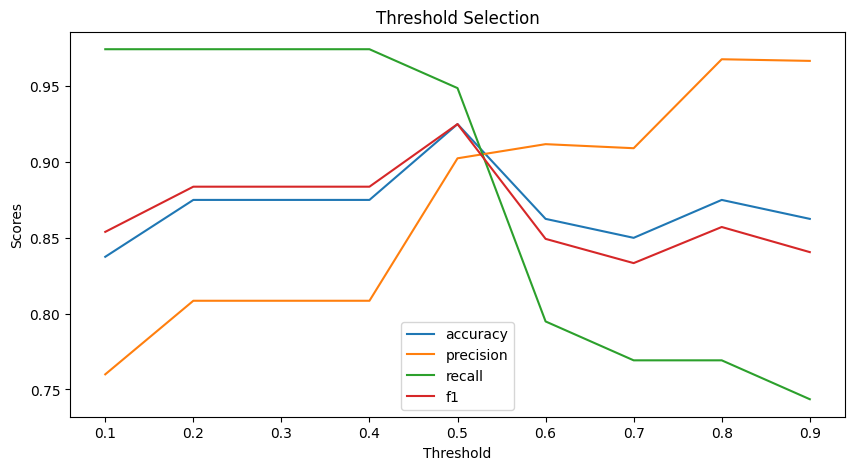

In [283]:
# this takes a while
model = tune_decision_tree_model(X_train, y_train, model_base=model, param_dic=param_dic, scoring="accuracy", 
                                 searchtype="RandomSearch", n_iter=1000, cv=10, figsize=(10,5))

--- GridSearch ---
Best Model parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best Model mean accuracy: 0.96

--- Kfold Validation ---
accuracy mean - base model: 0.91  --> best model: 1
precision mean - base model: 0.9  --> best model: 1
recall mean - base model: 0.91  --> best model: 1
f1 mean - base model: 0.9  --> best model: 1


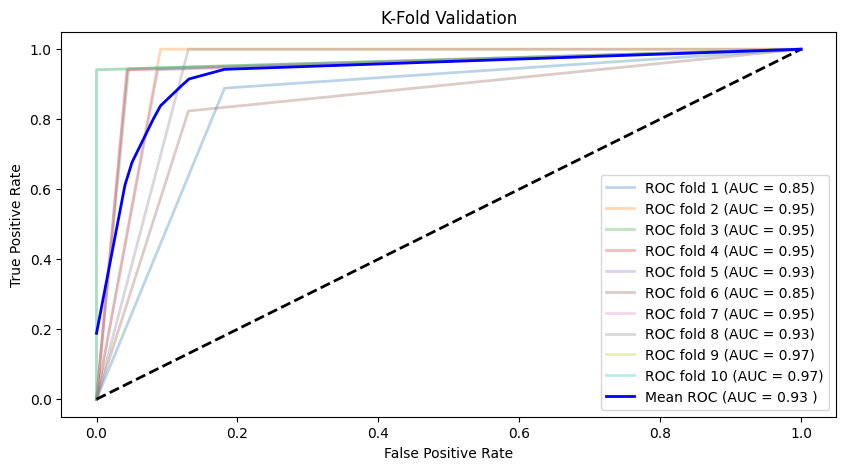


--- Threshold Selection ---
accuracy --> best threshold: 0.1
precision --> best threshold: 0.1
recall --> best threshold: 0.1
f1 --> best threshold: 0.1


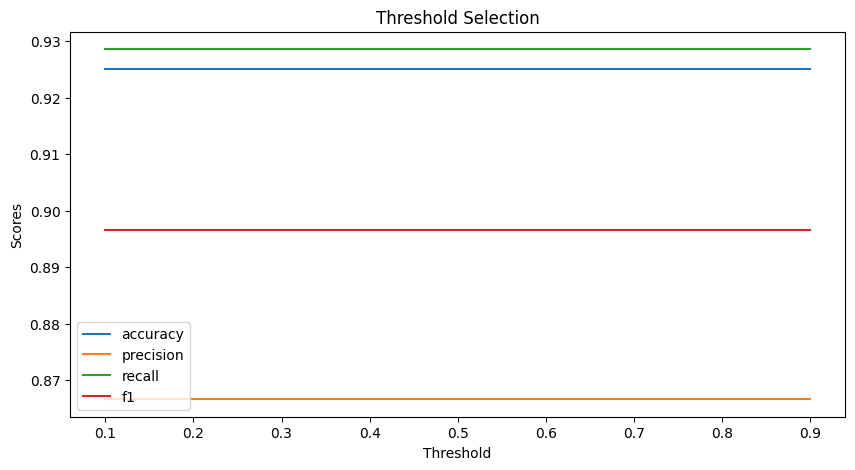

In [108]:
# this takes a while
model = tune_decision_tree_model(X_train, y_train, model_base=model, param_dic=param_dic, scoring="accuracy", 
                                 searchtype="GridSearch", n_iter=1000, cv=10, figsize=(10,5))


In [284]:
from sklearn.tree import DecisionTreeClassifier

def fit_ml2_classif(model, X_train, y_train, X_test, threshold=0.5):
    ## model
    model = DecisionTreeClassifier() if model is None else model
    
    ## train/test
    model.fit(X_train, y_train)
    predicted_prob = model.predict_proba(X_test)[:,1]
    predicted = (predicted_prob > threshold)
    return model, predicted_prob, predicted


In [285]:
model, predicted_prob, predicted = fit_ml2_classif(model, X_train, y_train, X_test, threshold=0.6)

Accuracy (overall correct predictions): 0.95
Auc: 0.97
Recall (all 1s predicted right): 0.92
Precision (confidence when predicting a 1): 0.88
F1 score: 0.9
Detail:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       132
           1       0.88      0.92      0.90        39

    accuracy                           0.95       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.95      0.95      0.95       171



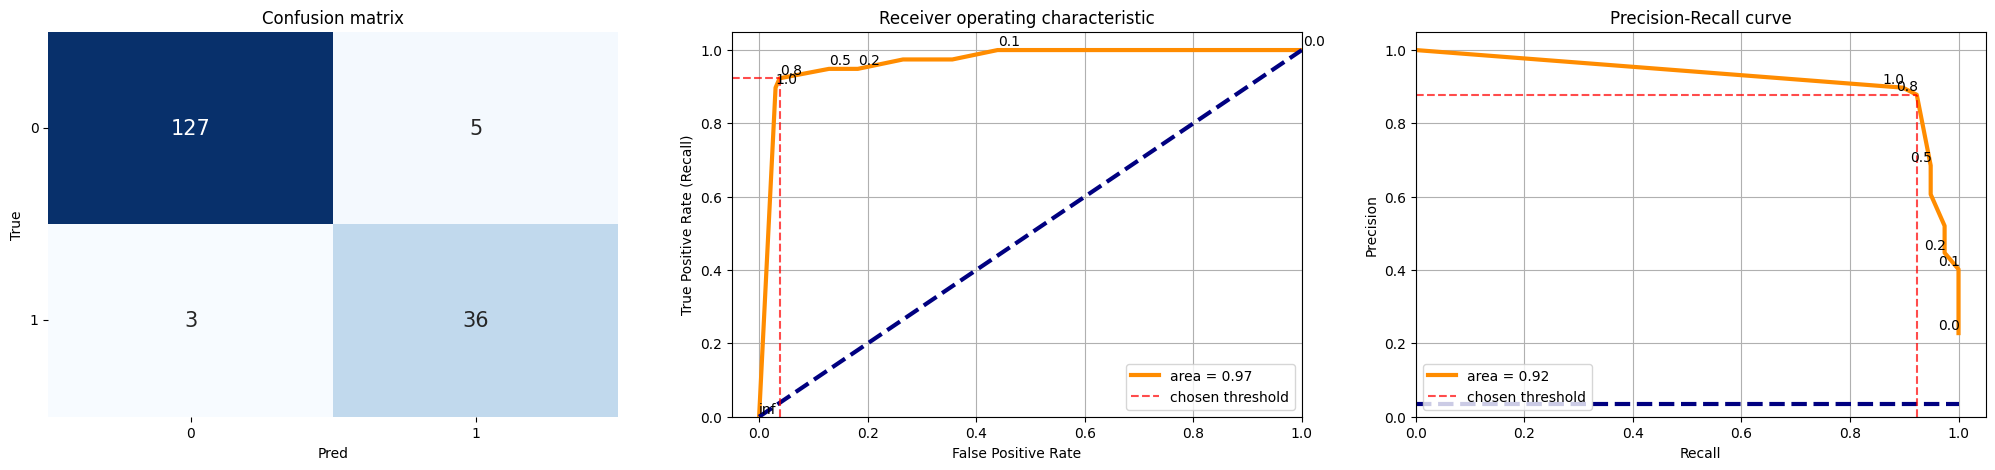

In [286]:
m3=evaluate_classif_model(y_test, predicted, predicted_prob, figsize=(25,5))

In [287]:

model2d = DecisionTreeClassifier()
model2d.set_params(**{'splitter': 'random', 'min_samples_split': 5, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 30, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'})


DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=30, min_samples_leaf=4,
                       min_samples_split=5, splitter='random')

--- reducing dimensions to 2 ---
--- fitting 2d model ---
--- plotting test set ---


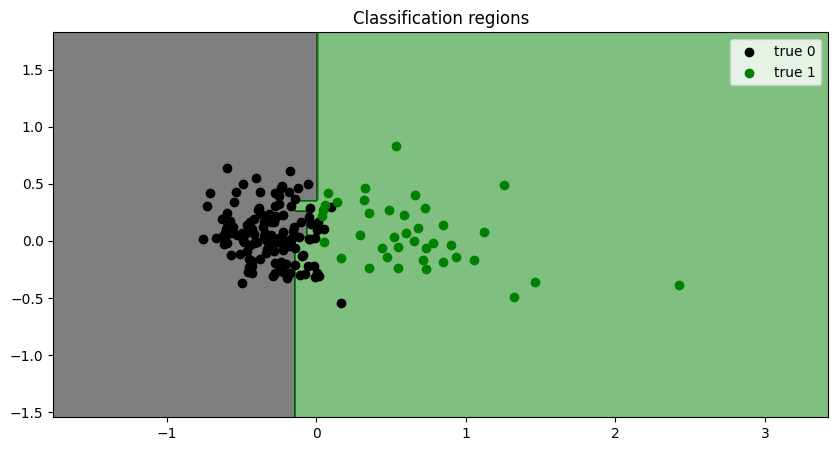

In [288]:
m3=plot2d_classif_model(X_train, y_train, X_test, y_test, model2d, annotate=False, figsize=(10,5))

Model# RF

In [289]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
model = RandomForestClassifier()

In [290]:
param_dic = {
    'n_estimators': [100, 200, 300, 400, 500],              # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],                # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                          # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],               # Number of features to consider when looking for the best split
    'criterion': ['gini', 'entropy'],                       # Function to measure the quality of a split
}

--- RandomSearch ---
Best Model parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy'}
Best Model accuracy: 0.97

--- Kfold Validation ---
accuracy mean - base model: 0.96  --> best model: 1
precision mean - base model: 0.95  --> best model: 1
recall mean - base model: 0.95  --> best model: 1
f1 mean - base model: 0.95  --> best model: 1


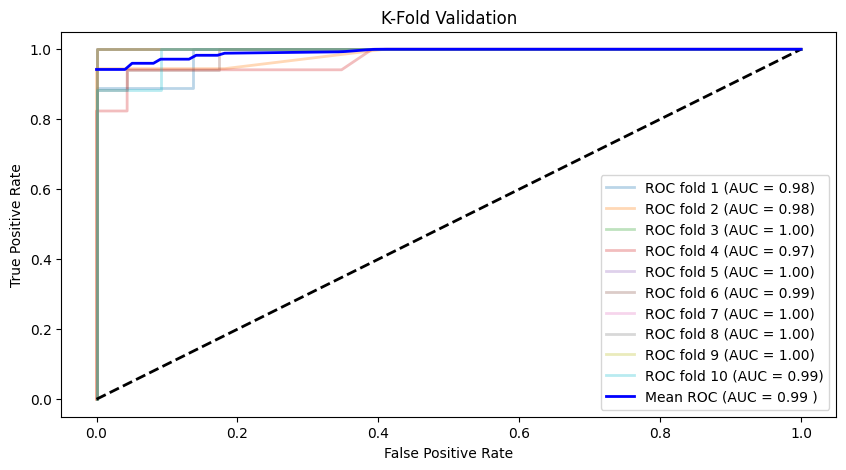


--- Threshold Selection ---
accuracy --> best threshold: 0.6
precision --> best threshold: 0.8
recall --> best threshold: 0.1
f1 --> best threshold: 0.6


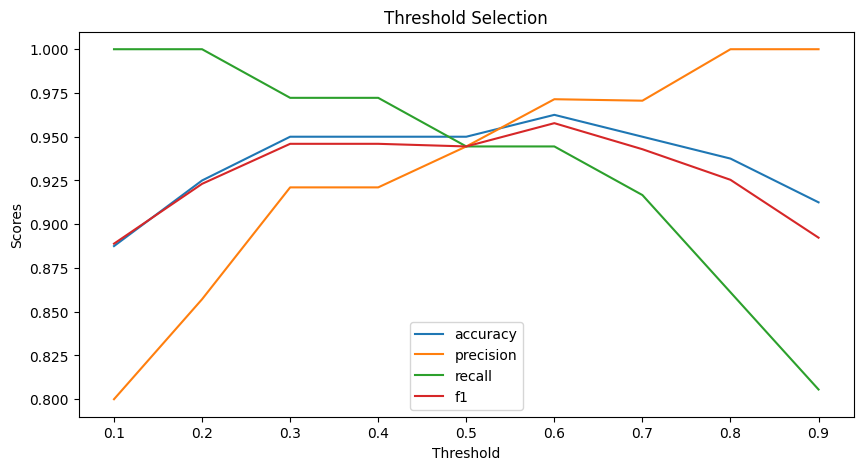

In [291]:
from sklearn.ensemble import RandomForestClassifier

def tune_random_forest_model(X_train, y_train, model_base=None, param_dic=None, scoring="f1", searchtype="RandomSearch", n_iter=1000, cv=10, figsize=(10,5)):
    ## params
    model_base = RandomForestClassifier() if model_base is None else model_base
    param_dic = {
    'n_estimators': [100, 200, 300, 400, 500],              # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],                # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                          # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],               # Number of features to consider when looking for the best split
    'criterion': ['gini', 'entropy'],                       # Function to measure the quality of a split
} if param_dic is None else param_dic

    dic_scores = {
        'accuracy': metrics.make_scorer(metrics.accuracy_score),
        'precision': metrics.make_scorer(metrics.precision_score),
        'recall': metrics.make_scorer(metrics.recall_score),
        'f1': metrics.make_scorer(metrics.f1_score)
    }

    ## Search
    print("---", searchtype, "---")
    if searchtype == "RandomSearch":
        random_search = model_selection.RandomizedSearchCV(model_base, param_distributions=param_dic, n_iter=n_iter, scoring=dic_scores, refit=scoring).fit(X_train, y_train)
        print("Best Model parameters:", random_search.best_params_)
        print("Best Model "+scoring+":", round(random_search.best_score_, 2))
        model = random_search.best_estimator_

    elif searchtype == "GridSearch":
        grid_search = model_selection.GridSearchCV(model_base, param_dic, scoring=dic_scores, refit=scoring).fit(X_train, y_train)
        print("Best Model parameters:", grid_search.best_params_)
        print("Best Model mean "+scoring+":", round(grid_search.best_score_, 2))
        model = grid_search.best_estimator_

    ## K fold validation
    print("")
    print("--- Kfold Validation ---")
    Kfold_base = model_selection.cross_validate(estimator=model_base, X=X_train, y=y_train, cv=cv, scoring=dic_scores)
    Kfold_model = model_selection.cross_validate(estimator=model, X=X_train, y=y_train, cv=cv, scoring=dic_scores)
    for score in dic_scores.keys():
        print(score, "mean - base model:", round(Kfold_base["test_"+score].mean(), 2), " --> best model:", round(Kfold_model["test_"+score].mean()))
    utils_kfold_roc(model, X_train, y_train, cv=cv, figsize=figsize)  # Not implemented in the provided code

    ## Threshold analysis
    print("")
    print("--- Threshold Selection ---")
    utils_threshold_selection(model, X_train, y_train, figsize=figsize)  # Not implemented in the provided code

    return model


# this takes a while
model = tune_random_forest_model(X_train, y_train, model_base=model, param_dic=param_dic, scoring="accuracy", 
                                 searchtype="RandomSearch", n_iter=1000, cv=10, figsize=(10,5))

--- GridSearch ---
Best Model parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Model mean accuracy: 0.97

--- Kfold Validation ---
accuracy mean - base model: 0.96  --> best model: 1
precision mean - base model: 0.97  --> best model: 1
recall mean - base model: 0.94  --> best model: 1
f1 mean - base model: 0.95  --> best model: 1


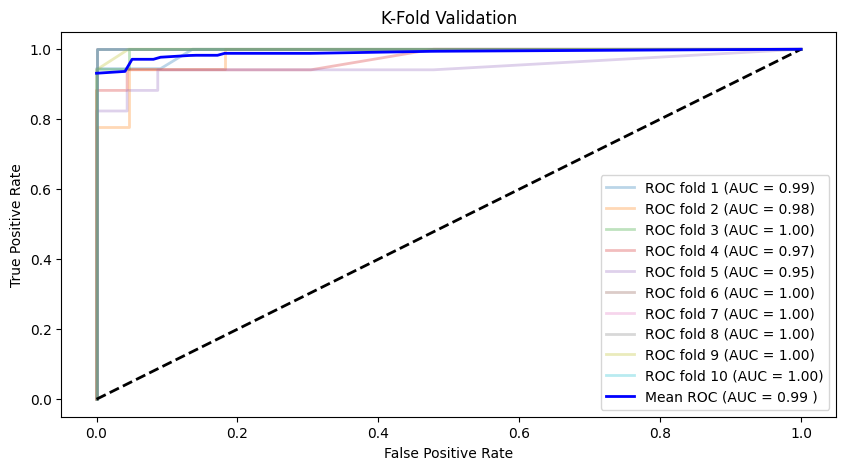


--- Threshold Selection ---
accuracy --> best threshold: 0.8
precision --> best threshold: 0.8
recall --> best threshold: 0.1
f1 --> best threshold: 0.8


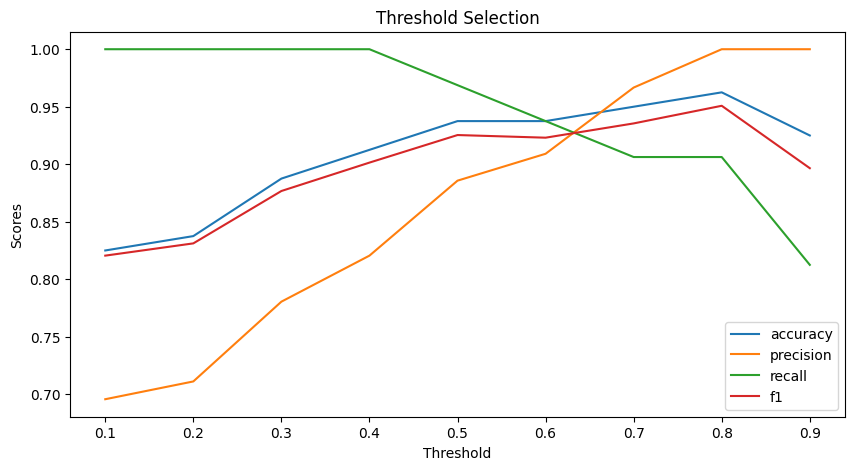

In [71]:
# this takes a while
model = tune_random_forest_model(X_train, y_train, model_base=model, param_dic=param_dic, scoring="accuracy", 
                                 searchtype="GridSearch", n_iter=1000, cv=10, figsize=(10,5))

In [292]:
X_test = dtf_test[X_names].values
y_test = dtf_test["Y"].values

In [293]:
from sklearn.ensemble import RandomForestClassifier

def fit_ml3_classif(model, X_train, y_train, X_test, threshold=0.5):
    ## model
    model = RandomForestClassifier() if model is None else model
    
    ## train/test
    model.fit(X_train, y_train)
    predicted_prob = model.predict_proba(X_test)[:,1]
    predicted = (predicted_prob > threshold)
    return model, predicted_prob, predicted


In [294]:
model, predicted_prob, predicted = fit_ml3_classif(model, X_train, y_train, X_test, threshold=0.6)

Accuracy (overall correct predictions): 0.98
Auc: 1.0
Recall (all 1s predicted right): 1.0
Precision (confidence when predicting a 1): 0.91
F1 score: 0.95
Detail:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       132
           1       0.91      1.00      0.95        39

    accuracy                           0.98       171
   macro avg       0.95      0.98      0.97       171
weighted avg       0.98      0.98      0.98       171



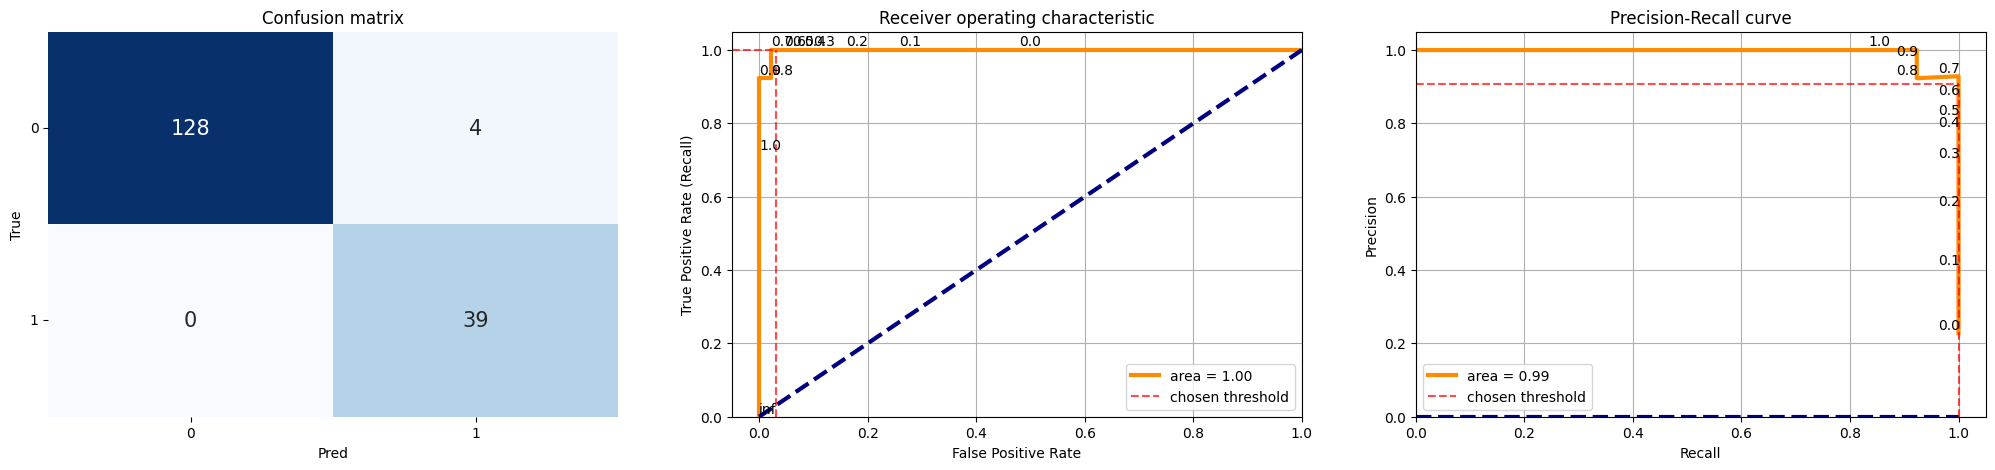

In [295]:
m4=evaluate_classif_model(y_test, predicted, predicted_prob, figsize=(25,5))

In [296]:
from sklearn.ensemble import RandomForestClassifier

model2d = RandomForestClassifier()
model2d.set_params(**{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy'})

RandomForestClassifier(criterion='entropy', max_depth=20)

--- reducing dimensions to 2 ---
--- fitting 2d model ---
--- plotting test set ---


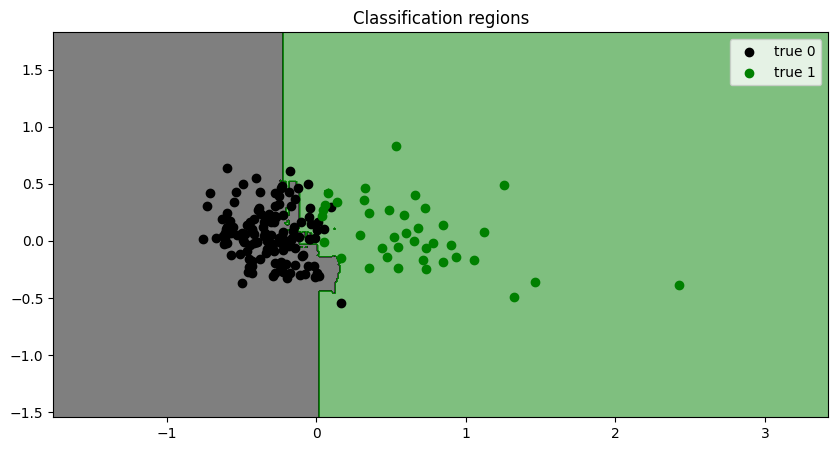

In [297]:
m4=plot2d_classif_model(X_train, y_train, X_test, y_test, model2d, annotate=False, figsize=(10,5))

Model#

In [298]:
from sklearn.svm import SVC

# Initialize the SVM classifier
model = SVC()


In [299]:
param_dic = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],                # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],    # Kernel type
    'gamma': ['scale', 'auto'],                        # Kernel coefficient
    'degree': [2, 3, 4],                               # Degree of the polynomial kernel function
    'coef0': [0.0, 1.0],                               # Independent term in kernel function
}

In [300]:
from sklearn import metrics, model_selection
import matplotlib.pyplot as plt

def tune_svm_model(X_train, y_train, model_base=None, param_dic=None, scoring="f1", searchtype="RandomSearch", n_iter=1000, cv=10, figsize=(10,5)):
    ## params
    model_base = SVC(probability=True) if model_base is None else model_base
    param_dic = {
        'C': [0.001, 0.01, 0.1, 1.0, 10.0],                # Regularization parameter
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],    # Kernel type
        'gamma': ['scale', 'auto'],                        # Kernel coefficient
        'degree': [2, 3, 4],                               # Degree of the polynomial kernel function
        'coef0': [0.0, 1.0],                               # Independent term in kernel function
    } if param_dic is None else param_dic

    dic_scores = {
        'accuracy': metrics.make_scorer(metrics.accuracy_score),
        'precision': metrics.make_scorer(metrics.precision_score),
        'recall': metrics.make_scorer(metrics.recall_score),
        'f1': metrics.make_scorer(metrics.f1_score)
    }

    ## Search
    print("---", searchtype, "---")
    if searchtype == "RandomSearch":
        random_search = model_selection.RandomizedSearchCV(model_base, param_distributions=param_dic, n_iter=n_iter, scoring=dic_scores[scoring], refit=scoring).fit(X_train, y_train)
        print("Best Model parameters:", random_search.best_params_)
        print("Best Model "+scoring+":", round(random_search.best_score_, 2))
        model = random_search.best_estimator_

    elif searchtype == "GridSearch":
        grid_search = model_selection.GridSearchCV(model_base, param_dic, scoring=dic_scores[scoring], refit=scoring).fit(X_train, y_train)
        print("Best Model parameters:", grid_search.best_params_)
        print("Best Model mean "+scoring+":", round(grid_search.best_score_, 2))
        model = grid_search.best_estimator_

     ## K fold validation
    print("")
    print("--- Kfold Validation ---")
    Kfold_base = model_selection.cross_validate(estimator=model_base, X=X_train, y=y_train, cv=cv, scoring=dic_scores)
    Kfold_model = model_selection.cross_validate(estimator=model, X=X_train, y=y_train, cv=cv, scoring=dic_scores)
    for score in dic_scores.keys():
        print(score, "mean - base model:", round(Kfold_base["test_"+score].mean(), 2), " --> best model:", round(Kfold_model["test_"+score].mean()))
    utils_kfold_roc(model, X_train, y_train, cv=cv, figsize=figsize)  # Not implemented in the provided code

    ## Threshold analysis
    print("")
    print("--- Threshold Selection ---")
    utils_threshold_selection(model, X_train, y_train, figsize=figsize)  # Not implemented in the provided code
    return model


--- RandomSearch ---
Best Model parameters: {'kernel': 'poly', 'gamma': 'scale', 'degree': 3, 'coef0': 1.0, 'C': 0.1}
Best Model accuracy: 0.97

--- Kfold Validation ---
accuracy mean - base model: 0.97  --> best model: 1
precision mean - base model: 0.98  --> best model: 1
recall mean - base model: 0.96  --> best model: 1
f1 mean - base model: 0.97  --> best model: 1


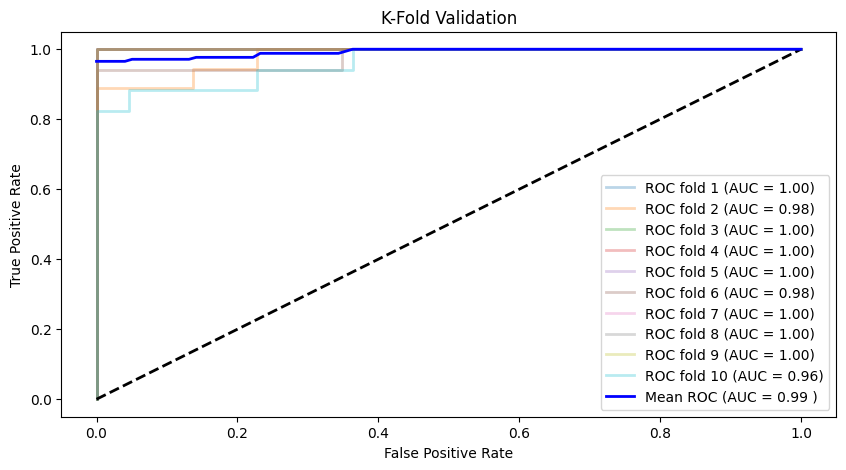


--- Threshold Selection ---
accuracy --> best threshold: 0.5
precision --> best threshold: 0.5
recall --> best threshold: 0.1
f1 --> best threshold: 0.5


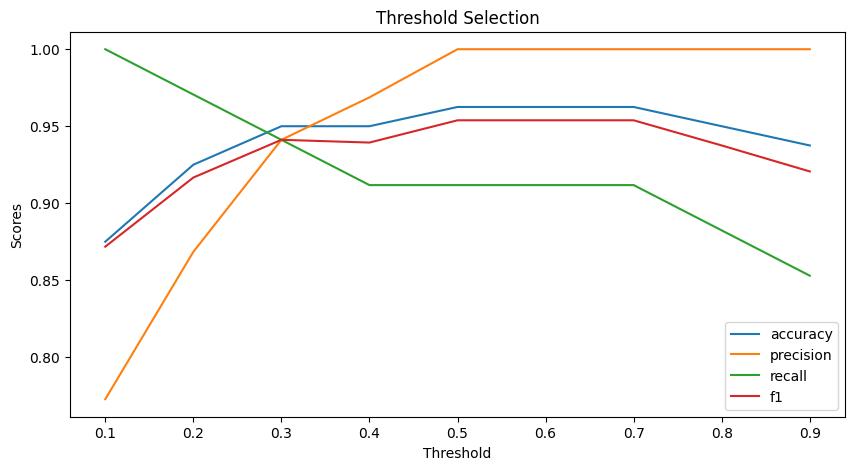

In [301]:
# this takes a while
model = tune_svm_model(X_train, y_train, model_base=None, param_dic=param_dic, scoring="accuracy", 
                        searchtype="RandomSearch", n_iter=1000, cv=10, figsize=(10,5))


--- GridSearch ---
Best Model parameters: {'C': 10.0, 'coef0': 0.0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Best Model mean accuracy: 0.96

--- Kfold Validation ---
accuracy mean - base model: 0.96  --> best model: 1
precision mean - base model: 0.97  --> best model: 1
recall mean - base model: 0.95  --> best model: 1
f1 mean - base model: 0.96  --> best model: 1


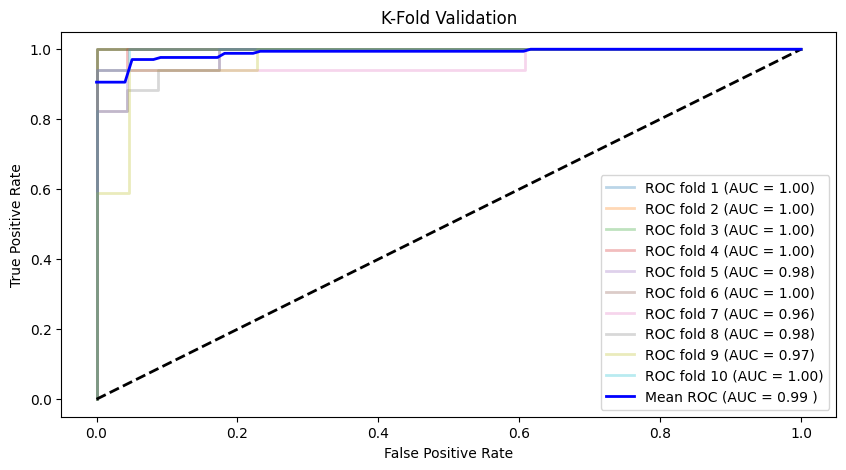


--- Threshold Selection ---
accuracy --> best threshold: 0.4
precision --> best threshold: 0.7
recall --> best threshold: 0.1
f1 --> best threshold: 0.4


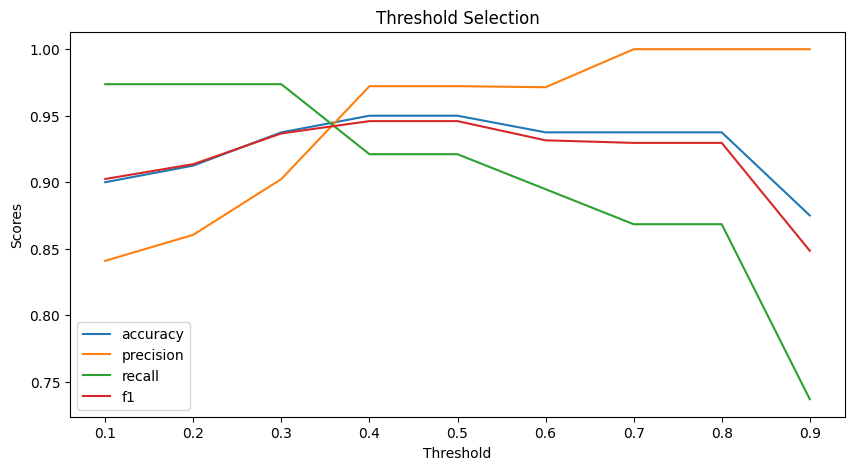

In [93]:
# this takes a while
model = tune_svm_model(X_train, y_train, model_base=None, param_dic=param_dic, scoring="accuracy", 
                        searchtype="GridSearch", n_iter=1000, cv=10, figsize=(10,5))


In [302]:
X_test = dtf_test[X_names].values
y_test = dtf_test["Y"].values

In [303]:
from sklearn.svm import SVC

def fit_ml4_classif(model, X_train, y_train, X_test, threshold=0.5):
    ## model
    model = SVC() if model is None else model
    
    ## train/test
    model.fit(X_train, y_train)
    predicted_prob = model.predict_proba(X_test)[:,1]
    predicted = (predicted_prob > threshold)
    return model, predicted_prob, predicted


In [305]:
model, predicted_prob, predicted = fit_ml4_classif(model, X_train, y_train, X_test, threshold=0.5)

Accuracy (overall correct predictions): 0.99
Auc: 1.0
Recall (all 1s predicted right): 1.0
Precision (confidence when predicting a 1): 0.95
F1 score: 0.98
Detail:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       132
           1       0.95      1.00      0.97        39

    accuracy                           0.99       171
   macro avg       0.98      0.99      0.98       171
weighted avg       0.99      0.99      0.99       171



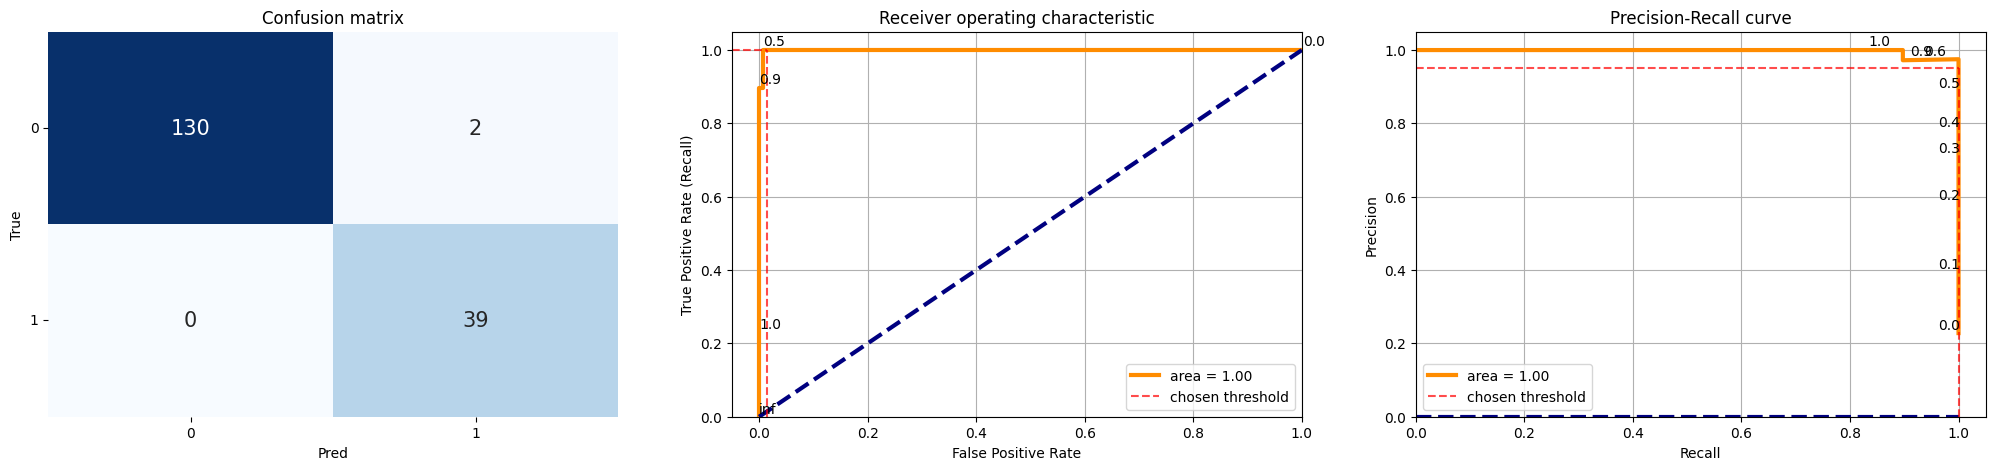

In [306]:
m5=evaluate_classif_model(y_test, predicted, predicted_prob, figsize=(25,5))

In [307]:
from sklearn.ensemble import RandomForestClassifier

model2d = SVC()
model2d.set_params(**{'kernel': 'poly', 'gamma': 'scale', 'degree': 3, 'coef0': 1.0, 'C': 0.1})

SVC(C=0.1, coef0=1.0, kernel='poly')

--- reducing dimensions to 2 ---
--- fitting 2d model ---
--- plotting test set ---


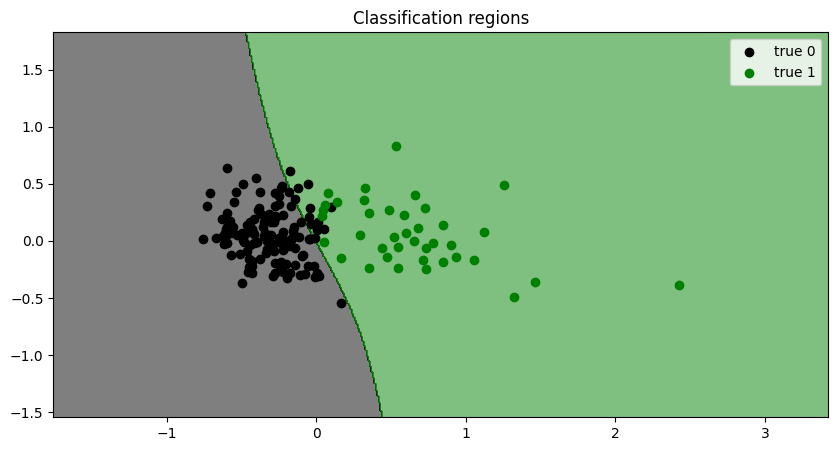

In [308]:
m5=plot2d_classif_model(X_train, y_train, X_test, y_test, model2d, annotate=False, figsize=(10,5))

Model#K-nerest

In [309]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the k-NN classifier
model = KNeighborsClassifier()

In [310]:
param_dic = {
    'n_neighbors': [3, 5, 7, 9],            # Number of neighbors to use
    'weights': ['uniform', 'distance'],     # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute nearest neighbors
    'leaf_size': [20, 30, 40],              # Leaf size passed to BallTree or KDTree
}

In [311]:
from sklearn import metrics, model_selection
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def tune_knn_model(X_train, y_train, model_base=None, param_dic=None, scoring="f1", searchtype="RandomSearch", n_iter=1000, cv=10, figsize=(10,5)):
    ## params
    model_base = KNeighborsClassifier() if model_base is None else model_base
    param_dic = {
        'n_neighbors': [3, 5, 7, 9],            # Number of neighbors to use
        'weights': ['uniform', 'distance'],     # Weight function used in prediction
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute nearest neighbors
        'leaf_size': [20, 30, 40],              # Leaf size passed to BallTree or KDTree
    } if param_dic is None else param_dic

    dic_scores = {
        'accuracy': metrics.make_scorer(metrics.accuracy_score),
        'precision': metrics.make_scorer(metrics.precision_score),
        'recall': metrics.make_scorer(metrics.recall_score),
        'f1': metrics.make_scorer(metrics.f1_score)
    }

    ## Search
    print("---", searchtype, "---")
    if searchtype == "RandomSearch":
        random_search = model_selection.RandomizedSearchCV(model_base, param_distributions=param_dic, n_iter=n_iter, scoring=dic_scores[scoring], refit=scoring).fit(X_train, y_train)
        print("Best Model parameters:", random_search.best_params_)
        print("Best Model "+scoring+":", round(random_search.best_score_, 2))
        model = random_search.best_estimator_

    elif searchtype == "GridSearch":
        grid_search = model_selection.GridSearchCV(model_base, param_dic, scoring=dic_scores[scoring], refit=scoring).fit(X_train, y_train)
        print("Best Model parameters:", grid_search.best_params_)
        print("Best Model mean "+scoring+":", round(grid_search.best_score_, 2))
        model = grid_search.best_estimator_

    ## K fold validation
    print("")
    print("--- Kfold Validation ---")
    Kfold_base = model_selection.cross_validate(estimator=model_base, X=X_train, y=y_train, cv=cv, scoring=dic_scores)
    Kfold_model = model_selection.cross_validate(estimator=model, X=X_train, y=y_train, cv=cv, scoring=dic_scores)
    for score in dic_scores.keys():
        print(score, "mean - base model:", round(Kfold_base["test_"+score].mean(), 2), " --> best model:", round(Kfold_model["test_"+score].mean()))

    ## Plotting ROC curve (if available)
    utils_kfold_roc(model, X_train, y_train, cv=cv, figsize=figsize)
## Threshold analysis
    print("")
    print("--- Threshold Selection ---")
    ## Threshold analysis
    utils_threshold_selection(model, X_train, y_train, figsize=figsize)
    
    return model


--- GridSearch ---
Best Model parameters: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 5, 'weights': 'uniform'}
Best Model mean accuracy: 0.96

--- Kfold Validation ---
accuracy mean - base model: 0.95  --> best model: 1
precision mean - base model: 0.95  --> best model: 1
recall mean - base model: 0.95  --> best model: 1
f1 mean - base model: 0.95  --> best model: 1


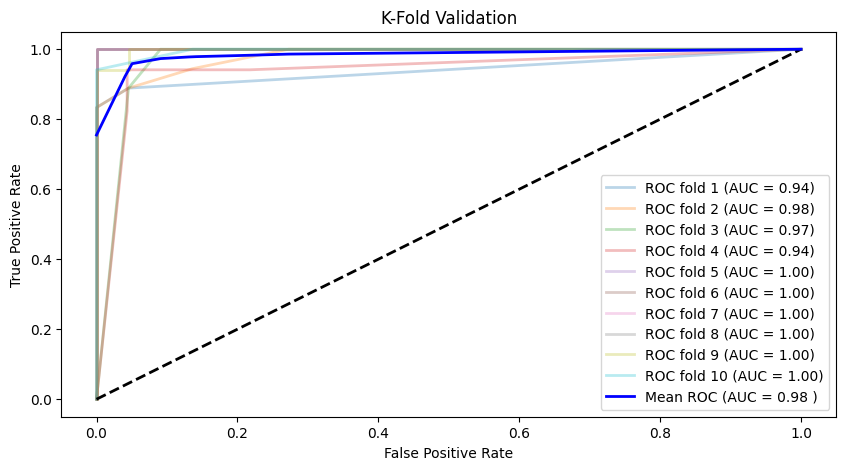


--- Threshold Selection ---
accuracy --> best threshold: 0.4
precision --> best threshold: 0.8
recall --> best threshold: 0.1
f1 --> best threshold: 0.4


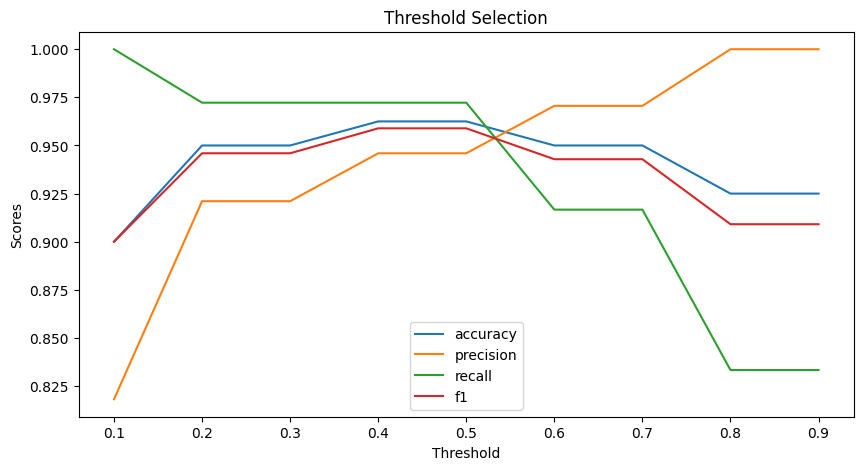

In [108]:
# this takes a while
# this takes a while
model = tune_knn_model(X_train, y_train, model_base=None, param_dic=param_dic, scoring="accuracy", 
                        searchtype="GridSearch", n_iter=1000, cv=10, figsize=(10,5))

--- RandomSearch ---
Best Model parameters: {'weights': 'uniform', 'n_neighbors': 5, 'leaf_size': 20, 'algorithm': 'auto'}
Best Model accuracy: 0.96

--- Kfold Validation ---
accuracy mean - base model: 0.96  --> best model: 1
precision mean - base model: 0.96  --> best model: 1
recall mean - base model: 0.94  --> best model: 1
f1 mean - base model: 0.95  --> best model: 1


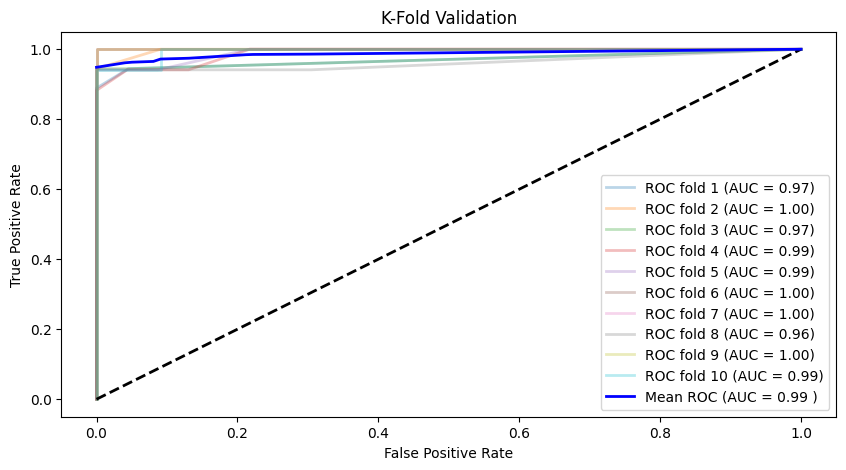


--- Threshold Selection ---
accuracy --> best threshold: 0.4
precision --> best threshold: 0.4
recall --> best threshold: 0.1
f1 --> best threshold: 0.4


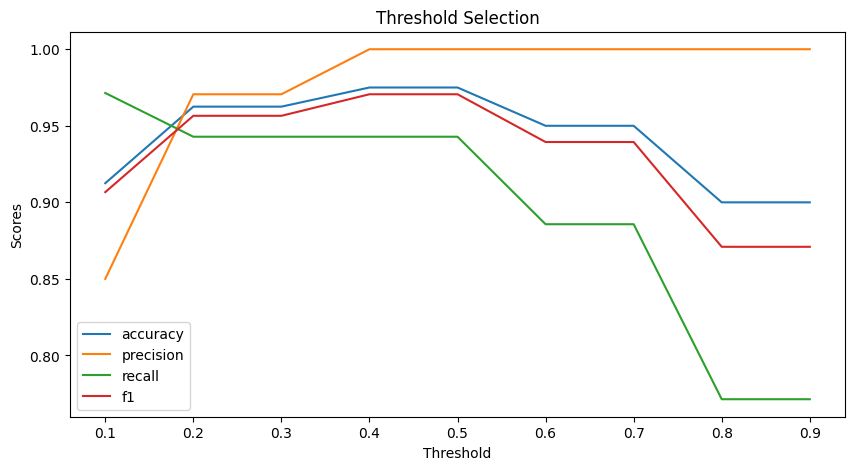

In [312]:
# this takes a while
model = tune_knn_model(X_train, y_train, model_base=None, param_dic=param_dic, scoring="accuracy", 
                        searchtype="RandomSearch", n_iter=1000, cv=10, figsize=(10,5))

In [313]:
X_test = dtf_test[X_names].values
y_test = dtf_test["Y"].values

In [314]:
from sklearn.neighbors import KNeighborsClassifier

def fit_ml5_classif(model, X_train, y_train, X_test, threshold=0.5):
    ## model
    model = KNeighborsClassifier() if model is None else model
    
    ## train/test
    model.fit(X_train, y_train)
    predicted_prob = model.predict_proba(X_test)[:,1]
    predicted = (predicted_prob > threshold)
    return model, predicted_prob, predicted


In [315]:
model, predicted_prob, predicted = fit_ml5_classif(model, X_train, y_train, X_test, threshold=0.4)

Accuracy (overall correct predictions): 0.96
Auc: 0.99
Recall (all 1s predicted right): 0.97
Precision (confidence when predicting a 1): 0.88
F1 score: 0.93
Detail:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       132
           1       0.88      0.97      0.93        39

    accuracy                           0.96       171
   macro avg       0.94      0.97      0.95       171
weighted avg       0.97      0.96      0.97       171



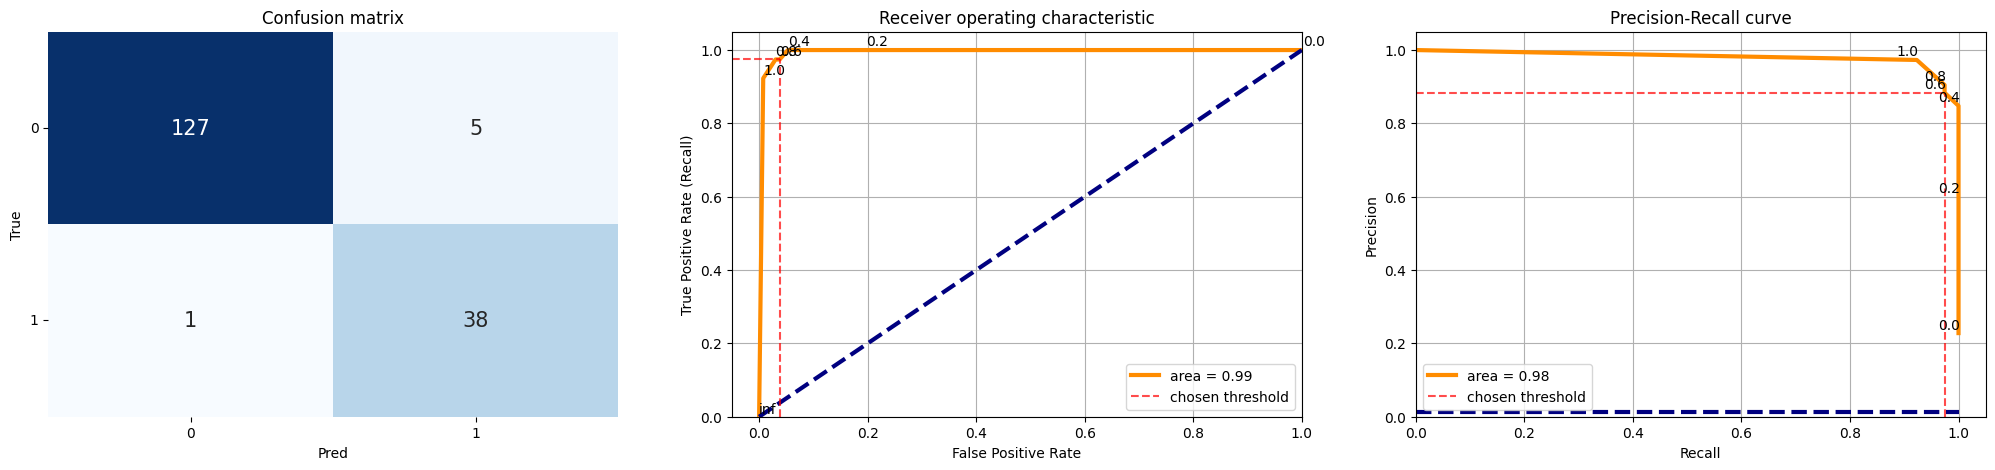

In [316]:
m6=evaluate_classif_model(y_test, predicted, predicted_prob, figsize=(25,5))

In [317]:
from sklearn.ensemble import RandomForestClassifier

model2d = KNeighborsClassifier()
model2d.set_params(**{'weights': 'uniform', 'n_neighbors': 5, 'leaf_size': 20, 'algorithm': 'auto'})

KNeighborsClassifier(leaf_size=20)

--- reducing dimensions to 2 ---
--- fitting 2d model ---
--- plotting test set ---


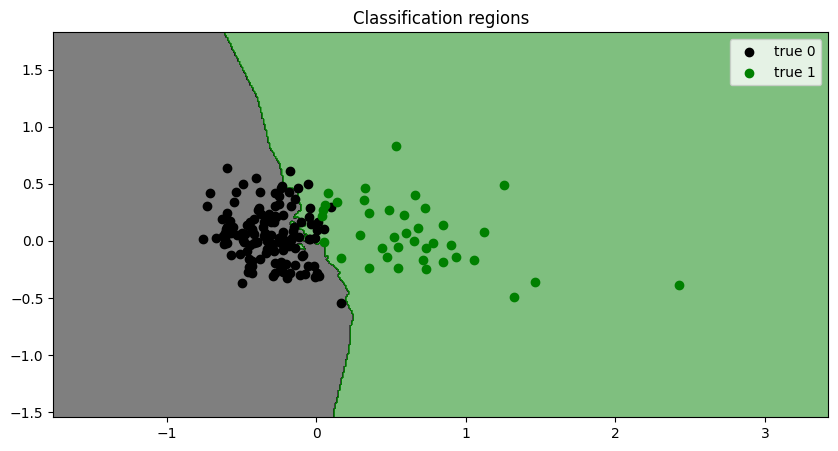

In [318]:
m6=plot2d_classif_model(X_train, y_train, X_test, y_test, model2d, annotate=False, figsize=(10,5))

Model#K-nerest

In [319]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier
model = GaussianNB()


In [320]:
 param_dic = {
            'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Example values for var_smoothing
        }
param_dic_multinomial = {
    'alpha': [0.0, 0.1, 0.5, 1.0, 2.0]  # Example values for alpha
}
param_dic_bernoulli = {
    'alpha': [0.0, 0.1, 0.5, 1.0, 2.0],  # Example values for alpha
    'binarize': [None, 0.0, 0.1, 0.5, 1.0]  # Example values for binarize
}


In [321]:
from sklearn import metrics, model_selection
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

def tune_nb_model(X_train, y_train, model_base=None, param_dic=None, scoring="f1", searchtype="RandomSearch", n_iter=1000, cv=10, figsize=(10,5)):
    ## params
    model_base = GaussianNB() if model_base is None else model_base
    param_dic = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Example values for var_smoothing
}

    dic_scores = {
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1'
    }

    ## Search
    print("---", searchtype, "---")
    if searchtype == "RandomSearch" or searchtype == "GridSearch":
        print("Warning: GridSearch and RandomSearch are not applicable for Naive Bayes classifiers.")

    ## K fold validation
    print("")
    print("--- Kfold Validation ---")
    Kfold_base = model_selection.cross_validate(estimator=model_base, X=X_train, y=y_train, cv=cv, scoring=dic_scores)
    for score in dic_scores.keys():
        print(score, "mean - base model:", round(Kfold_base["test_"+score].mean(), 2))

    ## Plotting ROC curve (if available)
    print("")
    print("--- ROC Curve ---")
    print("Warning: ROC curve is not applicable for Naive Bayes classifiers.")
 ## Plotting ROC curve (if available)
    utils_kfold_roc(model, X_train, y_train, cv=cv, figsize=figsize)
    ## Threshold analysis
    print("")
    print("--- Threshold Selection ---")
    print("Warning: Threshold selection is not applicable for Naive Bayes classifiers.")
    ## Threshold analysis
    utils_threshold_selection(model, X_train, y_train, figsize=figsize)
    return model_base


--- GridSearch ---

--- Kfold Validation ---
accuracy mean - base model: 0.93
precision mean - base model: 0.94
recall mean - base model: 0.89
f1 mean - base model: 0.92

--- ROC Curve ---


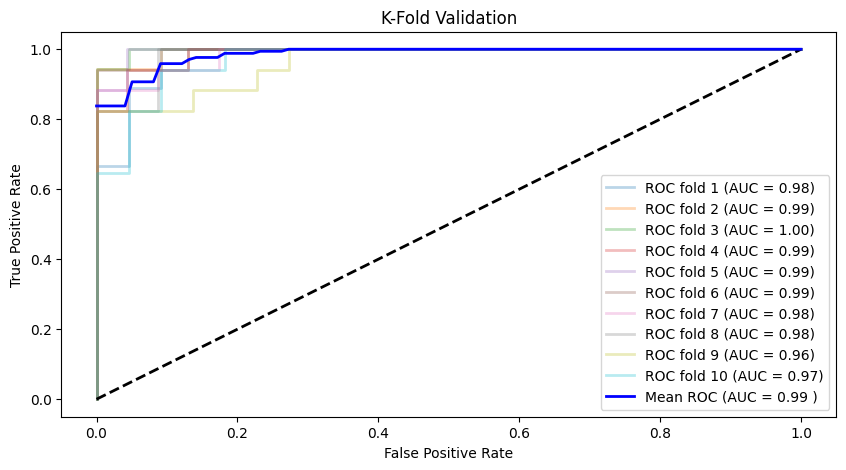


--- Threshold Selection ---
accuracy --> best threshold: 0.1
precision --> best threshold: 0.1
recall --> best threshold: 0.1
f1 --> best threshold: 0.1


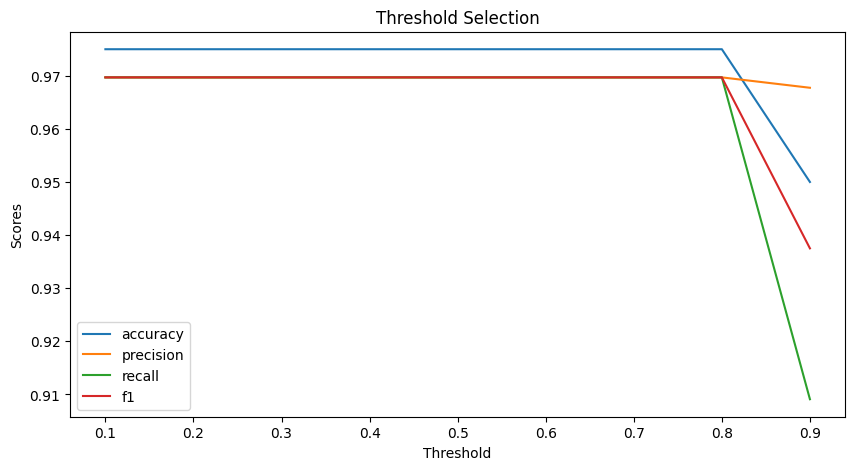

In [322]:
# this takes a while
model = tune_nb_model(X_train, y_train, model_base=None, param_dic=param_dic, scoring="accuracy", 
                        searchtype="GridSearch", n_iter=1000, cv=10, figsize=(10,5))

In [323]:
X_test = dtf_test[X_names].values
y_test = dtf_test["Y"].values

In [324]:
from sklearn.naive_bayes import GaussianNB

def fit_ml6_classif(model, X_train, y_train, X_test, threshold=0.5):
    ## model
    model = GaussianNB() if model is None else model
    
    ## train/test
    model.fit(X_train, y_train)
    predicted_prob = model.predict_proba(X_test)[:,1]
    predicted = (predicted_prob > threshold).astype(int)
    return model, predicted_prob, predicted


In [325]:
model, predicted_prob, predicted = fit_ml5_classif(model, X_train, y_train, X_test, threshold=0.1)

Accuracy (overall correct predictions): 0.95
Auc: 0.99
Recall (all 1s predicted right): 1.0
Precision (confidence when predicting a 1): 0.83
F1 score: 0.91
Detail:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       132
           1       0.83      1.00      0.91        39

    accuracy                           0.95       171
   macro avg       0.91      0.97      0.94       171
weighted avg       0.96      0.95      0.95       171



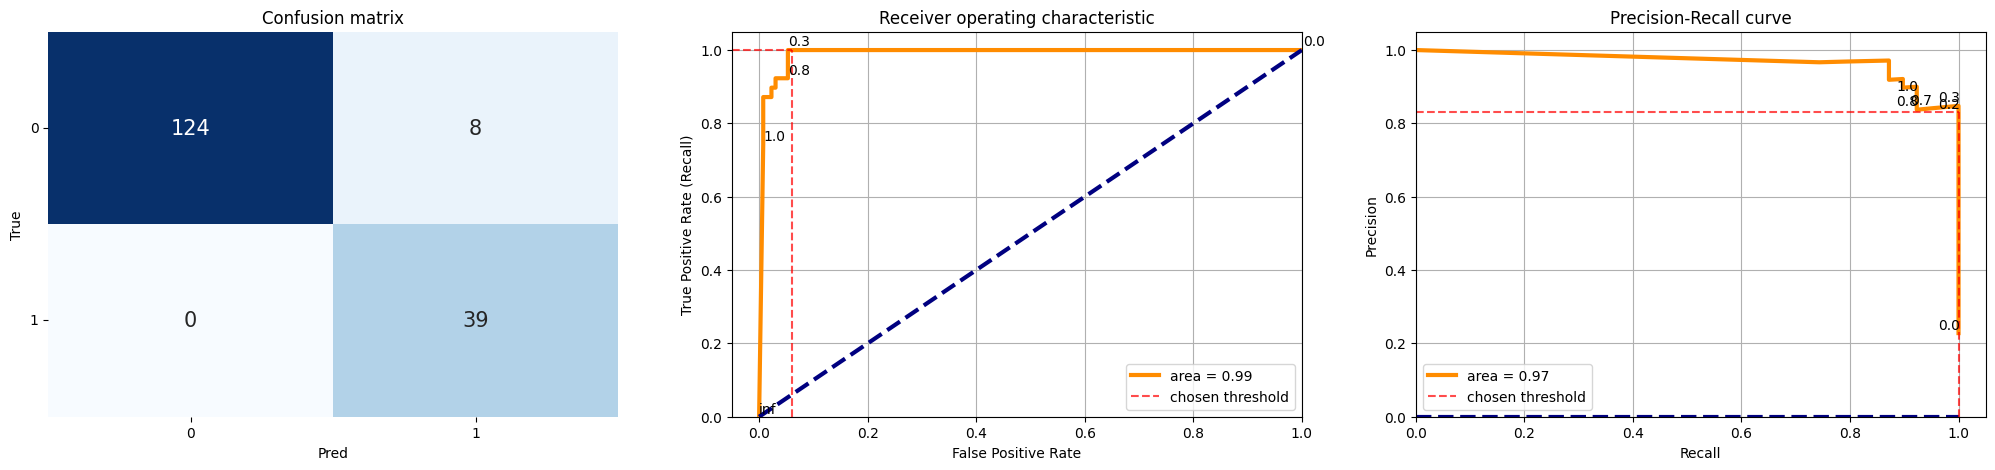

In [326]:
m7=evaluate_classif_model(y_test, predicted, predicted_prob, figsize=(25,5))

In [327]:
model2d = KNeighborsClassifier()


--- reducing dimensions to 2 ---
--- fitting 2d model ---
--- plotting test set ---


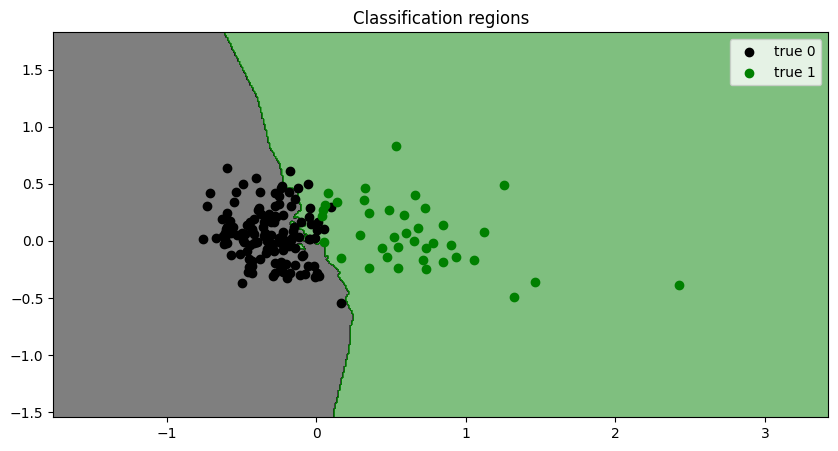

In [328]:
m7=plot2d_classif_model(X_train, y_train, X_test, y_test, model2d, annotate=False, figsize=(10,5))

### 4 - Model Desing & Testing (neural network)

###### Plan:
- Model Design
- Train / Test
- Evaluate
- Explainability
- Visualize model

###### Model Design

In [329]:
X_names = dtf_train.drop("Y", axis=1).columns.tolist()
X_train = dtf_train.drop("Y", axis=1).values
y_train = dtf_train["Y"].values

X_train.shape

(398, 26)

In [330]:
## define F1 metrics for Keras
def Recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def Precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def F1(y_true, y_pred):
    precision = Precision(y_true, y_pred)
    recall = Recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [331]:
# Deep neural network with fully connected layers
n_features = 17
model = models.Sequential(name="DeepNN", layers=[
    ### (layer input) & hidden layer 1
    layers.Dense(name="h1", input_dim=n_features, units=int(round((n_features+1)/2)), activation='relu'),
    layers.Dropout(name="drop1", rate=0.2),
    ### hidden layer 2
    layers.Dense(name="h2", units=int(round((n_features+1)/4)), activation='relu'),
    layers.Dropout(name="drop2", rate=0.2),
    ### layer output
    layers.Dense(name="output", units=1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',F1])

model.summary()

Model: "DeepNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 9)                 162       
                                                                 
 drop1 (Dropout)             (None, 9)                 0         
                                                                 
 h2 (Dense)                  (None, 4)                 40        
                                                                 
 drop2 (Dropout)             (None, 4)                 0         
                                                                 
 output (Dense)              (None, 1)                 5         
                                                                 
Total params: 207 (828.00 Byte)
Trainable params: 207 (828.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [332]:
from tensorflow.keras import models, layers

# Deep neural network with fully connected layers
n_features = 17
model = models.Sequential(name="DeepNN", layers=[
    ### (layer input) & hidden layer 1
    layers.Dense(name="h1", input_dim=n_features, units=int(round((n_features+1)/2)), activation='relu'),
    layers.Dropout(name="drop1", rate=0.2),
    ### hidden layer 2
    layers.Dense(name="h2", units=int(round((n_features+1)/4)), activation='relu'),
    layers.Dropout(name="drop2", rate=0.2),
    ### layer output
    layers.Dense(name="output", units=1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'F1'])
model.summary()


Model: "DeepNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 9)                 162       
                                                                 
 drop1 (Dropout)             (None, 9)                 0         
                                                                 
 h2 (Dense)                  (None, 4)                 40        
                                                                 
 drop2 (Dropout)             (None, 4)                 0         
                                                                 
 output (Dense)              (None, 1)                 5         
                                                                 
Total params: 207 (828.00 Byte)
Trainable params: 207 (828.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


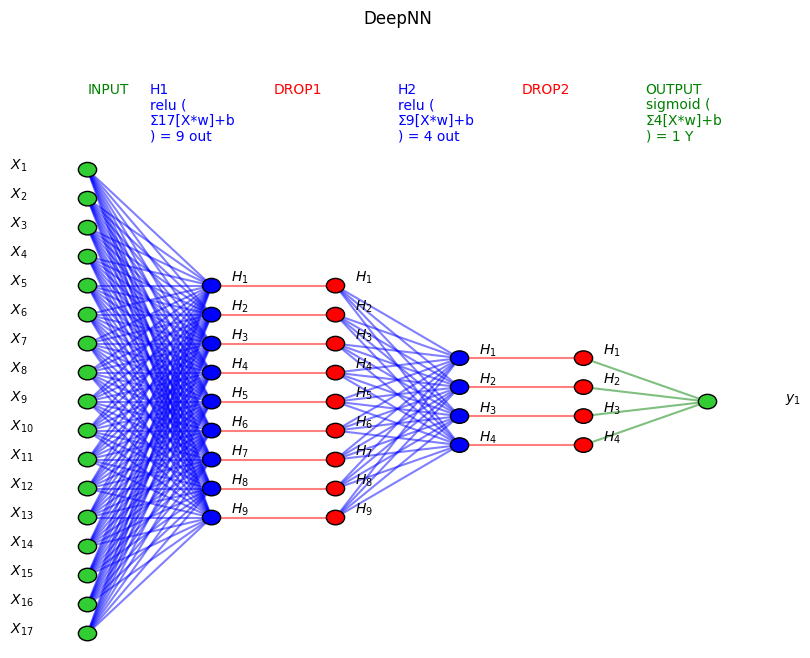

In [333]:
visualize_nn(model, description=True, figsize=(10,8))

###### Train / Test

In [334]:
X_test = dtf_test.drop("Y", axis=1).values
y_test = dtf_test["Y"].values

X_test.shape

(171, 26)

In [335]:
import numpy as np
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

def fit_dl_classif(X_train, y_train, X_test, batch_size=32, epochs=100, threshold=0.5):
    # Define the model architecture
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    training = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.3)

    # Make predictions
    predicted_prob = model.predict(X_test)
    predicted = (predicted_prob > threshold).astype(int)

    return model, predicted_prob, predicted

# Example usage:
model, predicted_prob, predicted = fit_dl_classif(X_train, y_train, X_test, batch_size=32, epochs=100, threshold=0.5)


Epoch 1/100
9/9 [==============================] - 1s 26ms/step - loss: 0.6587 - accuracy: 0.6511 - val_loss: 0.6831 - val_accuracy: 0.3000
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6144 - accuracy: 0.5540 - val_loss: 0.6900 - val_accuracy: 0.2833
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 0.5809 - accuracy: 0.6079 - val_loss: 0.6359 - val_accuracy: 0.5000
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 0.5391 - accuracy: 0.7158 - val_loss: 0.5842 - val_accuracy: 0.6500
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 0.4944 - accuracy: 0.8129 - val_loss: 0.5061 - val_accuracy: 0.8250
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 0.4414 - accuracy: 0.8705 - val_loss: 0.4483 - val_accuracy: 0.8583
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 0.3961 - accuracy: 0.8777 - val_loss: 0.3990 - val_accuracy: 0.8667
Epoch 8/100
9/9 [=========

###### Evaluate

Accuracy (overall correct predictions): 0.95
Auc: 1.0
Recall (all 1s predicted right): 1.0
Precision (confidence when predicting a 1): 0.83
F1 score: 0.91
Detail:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       132
           1       0.83      1.00      0.91        39

    accuracy                           0.95       171
   macro avg       0.91      0.97      0.94       171
weighted avg       0.96      0.95      0.95       171



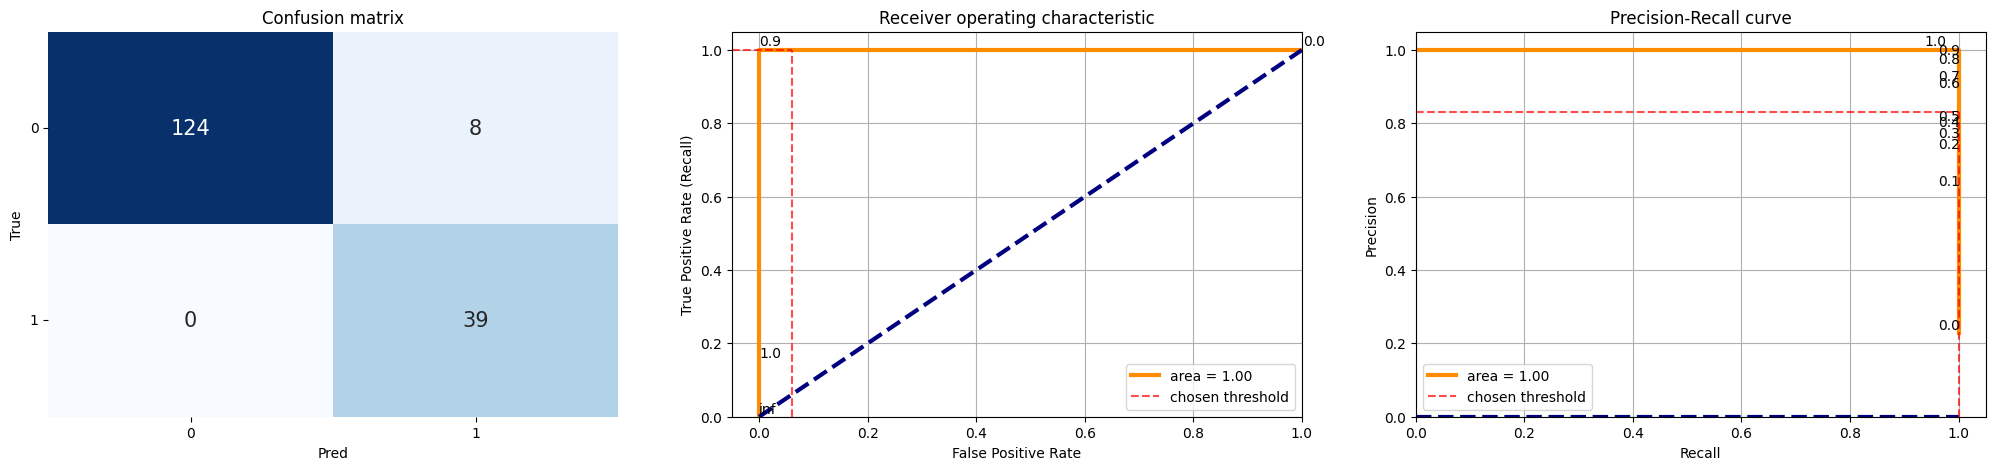

In [336]:
m8=evaluate_classif_model(y_test, predicted, predicted_prob, figsize=(25,5))

###### Explainability

###### Visualize model

In [337]:
model2d = models.Sequential()
### layer 1
model2d.add(layers.Dense(input_dim=2, units=int(round((17+1)/2)), kernel_initializer='uniform', activation='relu'))
model2d.add(layers.Dropout(rate=0.2))
### layer 2
model2d.add(layers.Dense(units=int(round((17+1)/2)), kernel_initializer='uniform', activation='relu'))
model2d.add(layers.Dropout(rate=0.2))
### layer output
model2d.add(layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
model2d.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

--- reducing dimensions to 2 ---
--- fitting 2d model ---
13/13 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.5377
--- plotting test set ---
6809/6809 [==============================] - 7s 1ms/step


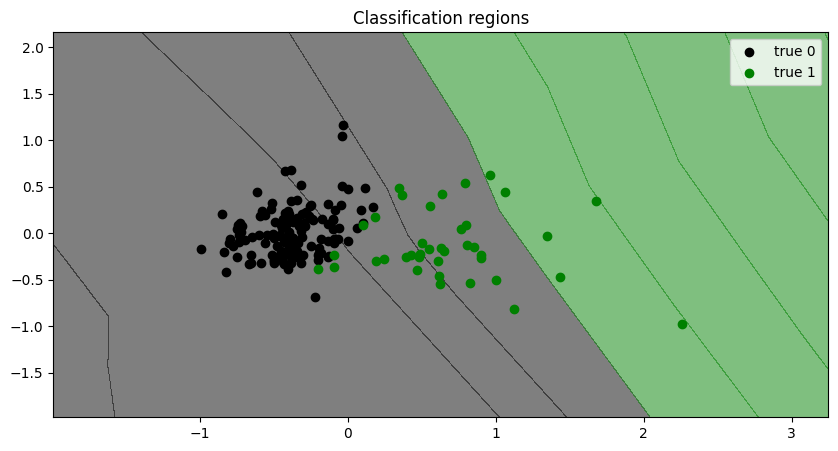

In [338]:
m9=plot2d_classif_model(X_train, y_train, X_test, y_test, model2d, annotate=False, figsize=(10,5))